<a href="https://colab.research.google.com/github/Czar210/Artemis/blob/main/Artemis_2_(0_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#A CACETA DA CHAVE, LEMBRE DE MUDAR A CADA 24 HORAS

api_key = 'RGAPI-56a26a3c-17fc-4297-a7ad-21444cf0ecfc'

#Imports

In [2]:
import requests
import json
import pandas as pd
import time
import matplotlib.pyplot as plt

#Player info - Formato nick/tag/server/champ

In [ ]:
#Função para determinar a region - APENAS PARA PUUID
def region(server):
    if server in ["NA", "BR", "LAN", "LAS", "OCE"]:
        return "americas"
    elif server in ["KR", "JP", "PH", "SG", "TH", "TW", "VN"]:
        return "asia"
    elif server in ["EUNE", "EUW", "TR", "RU"]:
        return "europe"

## Players {} - Organizar player info em um dicionário

In [ ]:
#Dicionário players atualizado com a chave "region"
players = {
    "Graves": [
        {"nick": "Drakehero", "tag": "1304", "servidor": "BR", "region": region("BR")},
        {"nick": "twtv s1tanley", "tag": "pepee", "servidor": "TR", "region": region("TR")},
        {"nick": "Tapioka French", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "ferez", "tag": "dnzz", "servidor": "EUW", "region": region("EUW")},
        {"nick": "dellals1ken", "tag": "UDG1", "servidor": "TR", "region": region("TR")},
        {"nick": "nwnc", "tag": "123", "servidor": "TW", "region": region("TW")},
        {"nick": "StanPelly", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "땅굴팀 정글", "tag": "2024", "servidor": "KR", "region": region("KR")},
        {"nick": "Raccoon", "tag": "yaha", "servidor": "KR", "region": region("KR")},
        {"nick": "이레즈미", "tag": "야쿠자", "servidor": "KR", "region": region("KR")}
    ],
    "Viego": [
        {"nick": "5120", "tag": "mkbk", "servidor": "KR", "region": region("KR")},
        {"nick": "Gerikku", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "带妹王", "tag": "1030", "servidor": "NA", "region": region("NA")},
        {"nick": "ZEN SCP", "tag": "2005", "servidor": "VN", "region": region("VN")},
        {"nick": "yudut", "tag": "duytu", "servidor": "VN", "region": region("VN")},
        {"nick": "Bajamut infenal", "tag": "LAN", "servidor": "LAN", "region": region("LAN")},
        {"nick": "JEREMIAS 17 4", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "cyal8er29", "tag": "Hizto", "servidor": "VN", "region": region("VN")},
        {"nick": "Negan Smith", "tag": "8451", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Zubac", "tag": "VIEGO", "servidor": "EUW", "region": region("EUW")}
    ],
    "Lee Sin": [
        {"nick": "Frαnk Castle", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "QnA Silent Love", "tag": "bin", "servidor": "VN", "region": region("VN")},
        {"nick": "Prince", "tag": "Ken", "servidor": "VN", "region": region("VN")},
        {"nick": "Tài Nhớt", "tag": "2007", "servidor": "VN", "region": region("VN")},
        {"nick": "가는중", "tag": "CR1", "servidor": "KR", "region": region("KR")},
        {"nick": "수슈1", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "Exorcism", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "Amorye", "tag": "Tyezz", "servidor": "VN", "region": region("VN")},
        {"nick": "Một Lee Là Sỉn", "tag": "00000", "servidor": "VN", "region": region("VN")},
        {"nick": "birinci", "tag": "first", "servidor": "TR", "region": region("TR")}
    ],
    "Kha Zix": [
        {"nick": "NESNÁŠÍM GŮKY", "tag": "GUK", "servidor": "EUW", "region": region("EUW")},
        {"nick": "WarShogun", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "UOL CLEARS", "tag": "UOL", "servidor": "EUW", "region": region("EUW")},
        {"nick": "ivopivo112", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Toronto canadian", "tag": "NA1", "servidor": "NA1", "region": region("NA")},
        {"nick": "phuthuybom100", "tag": "2903", "servidor": "VN", "region": region("VN")},
        {"nick": "Bluemee", "tag": "OCE", "servidor": "OCE", "region": region("OCE")},
        {"nick": "ITIUCNCOQUIMBO", "tag": "XDLOL", "servidor": "LAS", "region": region("LAS")},
        {"nick": "I Zhuo YiFan I", "tag": "24103", "servidor": "VN", "region": region("VN")},
        {"nick": "Monster P", "tag": "9999", "servidor": "VN", "region": region("VN")}
    ],
    "Nidalee": [
        {"nick": "Bouhgt acc", "tag": "Rich", "servidor": "OCE", "region": region("OCE")},
        {"nick": "돛단배", "tag": "KR3", "servidor": "KR", "region": region("KR")},
        {"nick": "dont talk to me", "tag": "00002", "servidor": "BR", "region": region("BR")},
        {"nick": "Snow", "tag": "hog", "servidor": "KR", "region": region("KR")},
        {"nick": "ITS FK1NG FUSE", "tag": "FUSE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "LALUZ", "tag": "dct", "servidor": "VN", "region": region("VN")},
        {"nick": "Cougar Abuser", "tag": "1v9", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "轲杜 Richard", "tag": "0606", "servidor": "KR", "region": region("KR")},
        {"nick": "Not compatible", "tag": "2708", "servidor": "VN", "region": region("VN")},
        {"nick": "Cuke", "tag": "cg520", "servidor": "OCE", "region": region("OCE")}
    ],
    "Jarvan IV": [
        {"nick": "思維方式", "tag": "915", "servidor": "NA", "region": region("NA")},
        {"nick": "Bořek Stavitel", "tag": "BUILD", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Jungle v2", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "Läirx", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "heeeeeeheeeee", "tag": "hehee", "servidor": "VN", "region": region("VN")},
        {"nick": "Foutriquet", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Thayger", "tag": "3155", "servidor": "EUW", "region": region("EUW")},
        {"nick": "IE Żéphyr", "tag": "TIE", "servidor": "EUW", "region": region("EUW")},
        {"nick": "jungle", "tag": "CN1", "servidor": "EUW", "region": region("EUW")},
        {"nick": "FrankGallagher", "tag": "ALK", "servidor": "EUW", "region": region("EUW")}
    ],
    "Skarner": [
        {"nick": "Devolto", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "Arkk", "tag": "777", "servidor": "EUW", "region": region("EUW")},
        {"nick": "ƒanks", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "micky7410", "tag": "7410", "servidor": "KR", "region": region("KR")},
        {"nick": "sukh", "tag": "grind", "servidor": "EUW", "region": region("EUW")},
        {"nick": "사랑해요", "tag": "8833", "servidor": "VN", "region": region("VN")},
        {"nick": "Fallen", "tag": "FLLN1", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Deliriusmau", "tag": "PAWG", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Prever", "tag": "프리버", "servidor": "KR", "region": region("KR")},
        {"nick": "탁치니억하고죽었다", "tag": "KR2", "servidor": "KR", "region": region("KR")}
    ],
    "Elise": [
        {"nick": "Bánh Bao Piglet", "tag": "bbb", "servidor": "VN", "region": region("VN")},
        {"nick": "塔兰图拉", "tag": "蜘蛛网", "servidor": "KR", "region": region("KR")},
        {"nick": "noob", "tag": "mmm", "servidor": "BR", "region": region("BR")},
        {"nick": "yannick1202", "tag": "777", "servidor": "KR", "region": region("KR")},
        {"nick": "능지처참", "tag": "KR2", "servidor": "KR", "region": region("KR")},
        {"nick": "xiaoxiu", "tag": "77777", "servidor": "KR", "region": region("KR")},
        {"nick": "CNMCGIDZMN", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "Bgurin", "tag": "4000", "servidor": "EUW", "region": region("EUW")},
        {"nick": "한계 테스트", "tag": "000", "servidor": "EUW", "region": region("EUW")},
        {"nick": "처음이라 못해요", "tag": "0420", "servidor": "KR", "region": region("KR")}
    ],
    "Nocturne": [
        {"nick": "Anh Phước ĐN", "tag": "2504", "servidor": "VN", "region": region("VN")},
        {"nick": "NAG", "tag": "NOC", "servidor": "BR", "region": region("BR")},
        {"nick": "Thần Tiên Tỷ Tỷ", "tag": "3011", "servidor": "VN", "region": region("VN")},
        {"nick": "Slein", "tag": "MPG", "servidor": "LAN", "region": region("LAN")},
        {"nick": "yehi", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "동선예측불가", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "Kim Dung She", "tag": "1311", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Jąck Thę Rippęr", "tag": "LAN", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Đại Ái Tiên Tônn", "tag": "999", "servidor": "VN", "region": region("VN")},
        {"nick": "MvP Den", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")}
    ],
    "Hecarim": [
        {"nick": "Viêm Đế", "tag": "Hungs", "servidor": "VN", "region": region("VN")},
        {"nick": "Nagyunn", "tag": "0000", "servidor": "NA", "region": region("NA")},
        {"nick": "Immortal", "tag": "sora", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Aatrox nan", "tag": "出師表", "servidor": "TW", "region": region("TW")},
        {"nick": "TTV Exodialars", "tag": "JUNG", "servidor": "EUW", "region": region("EUW")},
        {"nick": "gegverxerx", "tag": "76jtb", "servidor": "NA", "region": region("NA")},
        {"nick": "생배엄뒤나도한다", "tag": "faker", "servidor": "KR", "region": region("KR")},
        {"nick": "Ikematsu", "tag": "JP1", "servidor": "JP", "region": region("JP")},
        {"nick": "17 ans 0 avenir", "tag": "95100", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Sen Bilmezsin", "tag": "50505", "servidor": "EUW", "region": region("EUW")}
    ],
    "Kayn": [
        {"nick": "GIONTGIONTggiont", "tag": "GIONT", "servidor": "BR", "region": region("BR")},
        {"nick": "amidamaru", "tag": "2828", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Bagaro", "tag": "00017", "servidor": "EUW", "region": region("EUW")},
        {"nick": "kimchin", "tag": "666", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Zzzz", "tag": "MVP", "servidor": "BR", "region": region("BR")},
        {"nick": "sin", "tag": "shi", "servidor": "BR", "region": region("BR")},
        {"nick": "不気味な黒", "tag": "ホラー", "servidor": "BR", "region": region("BR")},
        {"nick": "SCRIPTER", "tag": "555", "servidor": "LAS", "region": region("LAS")},
        {"nick": "괴물쥐", "tag": "KR9", "servidor": "KR", "region": region("KR")},
        {"nick": "magikarrp", "tag": "iyx", "servidor": "NA", "region": region("NA")}
    ],
    "Lillia": [
        {"nick": "TworzymyHistorie", "tag": "RAZEM", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Fersita", "tag": "Kat", "servidor": "LAS", "region": region("LAS")},
        {"nick": "Shooting", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "dan schwarzeneg", "tag": "12345", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Veigar Main xd", "tag": "TR1", "servidor": "TR", "region": region("TR")},
        {"nick": "chatrestricted", "tag": "1269", "servidor": "SG", "region": region("SG")},
        {"nick": "ONMYOWN", "tag": "own", "servidor": "KR", "region": region("KR")},
        {"nick": "클래식좀들어라", "tag": "KR2", "servidor": "KR", "region": region("KR")},
        {"nick": "Ðiø Ðella Førest", "tag": "TR1", "servidor": "TR", "region": region("TR")},
        {"nick": "박 신 원", "tag": "Sinun", "servidor": "KR", "region": region("KR")}
    ],
    "Diana": [
        {"nick": "Dodobassey", "tag": "777", "servidor": "EUW", "region": region("EUW")},
        {"nick": "CrazyMage", "tag": "OCE", "servidor": "OCE", "region": region("OCE")},
        {"nick": "never", "tag": "xnyv", "servidor": "EUW", "region": region("EUW")},
        {"nick": "千个伤心的理由 2", "tag": "9999", "servidor": "VN", "region": region("VN")},
        {"nick": "Šankayou", "tag": "4002", "servidor": "TH", "region": region("TH")},
        {"nick": "千个伤心的理由 2", "tag": "9999", "servidor": "VN", "region": region("VN")},
        {"nick": "ChânMệnhThiênTử8", "tag": "1906", "servidor": "VN", "region": region("VN")},
        {"nick": "her ex", "tag": "tear", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Griffin", "tag": "Soar", "servidor": "NA", "region": region("NA")},
        {"nick": "Clerakden", "tag": "LAS", "servidor": "LAS", "region": region("LAS")}
   ],
    "Talon": [
        {"nick": "Acheron E4", "tag": "K405", "servidor": "EUW", "region": region("EUW")},
        {"nick": "iso", "tag": "307", "servidor": "TR", "region": region("TR")},
        {"nick": "대한민국경기도김포시북변동곽규호", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "1farkas", "tag": "RIVER", "servidor": "BR", "region": region("BR")},
        {"nick": "BONG BONG SUPAH", "tag": "VYTHX", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Kaos Disciple", "tag": "aga", "servidor": "EUW", "region": region("EUW")},
        {"nick": "김건포", "tag": "jug", "servidor": "TW", "region": region("TW")},
        {"nick": "장진영", "tag": "탈론비에고", "servidor": "KR", "region": region("KR")},
        {"nick": "elegance", "tag": "46523", "servidor": "EUW", "region": region("EUW")},
        {"nick": "offrolejgkingdom", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")}
    ],

    "Gragas": [ #Parei aqui
        {"nick": "BOBBAGOD", "tag": "MALOS", "servidor": "LAS", "region": region("LAS")},
        {"nick": "heny", "tag": "luv", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Văn Hùng", "tag": "111", "servidor": "VN", "region": region("VN")},
        {"nick": "DenFoze", "tag": "LPK", "servidor": "EUW", "region": region("EUW")},
        {"nick": "h3R333333", "tag": "666", "servidor": "KR", "region": region("KR")},
        {"nick": "Đuma đang cứu nè", "tag": "VN2", "servidor": "VN", "region": region("VN")},
        {"nick": "Leesin the giot", "tag": "VN2", "servidor": "VN", "region": region("VN")},
        {"nick": "NFC Torin", "tag": "JÄGER", "servidor": "EUW", "region": region("EUW")},
        {"nick": "홍거니", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "DaWud", "tag": "BR1", "servidor": "BR", "region": region("BR")}
    ],
    "Fiddlesticks": [
        {"nick": "하늘의 환생", "tag": "KR2", "servidor": "KR", "region": region("KR")},
        {"nick": "xiaoxi", "tag": "OuO", "servidor": "KR", "region": region("KR")},
        {"nick": "ŁüuMïnh", "tag": "24983", "servidor": "VN", "region": region("VN")},
        {"nick": "여중생", "tag": "kr3", "servidor": "KR", "region": region("KR")},
        {"nick": "Culohondo", "tag": "frog", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Amo beber mijo", "tag": "696", "servidor": "BR", "region": region("BR")},
        {"nick": "Florianuus", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "drunkenztain", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "火竜 Karyu", "tag": "Rawr", "servidor": "PH", "region": region("PH")},
        {"nick": "테 디 스 틱", "tag": "KR 1", "servidor": "KR", "region": region("KR")}
    ],
    "Wukong": [
        {"nick": "Wukong", "tag": "KongA", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Balkan Goku", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "BordetFanger", "tag": "420", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Fyron", "tag": "TR1", "servidor": "TR", "region": region("TR")},
        {"nick": "Captain Adaborky", "tag": "EUNE1", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "DaneZCX", "tag": "AXUY", "servidor": "RU", "region": region("RU")},
        {"nick": "CNB OVATSUG", "tag": "SANTA", "servidor": "BR", "region": region("BR")},
        {"nick": "Gamedogs Russo", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "AhniseC", "tag": "WUK", "servidor": "BR", "region": region("BR")},
        {"nick": "OpheliayD", "tag": "EUW", "servidor": "EUW", "region": region("EUW")}
    ],
       "Reksai": [
        {"nick": "Supreme Leader", "tag": "Lolw", "servidor": "TR", "region": region("TR")},
        {"nick": "juanrael01", "tag": "juan", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Apmud", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "Tamagarnel", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "Mosgtonem", "tag": "8801", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Wx Cuzzo1", "tag": "PWDL", "servidor": "NA", "region": region("NA")},
        {"nick": "infinity ultra", "tag": "9669", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "xiaozhewanc", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "Nathan Mott", "tag": "OCE", "servidor": "OCE", "region": region("OCE")},
        {"nick": "蛋蛋煲", "tag": "106", "servidor": "KR", "region": region("KR")}
    ],
    "Sejuani": [
        {"nick": "EloFifiJestem", "tag": "2115", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "TomasSeary", "tag": "LAS", "servidor": "LAS", "region": region("LAS")},
        {"nick": "ramxix", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Ikarus", "tag": "Wing", "servidor": "EUW", "region": region("EUW")},
        {"nick": "인생은 1vs9", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "c4lidus", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Jimori", "tag": "smart", "servidor": "BR", "region": region("BR")},
        {"nick": "Lux", "tag": "7778", "servidor": "BR", "region": region("BR")},
        {"nick": "閉上眼一再逃避", "tag": "TW2", "servidor": "TW", "region": region("TW")},
        {"nick": "Overcsokker ψ", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")}
    ],
    "Taliyah": [
        {"nick": "brat", "tag": "5454", "servidor": "LAS", "region": region("LAS")},
        {"nick": "opop", "tag": "wywq", "servidor": "KR", "region": region("KR")},
        {"nick": "ŽlLE", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "xiat", "tag": "yaha", "servidor": "KR", "region": region("KR")},
        {"nick": "香喷喷的小烧鸡", "tag": "QuQ", "servidor": "EUW", "region": region("EUW")},
        {"nick": "douyinlzgyanque", "tag": "66666", "servidor": "KR", "region": region("KR")},
        {"nick": "douyin szl", "tag": "szl", "servidor": "KR", "region": region("KR")},
        {"nick": "葳 蕤", "tag": "1230", "servidor": "LAN", "region": region("LAN")},
        {"nick": "花有重开日人无在少年", "tag": "0525", "servidor": "NA", "region": region("NA")},
        {"nick": "drama", "tag": "0713", "servidor": "KR", "region": region("KR")}
    ],
    "Gwen": [
        {"nick": "SkillDevelopment", "tag": "OCE50", "servidor": "OCE", "region": region("OCE")},
        {"nick": "Baldwin IV", "tag": "unan", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "BOTA MI IMA RAK", "tag": "RAK", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Llapul", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "forik05", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Sultan of EUWest", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Ah Vũ", "tag": "VN24", "servidor": "VN", "region": region("VN")},
        {"nick": "Z RyeoKR", "tag": "0123", "servidor": "KR", "region": region("KR")},
        {"nick": "Heaven", "tag": "731", "servidor": "LAS", "region": region("LAS")},
        {"nick": "Teacherkof", "tag": "God", "servidor": "LAN", "region": region("LAN")}
    ],
    "Warwick": [
        {"nick": "Oliwier Gumowski", "tag": "cwl", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "SYF", "tag": "3924", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Arrancacorazones", "tag": "heart", "servidor": "LAS", "region": region("LAS")},
        {"nick": "Leap of Death", "tag": "Furry", "servidor": "EUW", "region": region("EUW")},
        {"nick": "CPT LaGaule", "tag": "CPT", "servidor": "EUW", "region": region("EUW")},
        {"nick": "IM A NINJA 8O", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "MoarScarz", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "UN SEGARRO AMEGO", "tag": "RAVAL", "servidor": "EUW", "region": region("EUW")},
        {"nick": "DOG DANGER", "tag": "2881", "servidor": "LAN", "region": region("LAN")},
        {"nick": "LYGX Ash", "tag": "LAN", "servidor": "LAN", "region": region("LAN")}
    ],
    "Ivern": [
        {"nick": "Forest Child", "tag": "uwu", "servidor": "BR", "region": region("BR")},
        {"nick": "Jeonseol", "tag": "SKT", "servidor": "EUW", "region": region("EUW")},
        {"nick": "DorohedoroCaiman", "tag": "DRHDR", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "NoRoo", "tag": "KR2", "servidor": "KR", "region": region("KR")},
        {"nick": "Lord of Iverness", "tag": "Ivern", "servidor": "LAN", "region": region("LAN")},
        {"nick": "jimianos", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Anek", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "2931", "tag": "2070", "servidor": "VN", "region": region("VN")},
        {"nick": "Roulette", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Black", "tag": "PNHG", "servidor": "KR", "region": region("KR")}
    ],
    "Evelynn": [
        {"nick": "uncle jamal", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "말랑말랑규리모찌", "tag": "KR2", "servidor": "KR", "region": region("KR")},
        {"nick": "911 Carrera GTS", "tag": "lylou", "servidor": "NA", "region": region("NA")},
        {"nick": "效率vaedmes", "tag": "7kbZX", "servidor": "TW", "region": region("TW")},
        {"nick": "DenKserwName", "tag": "420", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Drizzy Disdain", "tag": "Gangx", "servidor": "NA", "region": region("NA")},
        {"nick": "Acendio", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "mong kieu", "tag": "bully", "servidor": "VN", "region": region("VN")},
        {"nick": "像狗一样", "tag": "CN1", "servidor": "EUW", "region": region("EUW")},
        {"nick": "OLLE SJOQUIST", "tag": "GATEN", "servidor": "EUW", "region": region("EUW")}
    ],
    "Briar": [
        {"nick": "Ye Qiu", "tag": "Azes", "servidor": "BR", "region": region("BR")},
        {"nick": "L0GOONJG", "tag": "069", "servidor": "NA", "region": region("NA")},
        {"nick": "Minun", "tag": "mar", "servidor": "BR", "region": region("BR")},
        {"nick": "jezz rabbit", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Ashley Graves", "tag": "000", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Zargana Hunter", "tag": "ZRGN", "servidor": "TR", "region": region("TR")},
        {"nick": "damiandak", "tag": "DAK", "servidor": "LAN", "region": region("LAN")},
        {"nick": "유졸렬", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "BachHuy", "tag": "2024", "servidor": "VN", "region": region("VN")},
        {"nick": "FrozenKing", "tag": "0001", "servidor": "EUW", "region": region("EUW")}
    ],
    "Shyvana": [
        {"nick": "JEREMIAS 174", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "QQMORE", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "STEPZ", "tag": "LAN", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Curacaví", "tag": "LAS", "servidor": "LAS", "region": region("LAS")},
        {"nick": "TTV Dessjg", "tag": "WOO", "servidor": "LAS", "region": region("LAS")},
        {"nick": "spooky dog", "tag": "rev", "servidor": "NA", "region": region("NA")},
        {"nick": "Bardzo Cię Lubię", "tag": "0001", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Beerus", "tag": "Solo", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Dragon", "tag": "KR2", "servidor": "KR", "region": region("KR")},
        {"nick": "Chimi4anga17", "tag": "Robot", "servidor": "EUNE", "region": region("EUNE")}
    ],
    "Rammus": [
        {"nick": "FAÇA O SERTO", "tag": "BR3", "servidor": "BR", "region": region("BR")},
        {"nick": "KeXy", "tag": "ftw", "servidor": "EUW", "region": region("EUW")},
        {"nick": "TTVdinocampara", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Twitch Lord Semi", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "광연44", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "새우깡끼룩", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "joaomitoHU32", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "Sanes", "tag": "TR1", "servidor": "TR", "region": region("TR")},
        {"nick": "Joãozinho", "tag": "ramus", "servidor": "BR", "region": region("BR")},
        {"nick": "Itzthauan", "tag": "BR1", "servidor": "BR", "region": region("BR")}
    ],
    "Xin Zhao": [
        {"nick": "VX NAdai666", "tag": "小石头PW", "servidor": "NA", "region": region("NA")},
        {"nick": "xcongzzz", "tag": "xiao", "servidor": "KR", "region": region("KR")},
        {"nick": "Velvet", "tag": "HUG3", "servidor": "NA", "region": region("NA")},
        {"nick": "angełs", "tag": "000", "servidor": "NA", "region": region("NA")},
        {"nick": "Enysqwevyu", "tag": "8418", "servidor": "NA", "region": region("NA")},
        {"nick": "eddiest", "tag": "REYNA", "servidor": "TR", "region": region("TR")},
        {"nick": "Slay peasants", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Mairon", "tag": "Rosen", "servidor": "EUW", "region": region("EUW")},
        {"nick": "CNB Silvin", "tag": "SANTA", "servidor": "BR", "region": region("BR")},
        {"nick": "Qinghan", "tag": "tian", "servidor": "KR", "region": region("KR")}
    ],
    "Shaco": [
        {"nick": "Sseyeo", "tag": "샤+코", "servidor": "KR", "region": region("KR")},
        {"nick": "Túróstészta", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "GLOWING IN THE", "tag": "DARK", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Irk Luigi", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "iShifty", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "Hwa Ryun", "tag": "BR2", "servidor": "BR", "region": region("BR")},
        {"nick": "Akiveraznemhaver", "tag": "futom", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "TTV Pomerzz 1", "tag": "Shaco", "servidor": "NA", "region": region("NA")},
        {"nick": "TheCloneIsHere", "tag": "LAS", "servidor": "LAS", "region": region("LAS")},
        {"nick": "Mad as a Hatter", "tag": "EUW", "servidor": "EUW", "region": region("EUW")}
    ],
    "Udyr": [
        {"nick": "PRINCESA ALBA", "tag": "PILT", "servidor": "LAS", "region": region("LAS")},
        {"nick": "The HalloweeN", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "Polienech", "tag": "6570", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Mori no Kage", "tag": "1015", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Red", "tag": "ブルー", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Amanda Mono Udyr", "tag": "FOFA", "servidor": "BR", "region": region("BR")},
        {"nick": "RenesilloooooDR", "tag": "LAS", "servidor": "LAS", "region": region("LAS")},
        {"nick": "Seal", "tag": "7415", "servidor": "NA", "region": region("NA")},
        {"nick": "soy gorda y fea", "tag": "frog", "servidor": "LAN", "region": region("LAN")},
        {"nick": "dream weaver", "tag": "zzz", "servidor": "EUW", "region": region("EUW")}
    ],
    "Karthus": [
        {"nick": "QQQQQQQQQ", "tag": "7777", "servidor": "EUW", "region": region("EUW")},
        {"nick": "ａｕｒａ", "tag": "ˇｅｇｏˇ", "servidor": "TR", "region": region("TR")},
        {"nick": "아크샨 엄마", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "Iiu", "tag": "jojo", "servidor": "KR", "region": region("KR")},
        {"nick": "Berghain", "tag": "BR1", "servidor": "BR", "region": region("BR")},
        {"nick": "도 도", "tag": "머리박기", "servidor": "KR", "region": region("KR")},
        {"nick": "黃景揚", "tag": "1668", "servidor": "TW", "region": region("TW")},
        {"nick": "lostinthought", "tag": "00000", "servidor": "EUW", "region": region("EUW")},
        {"nick": "KochamMajusie", "tag": "UwU", "servidor": "EUW", "region": region("EUW")},
        {"nick": "QQQQQQQQ", "tag": "7777", "servidor": "EUW", "region": region("EUW")}
    ],
    "Ekko": [
        {"nick": "Seigneur", "tag": "Fire", "servidor": "EUW", "region": region("EUW")},
        {"nick": "I ỉa qen dội cầu", "tag": "Gấu", "servidor": "VN", "region": region("VN")},
        {"nick": "Jack电竞vx lemon", "tag": "抖音小艾克", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Aybérk", "tag": "ff15", "servidor": "EUW", "region": region("EUW")},
        {"nick": "xdevilnarutox", "tag": "OBAMA", "servidor": "NA", "region": region("NA")},
        {"nick": "의문의에코유저", "tag": "1234", "servidor": "KR", "region": region("KR")},
        {"nick": "Mefedro", "tag": "1337", "servidor": "VN", "region": region("VN")},
        {"nick": "ZCodexs", "tag": "ff15", "servidor": "EUW", "region": region("EUW")},
        {"nick": "おっこつ+ゆうた", "tag": "shy", "servidor": "JP", "region": region("JP")},
        {"nick": "Time God", "tag": "pdx", "servidor": "KR", "region": region("KR")}
    ],
    "Master Yi": [
        {"nick": "ANTHONYDAVIS", "tag": "NBA3", "servidor": "LAS", "region": region("LAS")},
        {"nick": "Δ一Δ", "tag": "111", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "vipeloboost com", "tag": "VIPEB", "servidor": "TR", "region": region("TR")},
        {"nick": "Gata Maw", "tag": "haxix", "servidor": "BR", "region": region("BR")},
        {"nick": "fallen angel", "tag": "00011", "servidor": "LAS", "region": region("LAS")},
        {"nick": "剑圣不是剑圣", "tag": "1106", "servidor": "NA", "region": region("NA")},
        {"nick": "sword skill", "tag": "rank1", "servidor": "EUW", "region": region("EUW")},
        {"nick": "locked in", "tag": "BR7", "servidor": "BR", "region": region("BR")},
        {"nick": "elmanc0", "tag": "171", "servidor": "NA", "region": region("NA")},
        {"nick": "01091906071", "tag": "에 코", "servidor": "KR", "region": region("KR")}
    ],
    "Belveth": [
        {"nick": "Inja", "tag": "4444", "servidor": "RU", "region": region("RU")},
        {"nick": "Chú ĐẠT tới chơi", "tag": "ĐẠT", "servidor": "VN", "region": region("VN")},
        {"nick": "OscharBros", "tag": "RTURN", "servidor": "NA", "region": region("NA")},
        {"nick": "B3LK1NG", "tag": "VOID", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Lavender", "tag": "TR0", "servidor": "TR", "region": region("TR")},
        {"nick": "벨베스", "tag": "벨베스", "servidor": "KR", "region": region("KR")},
        {"nick": "Destined Death", "tag": "佩老司", "servidor": "KR", "region": region("KR")},
        {"nick": "REEEEKSAI", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "darktriad prince", "tag": "L8 CN", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Bucarinee", "tag": "6969", "servidor": "LAN", "region": region("LAN")}
    ],
    "Volibear": [
        {"nick": "BurgerLarry44", "tag": "OCE1", "servidor": "OCE", "region": region("OCE")},
        {"nick": "Kovoc789", "tag": "5202", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Azalith Scythe", "tag": "666", "servidor": "EUW", "region": region("EUW")},
        {"nick": "f0rzi", "tag": "EUWWW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "sëphïroth", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "5cm per second", "tag": "EUWEZ", "servidor": "EUW", "region": region("EUW")},
        {"nick": "SBRANAPASSERE", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Kross", "tag": "NA12", "servidor": "NA", "region": region("NA")},
        {"nick": "sponge ßöb", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Luka Modrić", "tag": "1918", "servidor": "EUW", "region": region("EUW")}
    ],
    "Amumu": [
        {"nick": "KlopYoni", "tag": "shi", "servidor": "LAS", "region": region("LAS")},
        {"nick": "SigmÂmumu", "tag": "TR1", "servidor": "TR", "region": region("TR")},
        {"nick": "S3xter Moggan", "tag": "420", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Rich Homie Simon", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Zloco", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "무무형준", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "miflond555", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "PureGewalt", "tag": "ROX", "servidor": "LAS", "region": region("LAS")},
        {"nick": "Entiziss", "tag": "EUW", "servidor": "EUW", "region": region("EUW")},
        {"nick": "BRGuilherme1", "tag": "BR1", "servidor": "BR", "region": region("BR")}
    ],
    "Nunu": [
        {"nick": "sleepwalking", "tag": "demon", "servidor": "BR", "region": region("BR")},
        {"nick": "Chrissy", "tag": "Best", "servidor": "TW", "region": region("TW")},
        {"nick": "João Música", "tag": "jmjm", "servidor": "BR", "region": region("BR")},
        {"nick": "hiç değişmedim", "tag": "0752", "servidor": "TW", "region": region("TW")},
        {"nick": "müteammim ihanet", "tag": "0752", "servidor": "TW", "region": region("TW")},
        {"nick": "NunuGodxd", "tag": "RU1", "servidor": "RU", "region": region("RU")},
        {"nick": "nnnnnnnnnnnnnnnn", "tag": "nunu", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Chìld", "tag": "EUNE", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "나쁘지는않아요", "tag": "즐팡기다려", "servidor": "KR", "region": region("KR")},
        {"nick": "polymerization", "tag": "666", "servidor": "EUW", "region": region("EUW")}
    ],
        "Zac": [
        {"nick": "Fallen", "tag": "FLLN2", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Kolsuz4105", "tag": "TR1", "servidor": "TR", "region": region("TR")},
        {"nick": "lp dysmorphia", "tag": "NA2", "servidor": "NA", "region": region("NA")},
        {"nick": "依然想念妳y", "tag": "520", "servidor": "TW", "region": region("TW")},
        {"nick": "FedeerArt", "tag": "LAS", "servidor": "LAS", "region": region("LAS")},
        {"nick": "마리골드", "tag": "AfTV", "servidor": "KR", "region": region("KR")},
        {"nick": "Agneit x x cn66", "tag": "1111", "servidor": "OCE", "region": region("OCE")},
        {"nick": "SacrificeDeMasse", "tag": "ZAC", "servidor": "EUW", "region": region("EUW")},
        {"nick": "DrMichaelMorbius", "tag": "morbn", "servidor": "EUW", "region": region("EUW")},
        {"nick": "mashy", "tag": "6969", "servidor": "EUW", "region": region("EUW")}
    ],
    "Vi": [
        {"nick": "우메다", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "numberman", "tag": "9995", "servidor": "EUW", "region": region("EUW")},
        {"nick": "볼 살", "tag": "볼 살", "servidor": "KR", "region": region("KR")},
        {"nick": "Attack Fight", "tag": "0923", "servidor": "KR", "region": region("KR")},
        {"nick": "Daé", "tag": "Forêt", "servidor": "EUW", "region": region("EUW")},
        {"nick": "kaybettim", "tag": "9434", "servidor": "TR", "region": region("TR")},
        {"nick": "EVERLAST", "tag": "SERVE", "servidor": "EUW", "region": region("EUW")},
        {"nick": "자메이카흑인", "tag": "KR1", "servidor": "KR", "region": region("KR")},
        {"nick": "CandyXD", "tag": "lol", "servidor": "EUW", "region": region("EUW")},
        {"nick": "Mates1", "tag": "BR1", "servidor": "BR", "region": region("BR")},
    ],
    "Kindred": [
        {"nick": "Chưa Tài Đâu 631", "tag": "6666", "servidor": "VN", "region": region("VN")},
        {"nick": "JagaRogue", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "1k LP Arc", "tag": "NA1", "servidor": "NA", "region": region("NA")},
        {"nick": "Ascend", "tag": "king", "servidor": "EUNE", "region": region("EUNE")},
        {"nick": "Âni", "tag": "LAN", "servidor": "LAN", "region": region("LAN")},
        {"nick": "Hina", "tag": "Hana", "servidor": "VN", "region": region("VN")},
        {"nick": "het cach", "tag": "botay", "servidor": "VN", "region": region("VN")},
        {"nick": "Kisno", "tag": "KR2", "servidor": "KR", "region": region("KR")},
        {"nick": "Trần Tiểu Kỳ", "tag": "997", "servidor": "VN", "region": region("VN")},
        {"nick": "Isa", "tag": "009", "servidor": "NA", "region": region("NA")}
    ]
}

## Players_df - Passar para df para operar com o pandas

In [ ]:
df = pd.DataFrame(players)

# Lista para armazenar cada jogador com o campo "champion"
data = []

for champ, jogadores in players.items():
    for jogador in jogadores:
        # Adiciona o campo "champion" ao dicionário do jogador
        jogador["champion"] = champ
        # Adiciona o jogador na lista de dados
        data.append(jogador)

# Cria o DataFrame
df = pd.DataFrame(data)

# Exibe o DataFrame
df

nick    tag servidor    region champion
0         Drakehero   1304       BR  americas   Graves
1     twtv s1tanley  pepee       TR    europe   Graves
2    Tapioka French    BR1       BR  americas   Graves
3             ferez   dnzz      EUW    europe   Graves
4       dellals1ken   UDG1       TR    europe   Graves
..              ...    ...      ...       ...      ...
395            Hina   Hana       VN      asia  Kindred
396        het cach  botay       VN      asia  Kindred
397           Kisno    KR2       KR      asia  Kindred
398    Trần Tiểu Kỳ    997       VN      asia  Kindred
399             Isa    009       NA  americas  Kindred

[400 rows x 5 columns]

#Get PuuID -  Obsoleto uma vez que a lista de puuids já foi salva (aparentemente isso é uma mentira pq a gente vai ter q trocar isso sempre q a gente quiser trocar os players)

In [ ]:
url = f"https://asia.api.riotgames.com/riot/account/v1/accounts/by-riot-id/ZEN SCP/2005?api_key={api_key}"
resp = requests.get(url)
resp.json()

{'puuid': 'rSM_XlJ5K_Qyy6XjmNAENv8JoCUsiqMrjWmABRCLTCHIdRfD2nmH1erscK6z6U0gR72TdvCioEP2nQ',
 'gameName': 'ZEN SCP',
 'tagLine': '2005'}

In [ ]:
nicks_obsoletos = []
z = 0
for champ in players:
    n = 0
    for player in players[champ]:
        nurl = player["nick"]
        turl = player["tag"]
        url = f"https://{player['region']}.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{nurl}/{turl}?api_key={api_key}"
        resp = requests.get(url)
        p_info = resp.json()
        if 'status' in p_info and p_info['status']['status_code'] == 404:
          nicks_obsoletos.append((player["nick"], player["champion"]))

        else:
          print(player["nick"], player["champion"])
          #resp.raise_for_status()
          players[champ][n]['puuid'] = p_info['puuid']
        n +=1
        z += 1
        print(f'{int(z/4)}% concluido')
print('concluido')

Drakehero Graves
0% concluido
twtv s1tanley Graves
0% concluido
Tapioka French Graves
0% concluido
ferez Graves
1% concluido
dellals1ken Graves
1% concluido
nwnc Graves
1% concluido
StanPelly Graves
1% concluido
땅굴팀 정글 Graves
2% concluido
Raccoon Graves
2% concluido
이레즈미 Graves
2% concluido
5120 Viego
2% concluido
Gerikku Viego
3% concluido
带妹王 Viego
3% concluido
ZEN SCP Viego
3% concluido
yudut Viego
3% concluido
Bajamut infenal Viego
4% concluido
JEREMIAS 17 4 Viego
4% concluido
cyal8er29 Viego
4% concluido
Negan Smith Viego
4% concluido
Zubac Viego
5% concluido
Frαnk Castle Lee Sin
5% concluido
QnA Silent Love Lee Sin
5% concluido
Prince Lee Sin
5% concluido
Tài Nhớt Lee Sin
6% concluido
가는중 Lee Sin
6% concluido
수슈1 Lee Sin
6% concluido
Exorcism Lee Sin
6% concluido
Amorye Lee Sin
7% concluido
Một Lee Là Sỉn Lee Sin
7% concluido
birinci Lee Sin
7% concluido
NESNÁŠÍM GŮKY Kha Zix
7% concluido
WarShogun Kha Zix
8% concluido
UOL CLEARS Kha Zix
8% concluido
ivopivo112 Kha Zix
8% conclui

In [ ]:
nicks_obsoletos

[('火竜 Karyu', 'Fiddlesticks')]

In [ ]:
#Novo data frame com puuid

data = []

for champ, jogadores in players.items():
    for jogador in jogadores:
        jogador["champion"] = champ
        data.append(jogador)

df = pd.DataFrame(data)

df

nick    tag servidor    region champion  \
0         Drakehero   1304       BR  americas   Graves   
1     twtv s1tanley  pepee       TR    europe   Graves   
2    Tapioka French    BR1       BR  americas   Graves   
3             ferez   dnzz      EUW    europe   Graves   
4       dellals1ken   UDG1       TR    europe   Graves   
..              ...    ...      ...       ...      ...   
395            Hina   Hana       VN      asia  Kindred   
396        het cach  botay       VN      asia  Kindred   
397           Kisno    KR2       KR      asia  Kindred   
398    Trần Tiểu Kỳ    997       VN      asia  Kindred   
399             Isa    009       NA  americas  Kindred   

                                                 puuid  
0    5LjFJe0vg3fy8AnxVnxmCpPbkY22yTVWNmYxLpG7jHQIjZ...  
1    q-QPYWaS0oX2bAKOPpJZgsQq4BDLeiaZnDPVb7FzdjaHQv...  
2    i9BnV3PfaaM4zg2NDJIBziSrNZV2yWrOAbD9aIelPfFo1i...  
3    qRnuuYkA6USdxR81vISN0LitajTo1e800w4bqE2E07Buo9...  
4    O_QqLGgZDrtZTsXHaDt1UvcdNXRSgdLoEDFVZG0FxLbL12...  
..                                                 ...  
395  3Re1WecNWRDiPneE6orJvFKrysIOiTlp-MWVLia3_iWz7b...  
396  CMgVAUpFHUrwWQlPAojkIf9GCdE0uLYOEUcZESt4TcaGHi...  
397  1boslfiep-vYtV6Pm7qZ-iI4NOfD8Ey6-WmCyPom_tcZys...  
398  zHXdHojkra-IWRA6pk5AL31vpO6g-SDjsF3sMxBp0C15bk...  
399  SlgqraseYWoVqU08TBlnhiDcLgDL4DS80uvwdYCb_97Rcb...  

[400 rows x 6 columns]

In [ ]:
#Salvar df como csv
df.to_csv('player_data_11-11v1.csv', index=False)

# df - Nick/Tag/Server/Region/Champion/Puuid

Utilizar a df já salva com o puuid

In [ ]:
#atualize aqui o nome do csv com os puuids

df = pd.read_csv('/content/player_data_11-11v1.csv')
df

nick    tag servidor    region champion  \
0         Drakehero   1304       BR  americas   Graves   
1     twtv s1tanley  pepee       TR    europe   Graves   
2    Tapioka French    BR1       BR  americas   Graves   
3             ferez   dnzz      EUW    europe   Graves   
4       dellals1ken   UDG1       TR    europe   Graves   
..              ...    ...      ...       ...      ...   
395            Hina   Hana       VN      asia  Kindred   
396        het cach  botay       VN      asia  Kindred   
397           Kisno    KR2       KR      asia  Kindred   
398    Trần Tiểu Kỳ    997       VN      asia  Kindred   
399             Isa    009      NaN  americas  Kindred   

                                                 puuid  
0    5LjFJe0vg3fy8AnxVnxmCpPbkY22yTVWNmYxLpG7jHQIjZ...  
1    q-QPYWaS0oX2bAKOPpJZgsQq4BDLeiaZnDPVb7FzdjaHQv...  
2    i9BnV3PfaaM4zg2NDJIBziSrNZV2yWrOAbD9aIelPfFo1i...  
3    qRnuuYkA6USdxR81vISN0LitajTo1e800w4bqE2E07Buo9...  
4    O_QqLGgZDrtZTsXHaDt1UvcdNXRSgdLoEDFVZG0FxLbL12...  
..                                                 ...  
395  3Re1WecNWRDiPneE6orJvFKrysIOiTlp-MWVLia3_iWz7b...  
396  CMgVAUpFHUrwWQlPAojkIf9GCdE0uLYOEUcZESt4TcaGHi...  
397  1boslfiep-vYtV6Pm7qZ-iI4NOfD8Ey6-WmCyPom_tcZys...  
398  zHXdHojkra-IWRA6pk5AL31vpO6g-SDjsF3sMxBp0C15bk...  
399  SlgqraseYWoVqU08TBlnhiDcLgDL4DS80uvwdYCb_97Rcb...  

[400 rows x 6 columns]

# Get Match Id and store in dict match_ids, sorted by champion

In [ ]:
#Função para determinar a region - APENAS PARA MATCH_ID
def region(server):
    if server in ["NA", "BR", "LAN", "LAS"]:
        return "americas"
    elif server in ["KR", "JP"]:
        return "asia"
    elif server in ["EUNE", "EUW", "TR", "RU"]:
        return "europe"
    elif server in ["OCE", "PH", "SG", "TH", "TW", "VN"]:
        return "sea"

In [ ]:
#Criando o dicionario vazio

match_ids = {'Graves':[],
             'Viego':[],
             'Lee Sin':[],
             'Kha Zix':[],
             'Nidalee':[],
             'Jarvan IV':[],
             'Skarner':[],
             'Elise':[],
             'Nocturne':[],
             'Hecarim':[],
             'Kayn':[],
             'Lillia':[],
             'Diana':[],
             'Talon':[],
             'Gragas':[],
             'Fiddlesticks':[],
             'Wukong':[],
             'Reksai':[],
             'Sejuani':[],
             'Taliyah':[],
             'Gwen':[],
             'Warwick':[],
             'Ivern':[],
             'Evelynn':[],
             'Briar':[],
             'Shyvana':[],
             'Rammus':[],
             'Xin Zhao':[],
             'Shaco':[],
             'Udyr':[],
             'Karthus':[],
             'Ekko':[],
             'Master Yi':[],
             'Belveth':[],
             'Volibear':[],
             'Amumu':[],
             'Nunu':[],
             'Zac':[],
             'Vi':[],
             'Kindred':[]
             }


In [ ]:
#procura os match_ids e pega os players q n foram achadas partidas
n = 0
n_achados = []
for puuid in df['puuid']:
    match_history_url = f'https://{df["region"][n]}.api.riotgames.com/lol/match/v5/matches/by-puuid/{df["puuid"][n]}/ids?queue=420&start=0&count=100&api_key={api_key}'
    resp = requests.get(match_history_url)
    if resp.status_code == 429:
            print("Sleeping")
            time.sleep(10)
            continue
    match_info = resp.json()
    if match_info == []:
      n_achados.append(((df['nick'][n]),(df['champion'][n]),(df['puuid'][n]), df['servidor'][n]))
      #print(n)
    else:
      match_ids[df['champion'][n]].extend(match_info)
    n+=1
    print(f'{int(n/4)}% concluido')
print('concluido')

0% concluido
0% concluido
0% concluido
1% concluido
1% concluido
1% concluido
1% concluido
2% concluido
2% concluido
2% concluido
2% concluido
3% concluido
3% concluido
3% concluido
3% concluido
4% concluido
4% concluido
4% concluido
4% concluido
5% concluido
5% concluido
5% concluido
5% concluido
6% concluido
6% concluido
6% concluido
6% concluido
7% concluido
7% concluido
7% concluido
7% concluido
8% concluido
8% concluido
8% concluido
8% concluido
9% concluido
9% concluido
9% concluido
9% concluido
10% concluido
10% concluido
10% concluido
10% concluido
11% concluido
11% concluido
11% concluido
11% concluido
12% concluido
12% concluido
12% concluido
12% concluido
13% concluido
13% concluido
13% concluido
13% concluido
14% concluido
14% concluido
14% concluido
14% concluido
15% concluido
15% concluido
15% concluido
15% concluido
16% concluido
16% concluido
16% concluido
16% concluido
17% concluido
17% concluido
17% concluido
17% concluido
18% concluido
18% concluido
18% concluido
18%

In [ ]:
#checa o numero de partidas de cada casinha
for champ in match_ids:
    print(champ, len(match_ids[champ]))

Graves 901
Viego 700
Lee Sin 500
Kha Zix 501
Nidalee 500
Jarvan IV 603
Skarner 701
Elise 900
Nocturne 600
Hecarim 781
Kayn 963
Lillia 900
Diana 500
Talon 801
Gragas 587
Fiddlesticks 801
Wukong 802
Reksai 790
Sejuani 764
Taliyah 1000
Gwen 653
Warwick 890
Ivern 843
Evelynn 698
Briar 800
Shyvana 1000
Rammus 1000
Xin Zhao 1000
Shaco 802
Udyr 902
Karthus 790
Ekko 601
Master Yi 1000
Belveth 800
Volibear 702
Amumu 988
Nunu 563
Zac 700
Vi 1000
Kindred 600


In [ ]:
#checando os jogadores que as partidas retornadas são uma lista vazia, majoritariamente jogadores de regiões que os servidores sofreram alterações

n_achados

[('nwnc',
  'Graves',
  'tYDLtt0sNNaMI6jCVE8PqCLnWmTaSwvOi00kg41VOspcEvsFELIjZT5oei-k_Rx4QjdcWC3liM_s-w',
  'TW'),
 ('ZEN SCP',
  'Viego',
  'rSM_XlJ5K_Qyy6XjmNAENv8JoCUsiqMrjWmABRCLTCHIdRfD2nmH1erscK6z6U0gR72TdvCioEP2nQ',
  'VN'),
 ('yudut',
  'Viego',
  '21ZOrcXt4N62d_zieMrT6UeJSZdBLnE1uACPbm07SmzevUzUdm2tleKdP9VISgkUO37DKZhHZwlIzA',
  'VN'),
 ('cyal8er29',
  'Viego',
  'E0ENsurL261ZjQ9sjiBzV7bAmeRRlLfIxrivGtdCS7P8VNgtz8iRz0cn4UY59qvpMQiytpCFgSxADw',
  'VN'),
 ('QnA Silent Love',
  'Lee Sin',
  'VXk6OnwpslqFe2M2Z3f3q37ayKVsxtWKQhMD8bEog6rPvWWmdlyVUvGA_B9nZANS9giyMMdvmaGVFw',
  'VN'),
 ('Prince',
  'Lee Sin',
  'INTt0C6QTcUS9nb3QMya-wedjMP9MccXhGNcyw-pQ6c1Jd4GavHH5lQNiBCJNPmIsTV7DKWm-Vai1w',
  'VN'),
 ('Tài Nhớt',
  'Lee Sin',
  'oPvlOD9X0kMqk-H1c52hGx5u290jmeVJn-6y-ehnOuJ9ipeJCq43WliWcihUp7AY1HG9R0kbWy5fOQ',
  'VN'),
 ('Amorye',
  'Lee Sin',
  '_YTqHfp6tq0JN2RPHJOgYPYMc8apymeazZL9TVj8AnWulgLedl8BZCV8aZIquGRE_kb5KhTsH5SG9A',
  'VN'),
 ('Một Lee Là Sỉn',
  'Lee Sin',
  'NoiWa-lE-CJHGqr

In [ ]:
#mostra quantos games faltam pra bater a meta
print(len(n_achados))

for n in match_ids:
    print(n,((400-len(match_ids[n]))))

65
Graves -500
Viego -300
Lee Sin -100
Kha Zix -200
Nidalee -100
Jarvan IV -500
Skarner -400
Elise -500
Nocturne -200
Hecarim -282
Kayn -563
Lillia -500
Diana -100
Talon -500
Gragas -286
Fiddlesticks -401
Wukong -501
Reksai -439
Sejuani -364
Taliyah -600
Gwen -352
Warwick -589
Ivern -443
Evelynn -397
Briar -400
Shyvana -600
Rammus -600
Xin Zhao -600
Shaco -600
Udyr -502
Karthus -390
Ekko -300
Master Yi -600
Belveth -400
Volibear -500
Amumu -588
Nunu -262
Zac -399
Vi -600
Kindred -101


In [ ]:
#clutchGPT fazendo um codiguin que cria um df e salva o match_id e a região do game

import pandas as pd

# Assuming 'match_ids' dictionary and 'df' DataFrame are already defined as in your provided code.

def region_from_match_id(match_id):
    if match_id[:2] in ["NA", "BR", "LA", "LS", "OC"]:
        return "americas"
    elif match_id[:2] in ["KR", "JP", "PH", "SG", "TH", "TW", "VN"]:
        return "asia"
    elif match_id[:2] in ["EU", "TR", "RU"]:
        return "europe"
    else:
        return "unknown"  # Handle cases where the server prefix doesn't match


# Create an empty list to store the data for the new DataFrame
match_data = []

# Iterate through the existing match_ids dictionary
for champion, match_ids_list in match_ids.items():
    for match_id in match_ids_list:
        # Determine the region based on the first letters of the match ID
        region_val = region_from_match_id(match_id)
        match_data.append({
            'match_id': match_id,
            'region': region_val
        })


# Create the new DataFrame from the collected data
match_df = pd.DataFrame(match_data)

# Display the new DataFrame
match_df

# Save the new DataFrame to a CSV file (optional)
match_df.to_csv('match_data_daporradopuczaras.csv', index=False)

NameError: name 'match_ids' is not defined

#Limpando os dados das partidas

In [ ]:
match_df = pd.read_csv('/content/newdata.csv')
match_df

match_id    region
0      BR1_3022319048  americas
1      BR1_3022188659  americas
2      BR1_3022183632  americas
3      BR1_3022173492  americas
4      BR1_3022162117  americas
...               ...       ...
30922  NA1_4909271995  americas
30923  NA1_4909258869  americas
30924  NA1_4907610834  americas
30925  NA1_4907585450  americas
30926  NA1_4907571406  americas

[30927 rows x 2 columns]

In [ ]:
match_df['region'].value_counts()

region
europe      12402
americas    11143
asia         6584
Name: count, dtype: int64

In [ ]:
#Ver jogos Unknow sinceramente pode tirar
unknown_region_matches = match_df[match_df['region'] == 'unknown']
unknown_region_matches


match_id   region
400         status  unknown
2301        status  unknown
3202        status  unknown
3303        status  unknown
3504        status  unknown
3805        status  unknown
9550        status  unknown
10037       status  unknown
11138       status  unknown
11339       status  unknown
12040       status  unknown
12041  ME1_5863194  unknown
12042  ME1_5471859  unknown
12043  ME1_5473010  unknown
12044  ME1_5470605  unknown
12045  ME1_5460002  unknown
12046  ME1_5458727  unknown
12047  ME1_5458483  unknown
12048  ME1_5457140  unknown
12049  ME1_5453473  unknown
12050  ME1_5453124  unknown
12051  ME1_5449639  unknown
12052  ME1_5447295  unknown
12053  ME1_5443943  unknown
12054  ME1_5444540  unknown
12055  ME1_5445161  unknown
12056  ME1_5425298  unknown
12057  ME1_5420989  unknown
12058  ME1_5420695  unknown
12059  ME1_5422132  unknown
12060  ME1_5416795  unknown
12061  ME1_5416558  unknown
12062  ME1_5414927  unknown
12630       status  unknown
14947       status  unknown
15348       status  unknown
17678       status  unknown
21179  ME1_5379372  unknown
21180  ME1_5379130  unknown
21181  ME1_5376097  unknown
21182  ME1_5372807  unknown
21183  ME1_5374344  unknown
21184  ME1_5371174  unknown
21185  ME1_5368844  unknown
21186  ME1_5370532  unknown
21187  ME1_5367356  unknown
21188  ME1_5367067  unknown
21189  ME1_5363716  unknown
21190  ME1_5364426  unknown
21191  ME1_5341868  unknown
21192  ME1_5346348  unknown
21679       status  unknown
21980       status  unknown
24073       status  unknown
26474       status  unknown
27075       status  unknown
28264       status  unknown
28627       status  unknown

In [ ]:
#Tirando os jogos unknow
match_df = match_df[match_df['region'] != 'unknown']
match_df

#match_df.to_csv('match_data_sem_unknow.csv', index=False)

match_id    region
0      BR1_3022319048  americas
1      BR1_3022188659  americas
2      BR1_3022183632  americas
3      BR1_3022173492  americas
4      BR1_3022162117  americas
...               ...       ...
30922  NA1_4909271995  americas
30923  NA1_4909258869  americas
30924  NA1_4907610834  americas
30925  NA1_4907585450  americas
30926  NA1_4907571406  americas

[30869 rows x 2 columns]

In [ ]:
#codigo teste pra checar os early surrendered e hadafkteamate


n = 1

url_game = (f"https://{match_df.iloc[n]['region']}.api.riotgames.com/lol/match/v5/matches/{match_df.iloc[n]['match_id']}?api_key={api_key}")
game_data = requests.get(url_game)
game_data = game_data.json()

# Exibir a informação de 'endOfGameResult'
print(game_data['info']['endOfGameResult'])

# Exibir 'teamEarlySurrendered' dos participantes
print(game_data['info']['participants'][0].get('teamEarlySurrendered', "Abubaba"))
print(game_data['info']['participants'][6].get('teamEarlySurrendered', "Abubaba"))

# Exibir 'hadAfkTeammate' dos participantes com tratamento para KeyError
for participant_index in range(9):
    try:
        game_data['info']['participants'][participant_index]['challenges']['hadAfkTeammate']
        if game_data['info']['participants'][participant_index]['challenges']['hadAfkTeammate'] == True:
            match_df.loc[4, 'clean1'] = 1
        break
    except KeyError:
        print('rodando')

GameComplete
False
False
rodando
rodando
rodando
rodando
rodando
rodando
rodando
rodando
rodando


In [ ]:
print(match_df)

             match_id    region  AFK  FFE  GTerm  OOP  Checked
0      BR1_3022319048  americas  0.5  0.5    0.5  0.5        0
1      BR1_3022188659  americas  0.5  0.5    0.5  0.5        0
2      BR1_3022183632  americas  0.5  0.5    0.5  0.5        0
3      BR1_3022173492  americas  0.5  0.5    0.5  0.5        0
4      BR1_3022162117  americas  0.5  0.5    0.5  0.5        0
...               ...       ...  ...  ...    ...  ...      ...
30922  NA1_4909271995  americas  0.5  0.5    0.5  0.5        0
30923  NA1_4909258869  americas  0.5  0.5    0.5  0.5        0
30924  NA1_4907610834  americas  0.5  0.5    0.5  0.5        0
30925  NA1_4907585450  americas  0.5  0.5    0.5  0.5        0
30926  NA1_4907571406  americas  0.5  0.5    0.5  0.5        0

[30129 rows x 7 columns]


In [ ]:
#primeira tentativa (fracassada) de limpeza dos jogos


n = 0
uaiso = 0
for count in range(10):
  url_game = (f"https://{match_df.iloc[n]['region']}.api.riotgames.com/lol/match/v5/matches/{match_df.iloc[n]['match_id']}?api_key={api_key}")
  resp = requests.get(url_game)
  if resp.status_code == 429:
            print("Sleeping")
            time.sleep(10)
            continue
  game_data = requests.get(url_game)
  game_data = game_data.json()
  if game_data['info']['endOfGameResult'] != 'GameComplete':
    match_df.loc[n, 'clean1'] = 1
  elif game_data['info']['participants'][0]['teamEarlySurrendered'] == True:
    match_df.loc[n, 'clean1'] = 1
  elif game_data['info']['participants'][6]['teamEarlySurrendered'] == True:
    match_df.loc[n, 'clean1'] = 1
  else:

    for participant_index in range(10):
        try:
          game_data['info']['participants'][participant_index]['challenges']['hadAfkTeammate']
          if game_data['info']['participants'][participant_index]['challenges']['hadAfkTeammate'] == True:
              match_df.loc[n, 'clean1'] = 1
          break
        except:
          match_df.loc[n, 'clean1'] = 0
  n += 1
  print(n)

1
2
3
4
5
6
7
8
9
10


In [ ]:
#copia da celula acima só q de trás pra frente


n = 30912

for count in range(15456):
  url_game = (f"https://{match_df.iloc[n]['region']}.api.riotgames.com/lol/match/v5/matches/{match_df.iloc[n]['match_id']}?api_key={api_key}")
  resp = requests.get(url_game)
  if resp.status_code == 429:
            print("Sleeping")
            time.sleep(10)
            continue
  game_data = requests.get(url_game)
  game_data = game_data.json()
  if game_data['info']['endOfGameResult'] != 'GameComplete':
    match_df.loc[n, 'clean1'] = 1
  elif game_data['info']['participants'][0]['teamEarlySurrendered'] == True:
    match_df.loc[n, 'clean1'] = 1
  elif game_data['info']['participants'][6]['teamEarlySurrendered'] == True:
    match_df.loc[n, 'clean1'] = 1
  else:

    for participant_index in range(10):
        try:
          game_data['info']['participants'][participant_index]['challenges']['hadAfkTeammate']
          if game_data['info']['participants'][participant_index]['challenges']['hadAfkTeammate'] == True:
              match_df.loc[4, 'clean1'] = 1
          break
        except KeyError:
          uaiso = uaiso
  n -= 1
  print(f'{round(n/310 ,3)}% Concluido')
  time.sleep(0.66)

#pegar os dados das partidas

In [ ]:
match_df

match_id    region  clean1
0      BR1_3022319048  americas     0.0
1      BR1_3022188659  americas     0.0
2      BR1_3022183632  americas     0.0
3      BR1_3022173492  americas     0.0
4      BR1_3022162117  americas     1.0
...               ...       ...     ...
30928             NaN       NaN     0.0
30929             NaN       NaN     0.0
30930             NaN       NaN     0.0
30931             NaN       NaN     0.0
30932             NaN       NaN     0.0

[30876 rows x 3 columns]

In [ ]:
# Lista de variáveis para ParticipantDto
participant_dto = [
    "allInPings", "assistMePings", "commandPings", "enemyMissingPings", "enemyVisionPings",
    "holdPings", "getBackPings", "pushPings", "timeCCingOthers", "totalTimeCCDealt",
    "assists", "deaths", "kills", "doubleKills", "damageSelfMitigated", "largestKillingSpree",
    "largestMultiKill", "totalDamageDealtToChampions", "totalDamageShieldedOnTeammates", "totalHeal",
    "totalHealsOnTeammates", "totalTimeSpentDead", "totalDamageTaken", "goldEarned", "goldSpent",
    "itemsPurchased", "detectorWardsPlaced", "baronKills", "dragonKills", "consumablesPurchased",
    "damageDealtToBuildings", "damageDealtToObjectives", "damageDealtToTurrets", "firstTowerAssist",
    "firstTowerKill", "inhibitorKills", "inhibitorTakedowns", "inhibitorsLost", "bountyLevel",
    "champExperience", "champLevel", "firstBloodAssist", "firstBloodKill", "longestTimeSpentLiving",
    "totalEnemyJungleMinionsKilled", "neutralMinionsKilled", "gameEndedInEarlySurrender"
]

# Lista de variáveis para ChallengesDto
challenges_dto = [
    "fistBumpParticipation", "highestCrowdControlScore", "kda", "takedowns", "killingSprees",
    "damagePerMinute", "effectiveHealAndShielding", "damageTakenOnTeamPercentage", "immobilizeAndKillWithAlly",
    "killAfterHiddenWithAlly", "killParticipation", "multikills", "multikillsAfterAggressiveFlash",
    "outnumberedKills", "skillshotsDodged", "skillshotsHit", "soloKills", "survivedSingleDigitHpCount",
    "survivedThreeImmobilizesInFight", "teamBaronKills", "teamElderDragonKills", "teamRiftHeraldKills",
    "teamDamagePercentage", "tookLargeDamageSurvived", "goldPerMinute", "visionScorePerMinute", "wardsGuarded",
    "wardTakedowns", "wardTakedownsBefore20M", "highestWardKills", "kTurretsDestroyedBeforePlatesFall",
    "turretPlatesTaken", "turretsTakenWithRiftHerald", "takedownsBeforeJungleMinionSpawn",
    "maxCsAdvantageOnLaneOpponent", "gameDuration", "earliestBaron", "controlWardTimeCoverageInRiverOrEnemyHalf",
    "baronBuffGoldAdvantageOverThreshold", "earliestDragonTakedown", "earliestElderDragon",
    "earlyLaningPhaseGoldExpAdvantage", "fastestLegendary", "junglerKillsEarlyJungle",
    "killsOnLanersEarlyJungleAsJungler", "laningPhaseGoldExpAdvantage", "maxLevelLeadLaneOpponent",
    "takedownsFirst25Minutes", "totalAllyJungleMinionsKilled", "alliedJungleMonsterKills",
    "enemyJungleMonsterKills", "bountyGold", "buffsStolen", "acesBefore15Minutes",
    "epicMonsterKillsNearEnemyJungler", "epicMonsterKillsWithin30SecondsOfSpawn", "epicMonsterSteals",
    "getTakedownsInAllLanesEarlyJungleAsLaner", "initialBuffCount", "initialCrabCount",
    "jungleCsBefore10Minutes", "junglerTakedownsNearDamagedEpicMonster", "killsOnOtherLanesEarlyJungleAsLaner",
    "killsNearEnemyTurret", "killsUnderOwnTurret", "killsWithHelpFromEpicMonster", "maxKillDeficit",
    "moreEnemyJungleThanOpponent", "multiTurretRiftHeraldCount", "perfectDragonSoulsTaken", "perfectGame",
    "quickFirstTurret", "quickSoloKills", "scuttleCrabKills", "shortestTimeToAceFromFirstTakedown",
    "teamElderDragonKills", "teamRiftHeraldKills", "voidMonsterKill"
]


In [ ]:
#apaga duplicatas

match_df = match_df.drop_duplicates(subset='match_id', keep='first')
match_df

match_id    region
0      BR1_3022319048  americas
1      BR1_3022188659  americas
2      BR1_3022183632  americas
3      BR1_3022173492  americas
4      BR1_3022162117  americas
...               ...       ...
30922  NA1_4909271995  americas
30923  NA1_4909258869  americas
30924  NA1_4907610834  americas
30925  NA1_4907585450  americas
30926  NA1_4907571406  americas

[30129 rows x 2 columns]

In [ ]:
# cria 4 colunas (descontinuado se pá)

match_df['AFK'] = 0.5
match_df['FFE'] = 0.5
match_df['GTerm'] = 0.5
match_df['OOP'] = 0.5
match_df['Checked'] = 0

<ipython-input-93-3978450cb62f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['AFK'] = 0.5
<ipython-input-93-3978450cb62f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['FFE'] = 0.5
<ipython-input-93-3978450cb62f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
match_df.to_csv('cleaned_matches.csv', index=False)

In [ ]:
n = 4


url_game = (f"https://{match_df.iloc[n]['region']}.api.riotgames.com/lol/match/v5/matches/{match_df.iloc[n]['match_id']}?api_key={api_key}")
game_data = requests.get(url_game)
game_data = game_data.json()

In [ ]:
game_data

{'metadata': {'dataVersion': '2',
  'matchId': 'NA1_4907571406',
  'participants': ['2WUSHtHzUeEZHOB5u93vpCofCHyrwoa5t8KWfM_TKDlvURUpNWQkvHt7DGN3cilaa45Q1qmvnK13rA',
   'kYhn2ugKzlgudMGCo42Pxf5Yzhjy_C-XxgKJzPm_Tk7vQhkSP-nT6SIZCCLDwWa5LF12c0lIy1Ig_A',
   'sTLbKMu8DcR5ILfbAGup2NIF8hSXVsfHjeb90XAieo8gHhS_aJKSZ3YcnchsSEsMjlUhimafDaNaSg',
   'm5eDhtDrrh-p9YpOUfjgXNQO31GboK_qAz4UNYy36dgxMLMhOPYAaKfoAwwraIkNPidgJQU-FNLvcQ',
   'RxgE0HPtj7iPH0W7WwY_E3YFQd5FXiWbYCmhlzGEkmRJD9VjQqGr8Opkp1k2Lp_1W3Bqev4LPGOOqQ',
   'zEsuask0a6xN_0sw3dBPmQskdhKmMPDd6LDlC2jzBG6hSeoxSPpA21HvScZXRRLjlhW8bEqBMNMabA',
   'qJPy0RKVQJkeSh6SbUNaY9kx-bjY9lcDCzyb0bcOEeY5o18PI3b6UZpD0JaaGsuV4_5o4roJnl6MIA',
   'SlgqraseYWoVqU08TBlnhiDcLgDL4DS80uvwdYCb_97RcbRUQcEUKg8ve8hASyvS0otAYItSPvN7Ng',
   'qXmaF_pRzWfU9yYKDCEQelW8HBiOqRSa-aHygI98NG_D7k29o9cG4A3CS79I3f59inRmu-T4_AsK3g',
   'fsNIsyQkbTInf2NGVtrnQuPua6fkBhtTkB2w8aYCPqJLqpfeJ1wuwFXBPYFXldSAScGUIpXfurg7lA']},
 'info': {'gameCreation': 1706631264091,
  'gameDuration': 2026,
  

In [ ]:
#bruxxaria insana

n = 0

champions_stats = pd.DataFrame()

for index, row in match_df.iterrows():
    match_id = row['match_id']
    region = row['region']

    url_game = f"https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}"

    try:
        game_data = requests.get(url_game)
        game_data.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        game_data = game_data.json()

        for i in [1, 6]: # Positions 2 and 7 (index 1 and 6)
            participant = game_data['info']['participants'][i]
            champion_name = participant['championName']
            new_row = {'match_id': match_id, 'champion': champion_name}

            for col in participant_dto:
                try:
                    new_row[col] = participant[col]
                except KeyError:
                    new_row[col] = None

            for col in challenges_dto:
                try:
                    new_row[col] = participant['challenges'][col]
                except KeyError:
                    new_row[col] = None

            champions_stats = pd.concat([champions_stats, pd.DataFrame([new_row])], ignore_index=True)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching match data for {match_id}: {e}")
    except KeyError as e:
        print(f"KeyError in match {match_id}: {e}")

    time.sleep(1.2)
    n+=1
    print(f'{n} out of 31000 matches checked')

print(champions_stats.head())

<ipython-input-139-1d07b00c4fdd>:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  champions_stats = pd.concat([champions_stats, pd.DataFrame([new_row])], ignore_index=True)


0 out of 31000 matches checked
0 out of 31000 matches checked
0 out of 31000 matches checked


KeyboardInterrupt: 

In [ ]:
#Versão do codigo de cima só q só roda as 3k primeiras matches

n = 0
champions_stats = pd.DataFrame()

for index, row in match_df.head(3000).iterrows():
    match_id = row['match_id']
    region = row['region']

    url_game = f"https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}"

    try:
        game_data = requests.get(url_game)
        game_data.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        game_data = game_data.json()

        for i in [1, 6]: # Positions 2 and 7 (index 1 and 6)
            participant = game_data['info']['participants'][i]
            champion_name = participant['championName']
            new_row = {'match_id': match_id, 'champion': champion_name}

            for col in participant_dto:
                try:
                    new_row[col] = participant[col]
                except KeyError:
                    new_row[col] = None

            for col in challenges_dto:
                try:
                    new_row[col] = participant['challenges'][col]
                except KeyError:
                    new_row[col] = None

            champions_stats = pd.concat([champions_stats, pd.DataFrame([new_row])], ignore_index=True)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching match data for {match_id}: {e}")
    except KeyError as e:
        print(f"KeyError in match {match_id}: {e}")

    time.sleep(1.1)
    n+=1
    print(f'{n} out of 3000 matches checked')

print(champions_stats.head())

<ipython-input-141-cc7cc94a2ca1>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  champions_stats = pd.concat([champions_stats, pd.DataFrame([new_row])], ignore_index=True)


1 out of 3000 matches checked
2 out of 3000 matches checked
3 out of 3000 matches checked
4 out of 3000 matches checked
5 out of 3000 matches checked
6 out of 3000 matches checked
7 out of 3000 matches checked
8 out of 3000 matches checked
9 out of 3000 matches checked
10 out of 3000 matches checked
11 out of 3000 matches checked
12 out of 3000 matches checked
13 out of 3000 matches checked
14 out of 3000 matches checked
15 out of 3000 matches checked
16 out of 3000 matches checked
17 out of 3000 matches checked
18 out of 3000 matches checked
19 out of 3000 matches checked
20 out of 3000 matches checked
21 out of 3000 matches checked
22 out of 3000 matches checked
23 out of 3000 matches checked
24 out of 3000 matches checked
25 out of 3000 matches checked
26 out of 3000 matches checked
27 out of 3000 matches checked
28 out of 3000 matches checked
29 out of 3000 matches checked
30 out of 3000 matches checked
31 out of 3000 matches checked
32 out of 3000 matches checked
33 out of 3000 ma

In [ ]:
#Transforma a contagem do numero de campeões num txt

champion_counts = champions_stats['champion'].value_counts()

with open('champion_appearances.txt', 'w') as f:
  for champion, count in champion_counts.items():
    f.write(f"{champion}: {count}\n")

In [ ]:
#Versão do codigo acima mas ele só roda as matches entre linhas especificas

import time
import requests
import pandas as pd

n = 0
champions_stats_3 = pd.DataFrame()

# Itera apenas nas linhas de 9001 a 12000
for index, row in match_df.iloc[9001:12001].iterrows():

    match_id = row['match_id']
    region = row['region']
    url_game = f"https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}"

    try:
        game_data = requests.get(url_game)
        game_data.raise_for_status()  # Levanta um erro HTTP para respostas ruins (4xx ou 5xx)
        game_data = game_data.json()

        # Processa os participantes nas posições 2 e 7 (índices 1 e 6)
        for i in [1, 6]:  # Índices correspondentes aos participantes desejados
            participant = game_data['info']['participants'][i]
            champion_name = participant['championName']
            new_row = {'match_id': match_id, 'champion': champion_name}

            # Adiciona os dados de ParticipantDto
            for col in participant_dto:
                new_row[col] = participant.get(col, None)

            # Adiciona os dados de ChallengesDto
            for col in challenges_dto:
                new_row[col] = participant['challenges'].get(col, None) if 'challenges' in participant else None

            champions_stats_3 = pd.concat([champions_stats_3, pd.DataFrame([new_row])], ignore_index=True)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching match data for {match_id}: {e}")
    except KeyError as e:
        print(f"KeyError in match {match_id}: {e}")

    time.sleep(1.1)
    n += 1
    print(f'{n} out of {12000 - 9001} matches checked')

print(champions_stats_3.head())


<ipython-input-159-68f36d663a58>:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  champions_stats_3 = pd.concat([champions_stats_3, pd.DataFrame([new_row])], ignore_index=True)


1 out of 2999 matches checked
2 out of 2999 matches checked
3 out of 2999 matches checked
4 out of 2999 matches checked
5 out of 2999 matches checked
6 out of 2999 matches checked
7 out of 2999 matches checked
8 out of 2999 matches checked
9 out of 2999 matches checked
10 out of 2999 matches checked
11 out of 2999 matches checked
12 out of 2999 matches checked
13 out of 2999 matches checked
14 out of 2999 matches checked
15 out of 2999 matches checked
16 out of 2999 matches checked
17 out of 2999 matches checked
18 out of 2999 matches checked
19 out of 2999 matches checked
20 out of 2999 matches checked
21 out of 2999 matches checked
22 out of 2999 matches checked
23 out of 2999 matches checked
24 out of 2999 matches checked
25 out of 2999 matches checked
26 out of 2999 matches checked
27 out of 2999 matches checked
28 out of 2999 matches checked
29 out of 2999 matches checked
30 out of 2999 matches checked
31 out of 2999 matches checked
32 out of 2999 matches checked
33 out of 2999 ma

In [ ]:
champions_stats_3.to_csv("champion_stats_3.csv", index=False)

#Agora com todos os dados salvos transformemos eles num unico df e salvemos como CSV e Excel

In [ ]:
# prompt: codigo que unifique todos os .csvs na pasta stats

import pandas as pd
import os

def combine_csv_files(folder_path, output_filename):
    """
    Combines all CSV files in a specified folder into a single CSV file.

    Args:
        folder_path: The path to the folder containing the CSV files.
        output_filename: The name of the output CSV file.
    """

    all_dataframes = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            filepath = os.path.join(folder_path, filename)
            try:
                df = pd.read_csv(filepath)
                all_dataframes.append(df)
                print(f"Successfully read {filename}")
            except pd.errors.EmptyDataError:
                print(f"Warning: {filename} is empty and will be skipped.")
            except pd.errors.ParserError:
                print(f"Error: Could not parse {filename}. Check its format.")

    if not all_dataframes:
        print("No valid CSV files found in the folder.")
        return

    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.to_csv(output_filename, index=False)
    print(f"Combined CSV files saved to {output_filename}")

combine_csv_files("/content/stats", "combined_stats.csv")

Successfully read champion_stats_6.csv
Successfully read champion_stats_3_2.csv
Successfully read champion_stats_1.csv
Successfully read champion_stats_5.csv
Successfully read champion_stats_8.csv
Successfully read champion_stats_3_3.csv
Successfully read champion_stats_10.csv
Successfully read champion_stats_9.csv
Successfully read champion_stats_4.csv
Successfully read champion_stats_2.csv
Successfully read champion_stats_7.csv
Successfully read champion_stats_3-1065.csv
Successfully read champion_stats_11.csv
Combined CSV files saved to combined_stats.csv


In [ ]:
#combined stats
import pandas as pd

combined_stats = pd.read_csv('combined_stats.csv')
combined_stats

match_id champion  allInPings  assistMePings  commandPings  \
0       KR_7311883679   Graves           0              4            21   
1       KR_7311883679  Karthus           0             36            22   
2       KR_7311808675   LeeSin           2              4             6   
3       KR_7311808675     Gwen           0             24            31   
4       KR_7311762585   Lillia           4             15            32   
...               ...      ...         ...            ...           ...   
62367  NA1_4909258869     Ekko           0              9             3   
62368  NA1_4907610834   LeeSin           0              2             1   
62369  NA1_4907610834   Khazix           1              7            20   
62370  NA1_4907585450    Viego           3             12             2   
62371  NA1_4907585450   LeeSin          14              5            18   

       enemyMissingPings  enemyVisionPings  holdPings  getBackPings  \
0                      5                 0          0             2   
1                      1                 2          0             0   
2                      6                 2          0             8   
3                      3                 0          0            10   
4                      2                 1          0             2   
...                  ...               ...        ...           ...   
62367                  0                 2          0             9   
62368                  7                14          0             0   
62369                  7                 4          0             9   
62370                  1                 6          0             0   
62371                  8                 1          0             2   

       pushPings  ...  maxKillDeficit  moreEnemyJungleThanOpponent  \
0              0  ...               0                        -49.5   
1              1  ...               3                        -36.5   
2              0  ...               0                        -46.5   
3              1  ...              10                        -34.5   
4              0  ...              13                        -56.5   
...          ...  ...             ...                          ...   
62367          2  ...               0                        -44.0   
62368          1  ...               1                        -51.5   
62369          0  ...               0                        -43.5   
62370          1  ...               4                        -36.5   
62371          1  ...               0                        -51.5   

       multiTurretRiftHeraldCount  perfectDragonSoulsTaken  perfectGame  \
0                               0                        0            0   
1                               0                        0            0   
2                               0                        0            0   
3                               0                        0            0   
4                               0                        0            0   
...                           ...                      ...          ...   
62367                           0                        0            0   
62368                           0                        0            0   
62369                           0                        0            0   
62370                           0                        0            0   
62371                           0                        0            0   

       quickFirstTurret  quickSoloKills  scuttleCrabKills  \
0                     0               0                 2   
1                     0               0                 3   
2                     0               0                 3   
3                     0               0                 6   
4                     0               0                 5   
...                 ...             ...               ...   
62367                 0               1                 4   
62368                 0      

In [ ]:
# Removedor de duplicatas caso eu sem querer tenha pego algum jogo duas vezes mb
cleaned_data = combined_stats.drop_duplicates(subset=['match_id', 'champion'], keep='first')


In [ ]:
cleaned_data.to_csv("semrepetir.csv", index=False)

In [ ]:
#cleaned data em excel demora muito kk

cleaned_data.to_excel('cleaned_data.xlsx', index=False)

#Limpeza parte 1

In [ ]:


import pandas as pd

#pega o csv sem repetições
#filtra os campeões pra ter só os campeões que apareceram pelo menos 500 vezes no df, para tirar picks off meta e pessoas que fizeram role swap
#salva como filtered_df

df = pd.read_csv('semrepetir.csv')
champion_counts = df['champion'].value_counts()
champions_to_keep = champion_counts[champion_counts >= 500].index
filtered_df = df[df['champion'].isin(champions_to_keep)]

#Tira os jogos onde os campeões farmaram menos de 10 campos da jg, para casos de campeões normais da jg aparecerem em lanes como o Udyr top e afins

filtered2_match_data = filtered_df[filtered_df['jungleCsBefore10Minutes'] >= 10]
filtered_df = filtered2_match_data

#Retira os ff15
filtered_df = filtered_df[filtered_df['gameEndedInEarlySurrender'] != True]


#Retira as partidas que foram jogadas contra partidas "Sujas"

df = filtered_df
match_id_counts = df['match_id'].value_counts()
match_ids_to_remove = match_id_counts[match_id_counts == 1].index
filtered_df = df[~df['match_id'].isin(match_ids_to_remove)]


filtered_df

match_id champion  allInPings  assistMePings  commandPings  \
0       KR_7311883679   Graves           0              4            21   
1       KR_7311883679  Karthus           0             36            22   
2       KR_7311808675   LeeSin           2              4             6   
3       KR_7311808675     Gwen           0             24            31   
4       KR_7311762585   Lillia           4             15            32   
...               ...      ...         ...            ...           ...   
59327  NA1_4909258869     Ekko           0              9             3   
59328  NA1_4907610834   LeeSin           0              2             1   
59329  NA1_4907610834   Khazix           1              7            20   
59330  NA1_4907585450    Viego           3             12             2   
59331  NA1_4907585450   LeeSin          14              5            18   

       enemyMissingPings  enemyVisionPings  holdPings  getBackPings  \
0                      5                 0          0             2   
1                      1                 2          0             0   
2                      6                 2          0             8   
3                      3                 0          0            10   
4                      2                 1          0             2   
...                  ...               ...        ...           ...   
59327                  0                 2          0             9   
59328                  7                14          0             0   
59329                  7                 4          0             9   
59330                  1                 6          0             0   
59331                  8                 1          0             2   

       pushPings  ...  maxKillDeficit  moreEnemyJungleThanOpponent  \
0              0  ...               0                        -49.5   
1              1  ...               3                        -36.5   
2              0  ...               0                        -46.5   
3              1  ...              10                        -34.5   
4              0  ...              13                        -56.5   
...          ...  ...             ...                          ...   
59327          2  ...               0                        -44.0   
59328          1  ...               1                        -51.5   
59329          0  ...               0                        -43.5   
59330          1  ...               4                        -36.5   
59331          1  ...               0                        -51.5   

       multiTurretRiftHeraldCount  perfectDragonSoulsTaken  perfectGame  \
0                               0                        0            0   
1                               0                        0            0   
2                               0                        0            0   
3                               0                        0            0   
4                               0                        0            0   
...                           ...                      ...          ...   
59327                           0                        0            0   
59328                           0                        0            0   
59329                           0                        0            0   
59330                           0                        0            0   
59331                           0                        0            0   

       quickFirstTurret  quickSoloKills  scuttleCrabKills  \
0                     0               0                 2   
1                     0               0                 3   
2                     0               0                 3   
3                     0               0                 6   
4                     0               0                 5   
...                 ...             ...               ...   
59327                 0               1                 4   
59328                 0      

In [ ]:
#remove colunas vazias
df = filtered_df

for col in df.columns:
    if df[col].isnull().all():
        df = df.drop(col, axis=1)
filtered_df = df
filtered_df


In [ ]:
filtered_df.to_csv('filtered_champion_data.csv', indexFalse)

In [ ]:
#contador de campeões que aparecem menos agora não é mais importante


champion_counts = filtered_df['champion'].value_counts()
least_common_champions = champion_counts.tail(10)

least_common_champions

champion
Ivern      831
Gwen       828
Sejuani    821
Rammus     810
Gragas     756
RekSai     742
Evelynn    661
Briar      644
Shyvana    576
Rengar     491
Name: count, dtype: int64

In [ ]:
#CLUTCHGPT fazendo as checagens das colunas e separando os DFs

import pandas as pd

# Load the CSV file
file_path = '/content/final_filter.csv'
data = pd.read_csv(file_path)

# Extract the list of columns present in the CSV file
csv_columns = data.columns.tolist()

# Define the variables provided by the user, grouped into categories
# Variável adicional
champion_var = ["champion"]

# Listas de variáveis presentes no CSV, separadas por categoria
behavioral_vars = champion_var + [
    "allInPings", "assistMePings", "commandPings", "enemyMissingPings",
    "enemyVisionPings", "holdPings", "getBackPings", "fistBumpParticipation", "pushPings"
]
combat_vars = champion_var + [
    "highestCrowdControlScore", "timeCCingOthers", "totalTimeCCDealt", "assists",
    "deaths", "kills", "kda", "takedowns", "doubleKills", "damageSelfMitigated",
    "killingSprees", "largestKillingSpree", "largestMultiKill", "damagePerMinute",
    "totalDamageDealtToChampions", "totalDamageShieldedOnTeammates", "totalHeal",
    "effectiveHealAndShielding", "totalHealsOnTeammates", "totalTimeSpentDead",
    "damageTakenOnTeamPercentage", "totalDamageTaken", "immobilizeAndKillWithAlly",
    "killAfterHiddenWithAlly", "killParticipation", "multikills", "multikillsAfterAggressiveFlash",
    "outnumberedKills", "skillshotsDodged", "skillshotsHit", "soloKills",
    "survivedSingleDigitHpCount", "survivedThreeImmobilizesInFight", "teamBaronKills",
    "teamElderDragonKills", "teamRiftHeraldKills", "teamDamagePercentage", "tookLargeDamageSurvived"
]

map_vars = champion_var + [
    "visionScorePerMinute", "wardsGuarded", "wardTakedowns", "detectorWardsPlaced",
    "wardTakedownsBefore20M", "highestWardKills", "baronKills", "dragonKills",
    "consumablesPurchased", "damageDealtToObjectives", "firstTowerAssist", "firstTowerKill",
    "inhibitorKills", "inhibitorTakedowns", "inhibitorsLost", "kTurretsDestroyedBeforePlatesFall",
    "turretPlatesTaken", "turretsTakenWithRiftHerald", "wardsGuarded", "wardTakedowns", "wardTakedownsBefore20M"
]
pace_vars = champion_var + [
    "takedownsBeforeJungleMinionSpawn", "maxCsAdvantageOnLaneOpponent", "bountyLevel",
    "champExperience", "champLevel", "firstBloodAssist", "firstBloodKill",
    "longestTimeSpentLiving", "earliestBaron", "controlWardTimeCoverageInRiverOrEnemyHalf",
    "baronBuffGoldAdvantageOverThreshold", "earliestDragonTakedown", "earliestElderDragon",
    "earlyLaningPhaseGoldExpAdvantage", "fastestLegendary", "junglerKillsEarlyJungle",
    "killsOnLanersEarlyJungleAsJungler", "laningPhaseGoldExpAdvantage", "maxCsAdvantageOnLaneOpponent",
    "maxLevelLeadLaneOpponent", "totalEnemyJungleMinionsKilled", "neutralMinionsKilled",
    "alliedJungleMonsterKills", "enemyJungleMonsterKills", "bountyGold", "buffsStolen",
    "acesBefore15Minutes", "epicMonsterKillsNearEnemyJungler", "epicMonsterKillsWithin30SecondsOfSpawn",
    "epicMonsterSteals", "getTakedownsInAllLanesEarlyJungleAsLaner", "initialBuffCount",
    "initialCrabCount", "jungleCsBefore10Minutes", "junglerTakedownsNearDamagedEpicMonster",
    "killsOnOtherLanesEarlyJungleAsLaner", "killsNearEnemyTurret", "killsUnderOwnTurret",
    "killsWithHelpFromEpicMonster", "maxKillDeficit", "moreEnemyJungleThanOpponent",
    "multiTurretRiftHeraldCount", "perfectDragonSoulsTaken", "perfectGame", "quickFirstTurret",
    "quickSoloKills", "scuttleCrabKills", "shortestTimeToAceFromFirstTakedown", "teamElderDragonKills",
    "teamRiftHeraldKills", "visionScorePerMinute", "voidMonsterKill", "goldPerMinute"]

# Filter each category list to contain only the variables present in the CSV columns
behavioral_vars = [var for var in behavioral_vars if var in csv_columns]
combat_vars = [var for var in combat_vars if var in csv_columns]
map_varsv = [var for var in map_vars if var in csv_columns]
pace_vars = [var for var in pace_vars if var in csv_columns]

# Create a list of variables not present in the CSV
all_vars = behavioral_vars + combat_vars + map_vars + pace_vars
vars_not_in = [var for var in all_vars if var not in csv_columns]



<ipython-input-18-c2a9c5ec17d9>:7: DtypeWarning: Columns (35,36,43,44,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
df_comportamento = data[behavioral_vars]
df_combate = data[combat_vars]
df_mapa = data[map_vars]
df_ritmo = data[pace_vars]

In [ ]:
df_ritmo.drop(columns=['killsOnOtherLanesEarlyJungleAsLaner', 'getTakedownsInAllLanesEarlyJungleAsLaner', 'totalEnemyJungleMinionsKilled', 'shortestTimeToAceFromFirstTakedown'], inplace=True)

<ipython-input-25-80377fac6e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ritmo.drop(columns=['killsOnOtherLanesEarlyJungleAsLaner', 'getTakedownsInAllLanesEarlyJungleAsLaner', 'totalEnemyJungleMinionsKilled', 'shortestTimeToAceFromFirstTakedown'], inplace=True)


In [ ]:
df_comportamento.to_csv('df_comportamento.csv', encoding='utf-8')

In [ ]:
#quebrou e eu n sei como q eu fiz pra isso funcionar pra começo de conversa kk

dfs = {
    'df_comportamento': df_comportamento,
    'df_combate': df_combate,
    'df_mapa': df_mapa,
    'df_ritmo': df_ritmo
}


#for df_name, df in dfs_to_download.items():
#  df.to_csv(f'{df_name}.csv', encoding='utf-8')


NameError: name 'dfs_to_download' is not defined

#Analise individual dos DFs

In [ ]:
#contador de campeões que aparecem menos agora não é mais importante

filtered_df = pd.read_csv('/content/final_filter.csv')

champion_counts = filtered_df['champion'].value_counts()
least_common_champions = champion_counts.head(10)

least_common_champions

champion
Viego       3985
Graves      3398
LeeSin      2716
Skarner     1824
Elise       1762
JarvanIV    1736
Khazix      1586
Hecarim     1451
Nidalee     1430
Lillia      1411
Name: count, dtype: int64

In [ ]:
df_combate = pd.read_csv('/content/dfs/df_combate.csv')
df_graves_combate = df_combate[df_combate['champion'] == 'Viego']
df_graves_combate.to_csv('Viego_combate.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/content/dfs/df_combate.csv'

In [ ]:
df_viego_combate = df_graves_combate

NameError: name 'df_graves_combate' is not defined

In [ ]:
test_viego_df = df_viego_combate[['champion', 'damagePerMinute', 'takedowns', 'immobilizeAndKillWithAlly','totalDamageDealtToChampions','damageSelfMitigated']]
test_viego_df

champion  damagePerMinute  takedowns  immobilizeAndKillWithAlly  \
26       Viego       848.166899         19                          9   
29       Viego       638.758423         12                          6   
40       Viego       253.241797          3                          3   
42       Viego       553.685071         20                         11   
49       Viego       647.635191         23                         14   
...        ...              ...        ...                        ...   
50816    Viego       461.726413         16                          6   
50828    Viego       728.176503         17                          5   
50842    Viego       790.850677         21                          9   
50880    Viego       627.769008         20                          8   
50886    Viego       490.930037         18                          7   

       totalDamageDealtToChampions  damageSelfMitigated  
26                           21846                19041  
29                           15931                27406  
40                            6164                16158  
42                           20590                38052  
49                           23763                37816  
...                            ...                  ...  
50816                        16022                34150  
50828                        21638                31890  
50842                        22137                39644  
50880                        20947                41233  
50886                        18204                45962  

[3985 rows x 6 columns]

In [ ]:
test_viego_df.to_csv('Viego_teste.csv', index=False)

NameError: name 'test_viego_df' is not defined

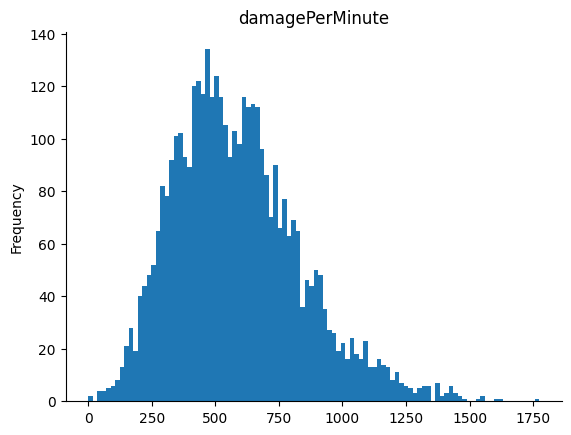

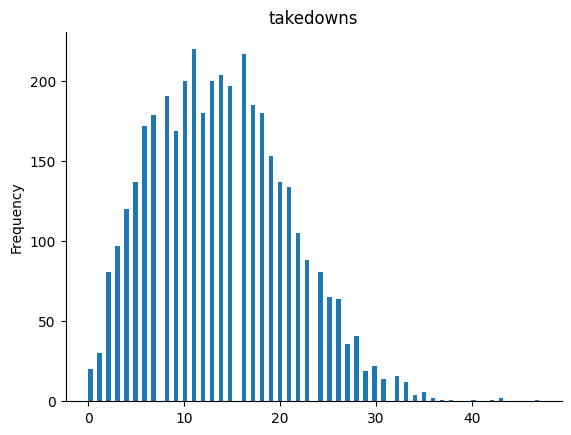

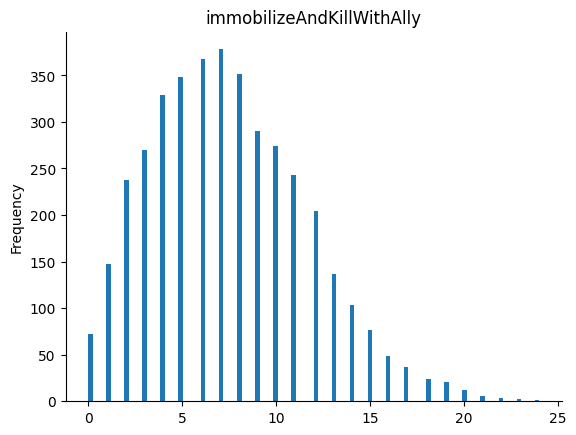

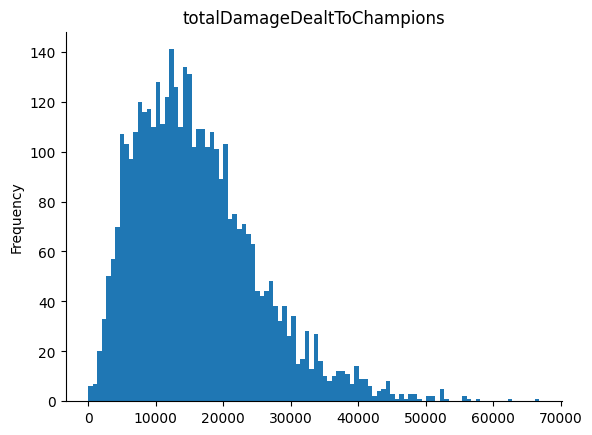

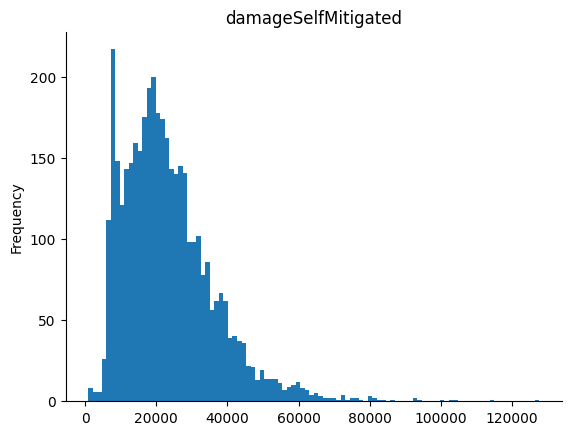

In [ ]:
#plot teste
for col in test_viego_df.columns:
  if col not in ['champion']:
    test_viego_df[col].plot(kind='hist', bins=100, title=col)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

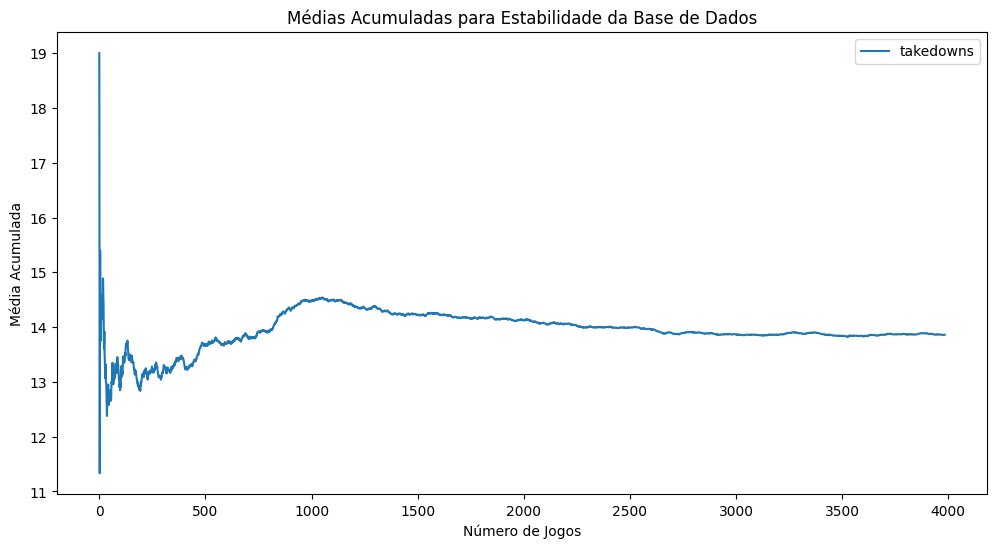

In [ ]:
test_viego_df = pd.read_csv('/content/Viego_teste.csv')
columns = ['takedowns']  # Pd botar qqr uma das variaveis
data = test_viego_df[columns]


plt.figure(figsize=(12, 6))
for col in columns:
    cumulative_mean = data[col].expanding().mean()
    plt.plot(cumulative_mean, label=col)

plt.xlabel("Número de Jogos")
plt.ylabel("Média Acumulada")
plt.legend()
plt.title("Médias Acumuladas para Estabilidade da Base de Dados")
plt.show()

In [ ]:
#codigo pra achar o tamanho da amostra necessaria (obrigado chat gpt)

import numpy as np
from scipy import stats

# Definindo uma função para calcular o tamanho da amostra necessário
def calcular_tamanho_amostra(s, z=1.28, e=0.25):
    """
    s: desvio padrão da amostra
    z: valor z para o nível de confiança desejado (1.96 para 95%)
    e: margem de erro
    Retorna o tamanho da amostra necessário.
    """
    return (z * s / e) ** 2

# Estatísticas iniciais
mean_dpm = test_viego_df['takedowns'].mean()  # média do dano por minuto
std_dpm = test_viego_df['takedowns'].std()    # desvio padrão do dano por minuto

# Tamanho da amostra necessário com 95% de confiança e 5% de margem de erro
tamanho_amostra_necessario = calcular_tamanho_amostra(std_dpm)

# Estatísticas calculadas
mean_dpm, std_dpm, tamanho_amostra_necessario, test_viego_df.shape[0]


NameError: name 'test_viego_df' is not defined

#Clusterização Combate

## Normalização dos Dados

In [ ]:
#Faz as médias do df combate por campeão

df_combate = pd.read_csv('/content/data/df_combate.csv')
df_combate = df_combate.fillna(0)
df_combate = df_combate.drop(columns=['Unnamed: 0'], errors='ignore')
df_combate = df_combate.groupby('champion').mean()
df_combate

highestCrowdControlScore  timeCCingOthers  totalTimeCCDealt  \
champion                                                                    
Amumu                         0.144077        34.578442        219.289221   
Belveth                       0.010848        18.948718        325.332347   
Briar                         0.051242        27.562112        276.369565   
Diana                         0.000000        11.073260        195.705128   
Ekko                          0.011472        19.786807        448.584130   
Elise                         0.039160        25.112940        178.787741   
Evelynn                       0.000000        14.446293        207.694402   
FiddleSticks                  0.411022        44.245695        767.702641   
Gragas                        0.082011        30.816138        435.726190   
Graves                        0.002943        18.825486        474.640965   
Gwen                          0.000000        10.031401        235.036232   
Hecarim                       0.004135        19.434873        217.815300   
Ivern                         0.388688        45.344164        275.086643   
JarvanIV                      0.022465        23.990207        502.374424   
Karthus                       0.003339        18.219533        218.787980   
Kayn                          0.002242        15.605381        291.604634   
Khazix                        0.000631         8.976671        249.771122   
Kindred                       0.000917        10.511009        240.709174   
LeeSin                        0.002946        19.167894        498.334315   
Lillia                        0.013466        23.985826        443.552799   
MasterYi                      0.000000         7.723562        238.217069   
MonkeyKing                    0.003268        16.988017        189.232026   
Nidalee                       0.000000         7.600699        153.909091   
Nocturne                      0.990320       151.805659        586.010424   
Nunu                          0.092357        32.856688        392.008493   
Rammus                        0.283951        41.465432        571.791358   
RekSai                        0.053908        29.117251        324.025606   
Rengar                        0.002037        15.260692        267.340122   
Sejuani                       0.054811        30.995128        360.437272   
Shaco                         0.038228        27.403128        728.248480   
Shyvana                       0.000000         7.604167        188.690972   
Skarner                       0.219298        39.215461        615.077303   
Taliyah                       0.059783        27.903080        702.508152   
Talon                         0.000000         6.649338        298.379017   
Udyr                          0.085845        31.378995       1752.721461   
Vi                            0.019983        26.526228        279.129892   
Viego                         0.001255        17.293350        218.311167   
Volibear                      0.052448        27.801865        581.010490   
Warwick                       0.041966        28.239808        304.489209   
XinZhao                       0.010135        23.157095        489.753378   
Zac                           0.237697        40.204271        484.848654   

                assists    deaths     kills       kda  takedowns  doubleKills  \
champion                                                                        
Amumu          9.862327  5.896478  4.609392  3.474846  14.469584     0.324440   
Belveth        6.181460  4.412229  7.318540  5.099026  13.500000     0.569034   
Briar          7.119565  6.788820  8.021739  3.145362  15.128882     0.652174   
Diana          7.039377  5.818681  7.126374  3.900054  14.165751     0.695055   
Ekko           6.805927  5.131931  7.724665  4.371751  14.530593     0.802103   
Elise          7.464245  5.176504  7.622588  4.445462  15.085698     0.614075   
Evelynn        6.897126  4.703480  8.547655  5.172070 

In [ ]:
#Normalização dos valores

from sklearn.preprocessing import MinMaxScaler

# Estamos normalizando só as colunas numericas duh
numerical_cols = df_combate.select_dtypes(include=['number']).columns


scaler = MinMaxScaler()
df_combate[numerical_cols] = scaler.fit_transform(df_combate[numerical_cols])
print(df_combate.head())
scaled_data = df_combate

          highestCrowdControlScore  timeCCingOthers  totalTimeCCDealt  \
champion                                                                
Amumu                     0.145485         0.192407          0.040893   
Belveth                   0.010954         0.084732          0.107219   
Briar                     0.051743         0.144071          0.076595   
Diana                     0.000000         0.030477          0.026142   
Ekko                      0.011584         0.090506          0.184309   

           assists    deaths     kills       kda  takedowns  doubleKills  \
champion                                                                   
Amumu     0.556629  0.728922  0.277210  0.078096   0.427472     0.131085   
Belveth   0.104176  0.278033  0.674360  0.463067   0.260230     0.294939   
Briar     0.219488  1.000000  0.777446  0.000000   0.541193     0.350634   
Diana     0.209631  0.705289  0.646189  0.178881   0.375064     0.379360   
Ekko      0.180935  0.496666  0.

In [ ]:
# Botão pra salvar uma versão já normalizada


df_combate.to_csv('combate_df.csv', encoding='utf-8')


##Cluster Hierarquico


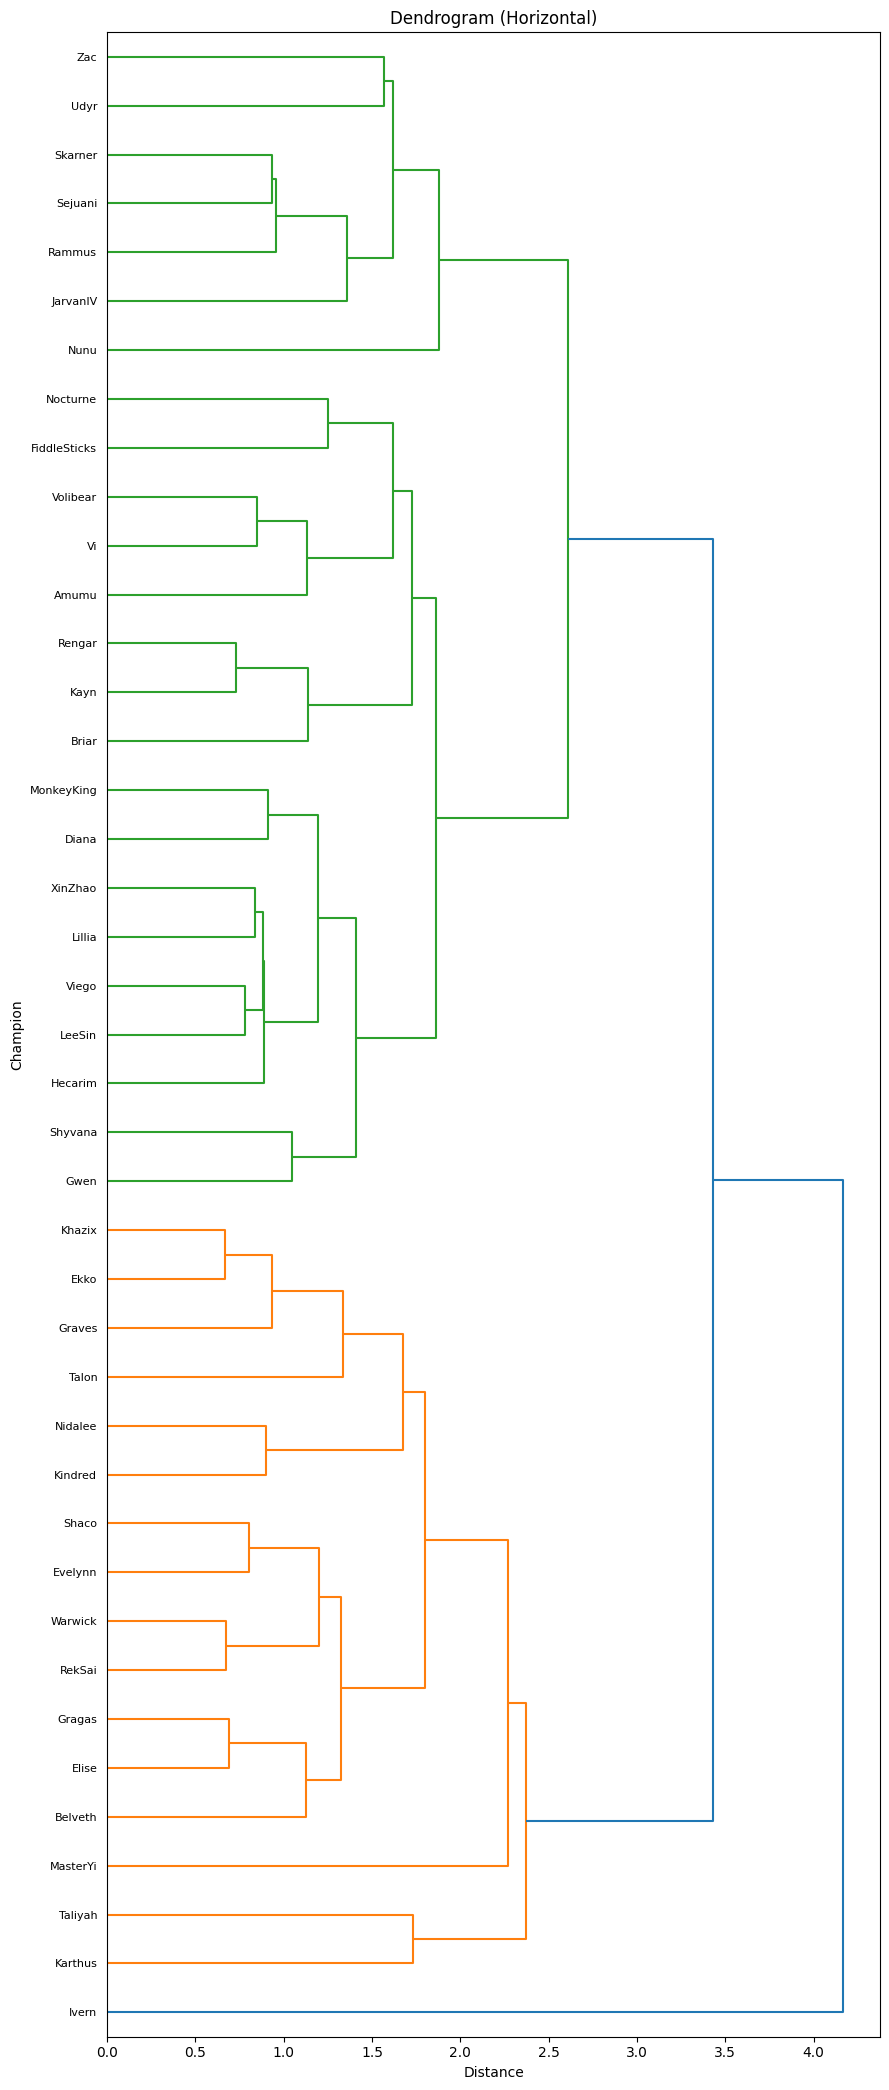

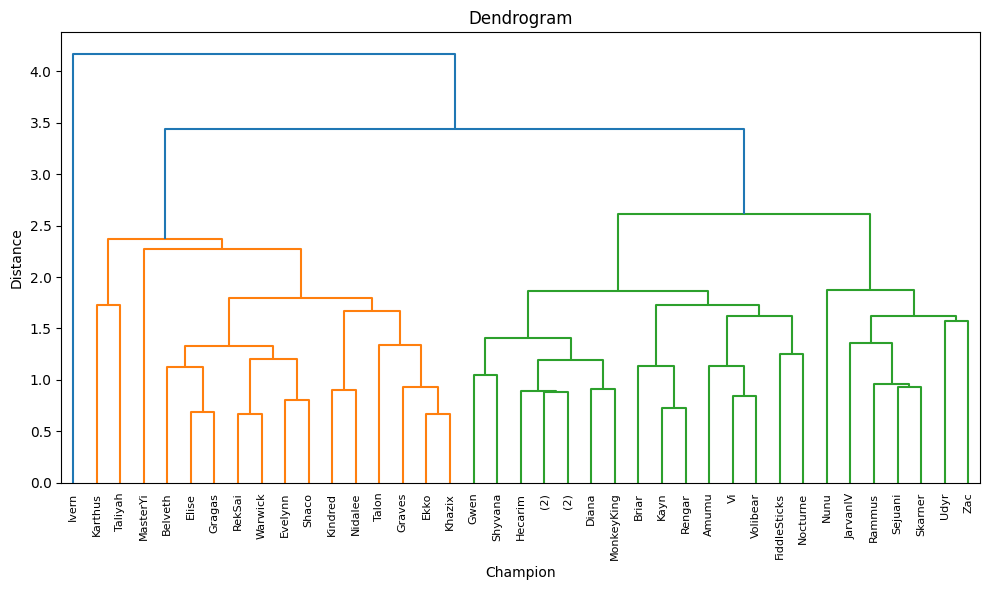

In [4]:
#codigo da aula do eric

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df_combate is already loaded and preprocessed
df_combate = pd.read_csv('/content/combate_df_scaled.csv', index_col=0) # Load the preprocessed data

# Prepare data for clustering (remove champion column if necessary)
#scaled_data = df_combate.drop(columns=['champion'], errors='ignore')
scaled_data = df_combate
# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=7, labels=df_combate.index.tolist()) # Added labels for champions
plt.title('Dendrogram')
plt.xlabel('Champion') # Changed xlabel to Champion
plt.ylabel('Distance')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
scaled_data.to_csv('scaled_data_atualizado.csv', index=False)

In [ ]:
# 5 clusters se mostrou o melhor, quando usamos mais doq isso ele só filtra mais ainda as anomalias
# 7 se pá é melhor

# 4 Clusters ele separa entre campeões com CC baixissimo (Assassins + Alguns Lutadores), Um grupo pra lutadores com controle de grupo médio e magos, um grupo pros campeões com alto controle de grupo e um grupo pro Ivern
# O quinto cluster separa a Shyvanna e a Gwen dos Assassins


chosen_num_clusters = 7

# Realizar o clustering hierárquico com o número escolhido de clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, chosen_num_clusters, criterion='maxclust')

In [ ]:

# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data.to_csv('scaled_data_atualizado.csv', index=False)

# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[scaled_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        highestCrowdControlScore       timeCCingOthers       totalTimeCCDealt  \
                            mean count            mean count             mean   
Cluster                                                                         
1                       0.021911    13        0.084785    13         0.114002   
2                       0.101487    17        0.153621    17         0.122460   
3                       0.031869     2        0.113064     2         0.191854   
4                       0.000000     1        0.007400     1         0.052732   
5                       0.152151     6        0.192153     6         0.350656   
6                       0.093259     1        0.180546     1         0.148923   
7                       0.392488     1        0.266573     1         0.075792   

                assists          deaths        ... teamElderDragonKills        \
        count      mean count      mean count  ...                 mean count   
Cluster                    

In [ ]:
import pandas as pd

# Carregar os arquivos CSV
scaled_data_path = '/content/scaled_data_atualizado.csv'
combate_df_path = '/content/normalizados/combate_df.csv'

# Ler os arquivos
scaled_data_atualizado = pd.read_csv(scaled_data_path)
combate_df = pd.read_csv(combate_df_path)

# Visualizar as primeiras linhas de ambos os DataFrames para análise
scaled_data_atualizado.head(), combate_df.head()


(   highestCrowdControlScore  timeCCingOthers  totalTimeCCDealt   assists  \
 0                  0.145485         0.192407          0.040893  0.556629   
 1                  0.010954         0.084732          0.107219  0.104176   
 2                  0.051743         0.144071          0.076595  0.219488   
 3                  0.000000         0.030477          0.026142  0.209631   
 4                  0.011584         0.090506          0.184309  0.180935   
 
      deaths     kills       kda  takedowns  doubleKills  damageSelfMitigated  \
 0  0.728922  0.277210  0.078096   0.427472     0.131085             0.398766   
 1  0.278033  0.674360  0.463067   0.260230     0.294939             0.275294   
 2  1.000000  0.777446  0.000000   0.541193     0.350634             0.405378   
 3  0.705289  0.646189  0.178881   0.375064     0.379360             0.461814   
 4  0.496666  0.733896  0.290685   0.437995     0.451072             0.259692   
 
    ...  skillshotsHit  soloKills  survivedSingl

In [ ]:
# Adicionar a coluna 'champion' ao DataFrame scaled_data_atualizado
scaled_data_atualizado['champion'] = combate_df['champion']

# Visualizar as primeiras linhas do DataFrame atualizado
scaled_data_atualizado.head()

new_order = ['champion', 'Cluster'] + [col for col in scaled_data_atualizado.columns if col not in ['champion', 'Cluster']]
scaled_data_atualizado = scaled_data_atualizado[new_order]

scaled_data_atualizado.to_csv('scaled_data_atualizado.csv', index=False)
scaled_data_atualizado

champion  Cluster  highestCrowdControlScore  timeCCingOthers  \
0          Amumu        2                  0.145485         0.192407   
1        Belveth        1                  0.010954         0.084732   
2          Briar        2                  0.051743         0.144071   
3          Diana        2                  0.000000         0.030477   
4           Ekko        1                  0.011584         0.090506   
5          Elise        1                  0.039543         0.127198   
6        Evelynn        1                  0.000000         0.053714   
7   FiddleSticks        2                  0.415039         0.259006   
8         Gragas        1                  0.082812         0.166488   
9         Graves        1                  0.002972         0.083883   
10          Gwen        2                  0.000000         0.023299   
11       Hecarim        2                  0.004175         0.088081   
12         Ivern        7                  0.392488         0.266573   
13      JarvanIV        5                  0.022685         0.119463   
14       Karthus        3                  0.003372         0.079709   
15          Kayn        2                  0.002264         0.061699   
16        Khazix        1                  0.000637         0.016033   
17       Kindred        1                  0.000926         0.026604   
18        LeeSin        2                  0.002974         0.086242   
19        Lillia        2                  0.013597         0.119433   
20      MasterYi        4                  0.000000         0.007400   
21    MonkeyKing        2                  0.003300         0.071224   
22       Nidalee        1                  0.000000         0.006554   
23      Nocturne        2                  1.000000         1.000000   
24          Nunu        6                  0.093259         0.180546   
25        Rammus        5                  0.286726         0.239852   
26        RekSai        1                  0.054435         0.154784   
27        Rengar        2                  0.002057         0.059325   
28       Sejuani        5                  0.055347         0.167721   
29         Shaco        1                  0.038601         0.142975   
30       Shyvana        2                  0.000000         0.006578   
31       Skarner        5                  0.221442         0.224352   
32       Taliyah        3                  0.060367         0.146420   
33         Talon        1                  0.000000         0.000000   
34          Udyr        5                  0.086684         0.170366   
35            Vi        2                  0.020179         0.136934   
36         Viego        2                  0.001267         0.073328   
37      Volibear        2                  0.052960         0.145722   
38       Warwick        1                  0.042377         0.148739   
39       XinZhao        2                  0.010234         0.113724   
40           Zac        5                  0.240021         0.231164   

    totalTimeCCDealt   assists    deaths     kills       kda  takedowns  ...  \
0           0.040893  0.556629  0.728922  0.277210  0.078096   0.427472  ...   
1           0.107219  0.104176  0.278033  0.674360  0.463067   0.260230  ...   
2           0.076595  0.219488  1.000000  0.777446  0.000000   0.541193  ...   
3           0.026142  0.209631  0.705289  0.646189  0.178881   0.375064  ...   
4           0.184309  0.180935  0.496666  0.733896  0.290685   0.437995  ...   
5           0.015561  0.261856  0.510207  0.718932  0.308156   0.533744  ...   
6           0.033641  0.192146  0.366510  0.854543  0.480380   0.595682  ...   
7           0.383906  0.440047  0.510299  0.380251  0.212409   0.385487  ...   
8           0.176267  0.342995  0.410377  0.585197  0.366801   0.490442  ...   
9           0.200606  0.109544  0.535707  0.760367  0.230813   0.368911  ...   
10          0.050742  0.013879  0.579862  0.616686  0.074488   0.065660  ...   
11          0.039971  0

In [ ]:
# Caminho do novo arquivo carregado
scaled_data_updated_path = '/content/scaled_data_atualizado.csv'

# Carregar o arquivo atualizado
scaled_data_atualizado_v2 = pd.read_csv(scaled_data_updated_path)

# Agrupar os campeões por cluster e listar os nomes
clusters_champions = scaled_data_atualizado_v2.groupby('Cluster')['champion'].apply(list)

# Exibir os campeões de cada cluster
clusters_champions


Cluster
1    [Diana, Gwen, Hecarim, LeeSin, Lillia, MonkeyK...
2    [Belveth, Briar, Elise, FiddleSticks, Gragas, ...
3    [Ekko, Evelynn, Graves, Khazix, Kindred, Nidal...
4                                   [Karthus, Taliyah]
5                                           [MasterYi]
6    [Amumu, JarvanIV, Nunu, Rammus, Sejuani, Skarn...
7                                              [Ivern]
Name: champion, dtype: object

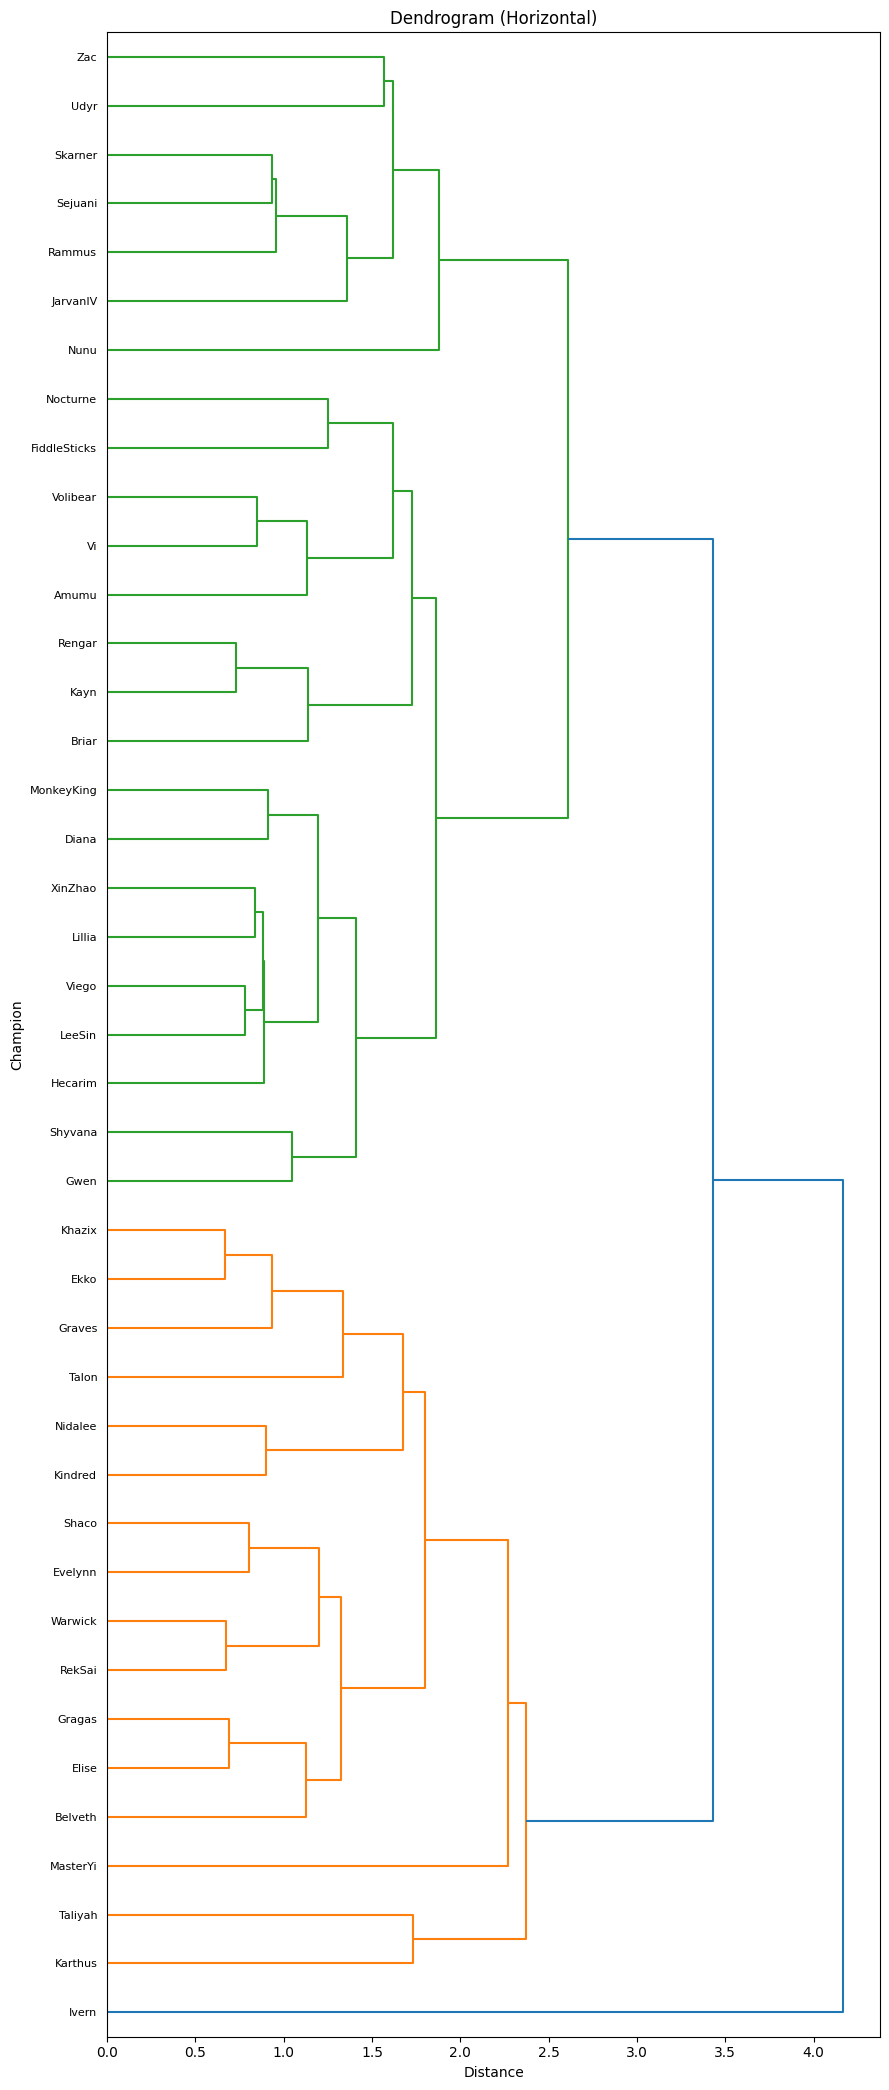

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

scaled_data_atualizado_v2 = pd.read_csv('/content/combate_df_scaled.csv')

scaled_data = scaled_data_atualizado_v2.drop(columns=['champion', 'Cluster'], errors='ignore')
linkage_matrix = linkage(scaled_data, method='complete', metric='euclidean')


# Plot the dendrogram horizontally
plt.figure(figsize=(9, 21))  # Adjust figure size as needed
dendrogram(linkage_matrix, orientation='right', labels=scaled_data_atualizado_v2['champion'].tolist())
plt.title('Dendrogram (Horizontal)')
plt.xlabel('Distance')
plt.ylabel('Champion')
plt.tight_layout()
plt.show()

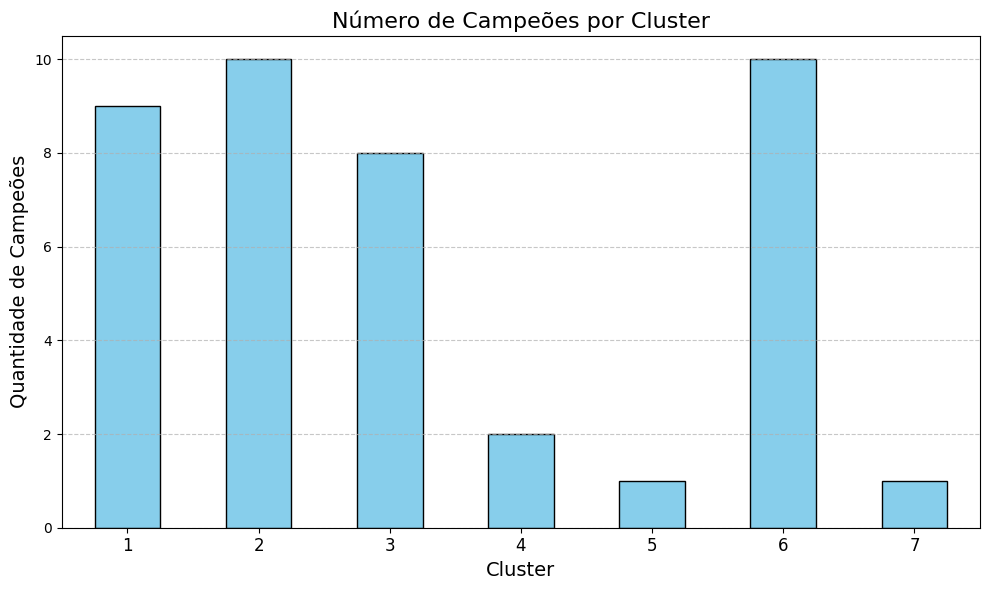

In [ ]:
import matplotlib.pyplot as plt

# Contar o número de campeões em cada cluster
clusters_count = clusters_champions.apply(len)

# Criar um gráfico de barras para visualizar os campeões por cluster
plt.figure(figsize=(10, 6))
clusters_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar o gráfico
plt.title('Número de Campeões por Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Quantidade de Campeões', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [ ]:
# prompt: faça o Coeficiente de Silhouette, Davies-Bouldin e Calinski-Harabasz para essa clusterização acima

from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score

# Assuming df_combate is your DataFrame with 'Cluster' column and features used for clustering
# You might need to adjust the column names based on your actual DataFrame.
X = df_combate.drop('Cluster', axis=1)  # Features used for clustering
#X = X.drop('champion', axis=1)
labels = df_combate['Cluster']

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Score
db_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Score: {db_score}")

# Calculate Calinski-Harabasz Score
ch_score = calinski_harabasz_score(X, labels)
print(f"Calinski-Harabasz Score: {ch_score}")

Silhouette Score: 0.10608974112855729
Davies-Bouldin Score: 1.154803663062175
Calinski-Harabasz Score: 6.8119374360343565


In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster

# Load the data (assuming df_combate is already loaded and preprocessed)'
df_combate = pd.read_csv('/content/scaled_data_atualizado.csv')
df_combate = df_combate.set_index('champion')
# Select numerical columns for clustering
numerical_cols = df_combate.select_dtypes(include=['number']).columns
scaled_data = df_combate[numerical_cols]


# Perform clustering for different numbers of clusters
results = []
for n_clusters in range(3, 9):
    print(f"Calculating for {n_clusters} clusters")
    # Perform hierarchical clustering
    linkage_matrix = linkage(scaled_data, method='ward', metric='euclidean')
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    # Calculate metrics
    silhouette = silhouette_score(scaled_data, clusters)
    davies_bouldin = davies_bouldin_score(scaled_data, clusters)
    calinski_harabasz = calinski_harabasz_score(scaled_data, clusters)

    results.append([n_clusters, silhouette, davies_bouldin, calinski_harabasz])

#Silhouette = Mais proximo de 1 melhor
#davies_bouldin = Menor melhor
#Calinski = Maior melhor


# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['n_clusters', 'silhouette', 'davies_bouldin', 'calinski_harabasz'])
print(results_df)
results_df.to_csv('clustering_metrics.csv', index=False)

Calculating for 3 clusters
Calculating for 4 clusters
Calculating for 5 clusters
Calculating for 6 clusters
Calculating for 7 clusters
Calculating for 8 clusters
   n_clusters  silhouette  davies_bouldin  calinski_harabasz
0           3    0.415864        0.915760          60.813769
1           4    0.401091        0.756678          48.468801
2           5    0.360988        0.894657          42.990224
3           6    0.322966        1.038600          41.592509
4           7    0.325709        0.892544          38.293097
5           8    0.230055        1.123761          35.084125


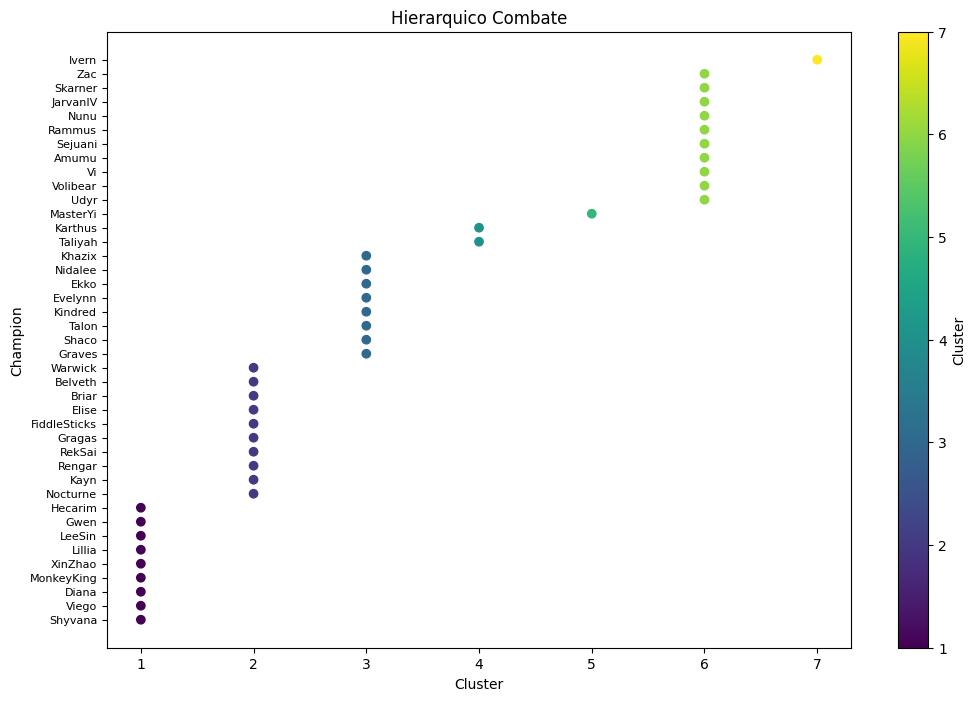

In [6]:
# prompt: plote um grafico que mostre aonde cada campeão pertence (cluster em)  como nome dos campeões em ordem alfabetica no eixo y e os clusters no x scaled_data.to_csv('Combate_Kmeans.csv', index=False) e bote cores nos pontos baseados no eixo x
# scaled_data mostre o nome dos campeoes

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
X = pd.read_csv('/content/combate_hierarquico.csv')

# Sort champions alphabetically
X = X.sort_values('Cluster')

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(X['Cluster'], X['champion'], c=X['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Hierarquico Combate')

# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


plt.show()

## Kmeans

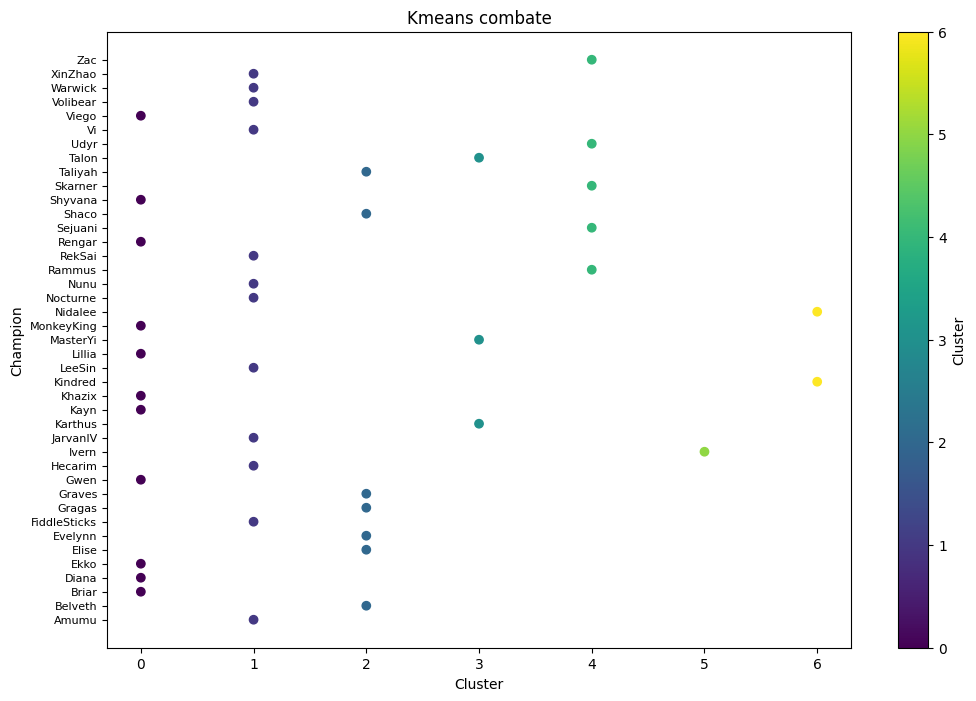

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

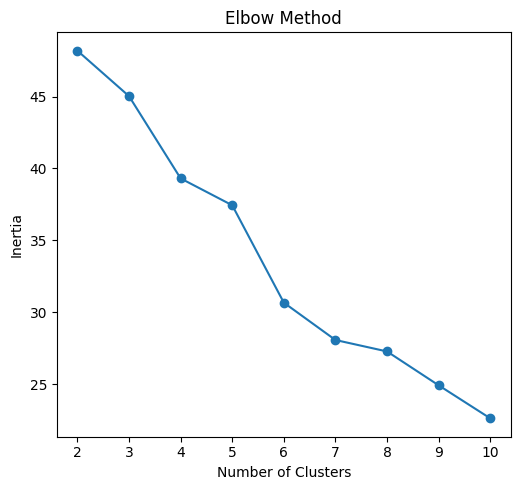

In [ ]:
# Plotar o gráfico Elbow para ajudar a escolher o número de clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()

In [ ]:
# Escolher o número de clusters com base na análise dos gráficos acima
chosen_num_clusters = 7

# Realizar a clusterização com o número escolhido de clusters
kmeans = KMeans(n_clusters=chosen_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
quantitative_data = scaled_data.select_dtypes(include=['number'])
quantitative_data

highestCrowdControlScore  timeCCingOthers  totalTimeCCDealt  \
champion                                                                    
Amumu                         0.145485         0.192407          0.040893   
Belveth                       0.010954         0.084732          0.107219   
Briar                         0.051743         0.144071          0.076595   
Diana                         0.000000         0.030477          0.026142   
Ekko                          0.011584         0.090506          0.184309   
Elise                         0.039543         0.127198          0.015561   
Evelynn                       0.000000         0.053714          0.033641   
FiddleSticks                  0.415039         0.259006          0.383906   
Gragas                        0.082812         0.166488          0.176267   
Graves                        0.002972         0.083883          0.200606   
Gwen                          0.000000         0.023299          0.050742   
Hecarim                       0.004175         0.088081          0.039971   
Ivern                         0.392488         0.266573          0.075792   
JarvanIV                      0.022685         0.119463          0.217953   
Karthus                       0.003372         0.079709          0.040579   
Kayn                          0.002264         0.061699          0.086124   
Khazix                        0.000637         0.016033          0.059958   
Kindred                       0.000926         0.026604          0.054290   
LeeSin                        0.002974         0.086242          0.215426   
Lillia                        0.013597         0.119433          0.181162   
MasterYi                      0.000000         0.007400          0.052732   
MonkeyKing                    0.003300         0.071224          0.022093   
Nidalee                       0.000000         0.006554          0.000000   
Nocturne                      1.000000         1.000000          0.270264   
Nunu                          0.093259         0.180546          0.148923   
Rammus                        0.286726         0.239852          0.261370   
RekSai                        0.054435         0.154784          0.106402   
Rengar                        0.002057         0.059325          0.070947   
Sejuani                       0.055347         0.167721          0.129176   
Shaco                         0.038601         0.142975          0.359229   
Shyvana                       0.000000         0.006578          0.021755   
Skarner                       0.221442         0.224352          0.288444   
Taliyah                       0.060367         0.146420          0.343129   
Talon                         0.000000         0.000000          0.090361   
Udyr                          0.086684         0.170366          1.000000   
Vi                            0.020179         0.136934          0.078321   
Viego                         0.001267         0.073328          0.040281   
Volibear                      0.052960         0.145722          0.267137   
Warwick                       0.042377         0.148739          0.094182   
XinZhao                       0.010234         0.113724          0.210059   
Zac                           0.240021         0.231164          0.206991   

               assists    deaths     kills       kda  takedowns  doubleKills  \
champion                                                                       
Amumu         0.556629  0.728922  0.277210  0.078096   0.427472     0.131085   
Belveth       0.104176  0.278033  0.674360  0.463067   0.260230     0.294939   
Briar         0.219488  1.000000  0.777446  0.000000   0.541193     0.350634   
Diana         0.209631  0.705289  0.646189  0.178881   0.375064     0.379360   
Ekko          0.180935  0.496666  0.733896  0.290685   0.437995     0.451072   
Elise         0.261856  0.510207  0.718932  0.308156   0.533744     0.325112   
Evelynn       0.192146  0.366510  0.854543  0.480380   0.59568

In [ ]:
# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data.to_excel('combate_kmeans.xlsx', index=False)


# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[quantitative_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        highestCrowdControlScore       timeCCingOthers       totalTimeCCDealt  \
                            mean count            mean count             mean   
Cluster                                                                         
0                       0.007859    11        0.063270    11         0.074555   
1                       0.155317    12        0.218804    12         0.172786   
2                       0.033607     7        0.115059     7         0.176522   
3                       0.001124     3        0.029036     3         0.061224   
4                       0.178044     5        0.206691     5         0.377196   
5                       0.392488     1        0.266573     1         0.075792   
6                       0.000463     2        0.016579     2         0.027145   

                assists          deaths        ... teamBaronKills        \
        count      mean count      mean count  ...           mean count   
Cluster                                

In [ ]:
scaled_data = scaled_data.reset_index()

new_order = ['champion', 'Cluster'] + [col for col in scaled_data.columns if col not in ['champion', 'Cluster']]
scaled_data = scaled_data[new_order]

scaled_data.to_csv('Combate_Kmeans.csv', index=False)
scaled_data




champion  Cluster  level_0  index  highestCrowdControlScore  \
0          Amumu        1        0      0                  0.145485   
1        Belveth        2        1      1                  0.010954   
2          Briar        0        2      2                  0.051743   
3          Diana        0        3      3                  0.000000   
4           Ekko        0        4      4                  0.011584   
5          Elise        2        5      5                  0.039543   
6        Evelynn        2        6      6                  0.000000   
7   FiddleSticks        1        7      7                  0.415039   
8         Gragas        2        8      8                  0.082812   
9         Graves        2        9      9                  0.002972   
10          Gwen        0       10     10                  0.000000   
11       Hecarim        1       11     11                  0.004175   
12         Ivern        5       12     12                  0.392488   
13      JarvanIV        1       13     13                  0.022685   
14       Karthus        3       14     14                  0.003372   
15          Kayn        0       15     15                  0.002264   
16        Khazix        0       16     16                  0.000637   
17       Kindred        6       17     17                  0.000926   
18        LeeSin        1       18     18                  0.002974   
19        Lillia        0       19     19                  0.013597   
20      MasterYi        3       20     20                  0.000000   
21    MonkeyKing        0       21     21                  0.003300   
22       Nidalee        6       22     22                  0.000000   
23      Nocturne        1       23     23                  1.000000   
24          Nunu        1       24     24                  0.093259   
25        Rammus        4       25     25                  0.286726   
26        RekSai        1       26     26                  0.054435   
27        Rengar        0       27     27                  0.002057   
28       Sejuani        4       28     28                  0.055347   
29         Shaco        2       29     29                  0.038601   
30       Shyvana        0       30     30                  0.000000   
31       Skarner        4       31     31                  0.221442   
32       Taliyah        2       32     32                  0.060367   
33         Talon        3       33     33                  0.000000   
34          Udyr        4       34     34                  0.086684   
35            Vi        1       35     35                  0.020179   
36         Viego        0       36     36                  0.001267   
37      Volibear        1       37     37                  0.052960   
38       Warwick        1       38     38                  0.042377   
39       XinZhao        1       39     39                  0.010234   
40           Zac        4       40     40                  0.240021   

    timeCCingOthers  totalTimeCCDealt   assists    deaths     kills  ...  \
0          0.192407          0.040893  0.556629  0.728922  0.277210  ...   
1          0.084732          0.107219  0.104176  0.278033  0.674360  ...   
2          0.144071          0.076595  0.219488  1.000000  0.777446  ...   
3          0.030477          0.026142  0.209631  0.705289  0.646189  ...   
4          0.090506          0.184309  0.180935  0.496666  0.733896  ...   
5          0.127198          0.015561  0.261856  0.510207  0.718932  ...   
6          0.053714          0.033641  0.192146  0.366510  0.854543  ...   
7          0.259006          0.383906  0.440047  0.510299  0.380251  ...   
8          0.166488          0.176267  0.342995  0.410377  0.585197  ...   
9          0.083883          0.200606  0.109544  0.535707  0.760367  ...   
10         0.023299          0.050742  0.013879  0.579862  0.616686  ...   
11         0.088081          0.039971  0.324746  0.478989  0.658983  ...   
12         0.266573          0.075792

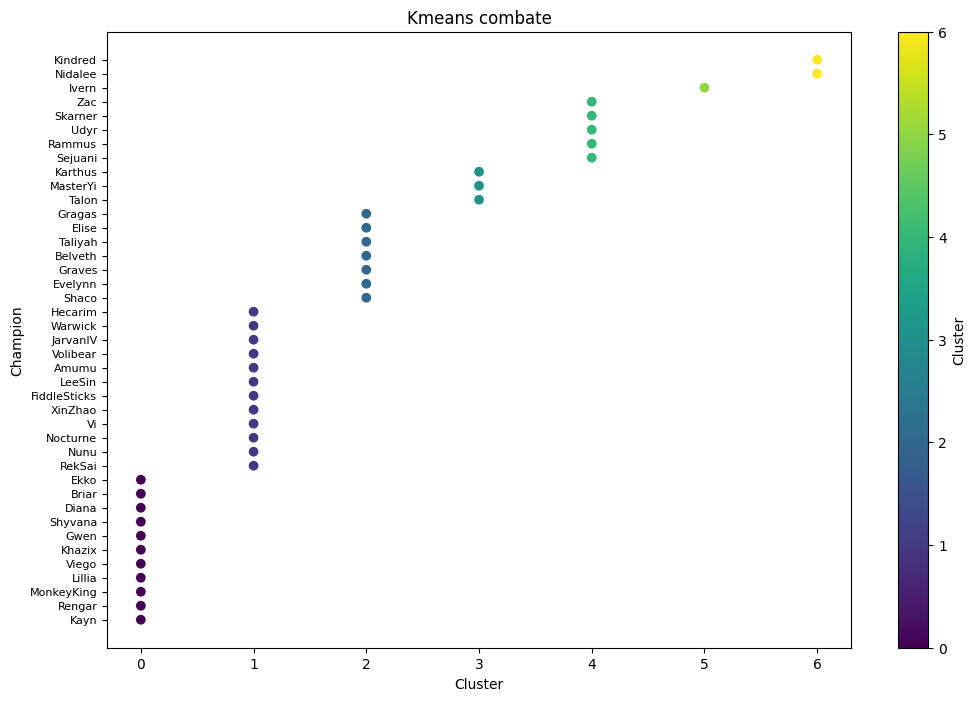

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


scaled_data = pd.read_csv('Combate_Kmeans.csv')

scaled_data = scaled_data.sort_values('Cluster')

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(scaled_data['Cluster'], scaled_data['champion'], c=scaled_data['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Kmeans combate')



# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


plt.show()

## DBScan (Ruim n fiz nem grafico, melhor evitar)

In [ ]:
scaled_data1 = pd.read_csv('/content/combate_df_scaled.csv')

In [ ]:
scaled_data = scaled_data1.select_dtypes(include=['number'])

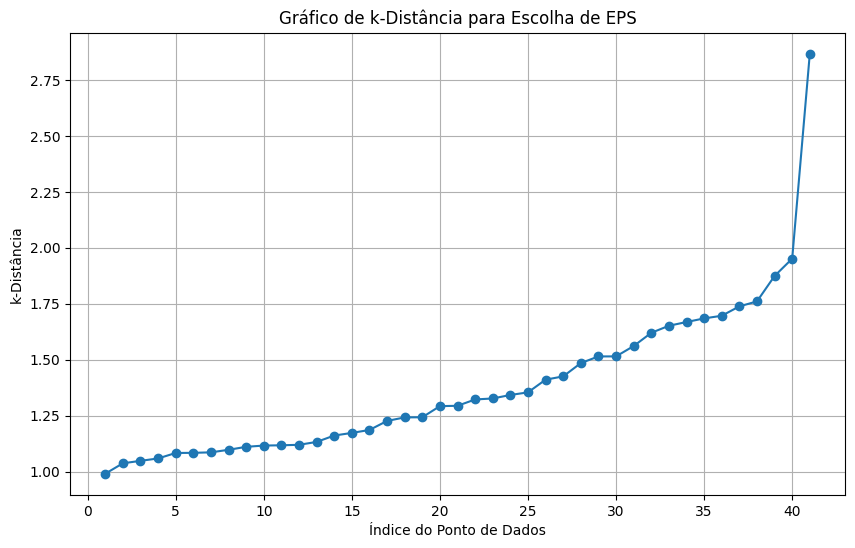

In [ ]:
#Definindo EPS
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
# Calcule as k-distâncias
k = 12  # Defina o número de vizinhos mais próximos (ajuste conforme necessário)
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_data)  # Use seus dados padronizados
distances, _ = nbrs.kneighbors(scaled_data)

# Ordene as k-distâncias em ordem decrescente
k_distances = np.sort(distances[:, -1])

# Plote o gráfico de k-distância
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(k_distances) + 1), k_distances, marker='o')
plt.title('Gráfico de k-Distância para Escolha de EPS')
plt.xlabel('Índice do Ponto de Dados')
plt.ylabel('k-Distância')
plt.grid(True)
#plt.ylim(0, 2)
# Exiba o gráfico
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Realizar a clusterização com DBSCAN
dbscan = DBSCAN(eps=0.95, min_samples=1)  # Ajuste os parâmetros conforme necessário
clusters = dbscan.fit_predict(scaled_data)

In [ ]:
# prompt: lista com todos os nomes de coluna em scaled_data

import pandas as pd

# Get the column names
column_names = scaled_data.columns.tolist()

# Print the list of column names
column_names

['highestCrowdControlScore',
 'timeCCingOthers',
 'totalTimeCCDealt',
 'assists',
 'deaths',
 'kills',
 'kda',
 'takedowns',
 'doubleKills',
 'damageSelfMitigated',
 'killingSprees',
 'largestKillingSpree',
 'largestMultiKill',
 'damagePerMinute',
 'totalDamageDealtToChampions',
 'totalDamageShieldedOnTeammates',
 'totalHeal',
 'effectiveHealAndShielding',
 'totalHealsOnTeammates',
 'totalTimeSpentDead',
 'damageTakenOnTeamPercentage',
 'totalDamageTaken',
 'immobilizeAndKillWithAlly',
 'killAfterHiddenWithAlly',
 'killParticipation',
 'multikills',
 'multikillsAfterAggressiveFlash',
 'outnumberedKills',
 'skillshotsDodged',
 'skillshotsHit',
 'soloKills',
 'survivedSingleDigitHpCount',
 'survivedThreeImmobilizesInFight',
 'teamBaronKills',
 'teamElderDragonKills',
 'teamRiftHeraldKills',
 'teamDamagePercentage',
 'tookLargeDamageSurvived']

In [ ]:
quantitative_data = scaled_data1[column_names]

In [ ]:
# Adicionar a coluna de grupos ao DataFrame original
scaled_data1['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data1.to_excel('combate_Scan.xlsx', index=False)


# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data1.groupby('Cluster')[quantitative_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        highestCrowdControlScore       timeCCingOthers       totalTimeCCDealt  \
                            mean count            mean count             mean   
Cluster                                                                         
0                       0.145485     1        0.192407     1         0.040893   
1                       0.010954     1        0.084732     1         0.107219   
2                       0.039143    24        0.106272    24         0.164586   
3                       0.000000     1        0.023299     1         0.050742   
4                       0.392488     1        0.266573     1         0.075792   
5                       0.022685     1        0.119463     1         0.217953   
6                       0.003372     1        0.079709     1         0.040579   
7                       0.000463     2        0.016579     2         0.027145   
8                       0.000000     1        0.007400     1         0.052732   
9                       1.00

## Mean Shift

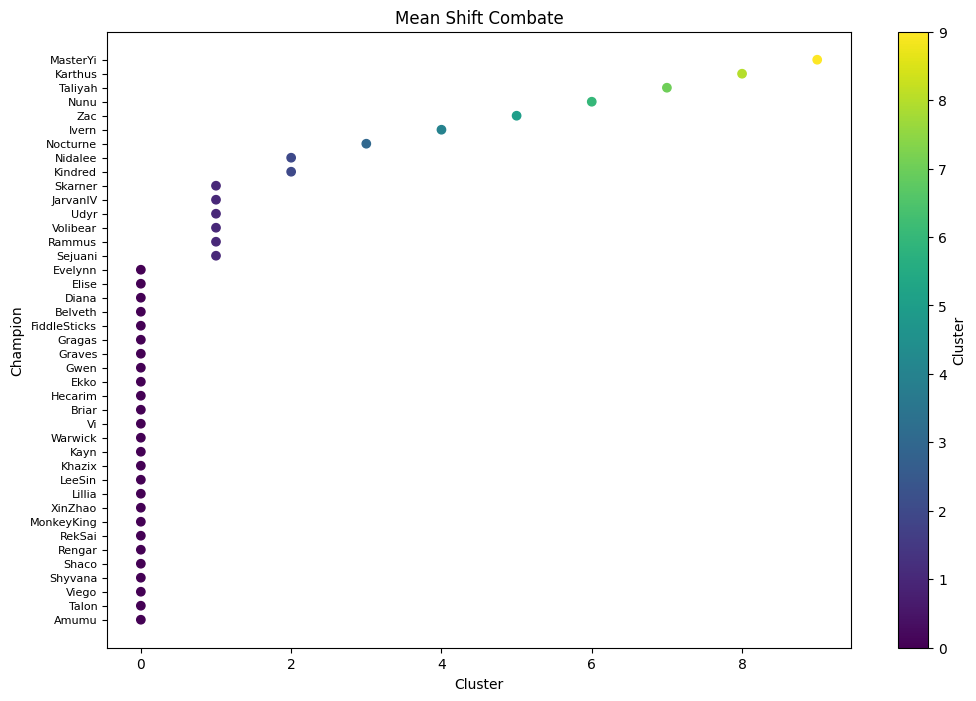

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# Carregar o conjunto de dados Iris

X = pd.read_csv('/content/combate_df_scaled.csv')
X = X.select_dtypes(include=['number'])

# Estimativa da largura da banda
bandwidth = estimate_bandwidth(X, quantile=0.12) # a distância tal que 20% das distâncias entre os pontos estarão dentro da largura de banda escolhida.

# Criação de um objeto Mean-Shift com largura da banda estimada
ms = MeanShift(bandwidth=bandwidth)

# Fit do modelo aos dados
ms.fit(X)

# Obtenção dos rótulos dos clusters
labels = ms.labels_

#X = pd.read_csv('/content/combate_df_scaled.csv')
X['Cluster'] = labels

# Número de clusters encontrados
n_clusters = len(np.unique(labels))

print(f'Número de clusters encontrados: {n_clusters}')

# Calcular estatísticas descritivas para cada variável em cada cluster
cluster_stats = X.groupby('Cluster').agg(['mean', 'count'])

# Imprimir as estatísticas descritivas
print(cluster_stats)


X = pd.read_csv('/content/combate_df_scaled.csv')
X['Cluster'] = labels




Número de clusters encontrados: 10
        highestCrowdControlScore       timeCCingOthers       totalTimeCCDealt  \
                            mean count            mean count             mean   
Cluster                                                                         
0                       0.036778    26        0.097495    26         0.114313   
1                       0.120974     6        0.177913     6         0.360680   
2                       0.000463     2        0.016579     2         0.027145   
3                       1.000000     1        1.000000     1         0.270264   
4                       0.392488     1        0.266573     1         0.075792   
5                       0.240021     1        0.231164     1         0.206991   
6                       0.093259     1        0.180546     1         0.148923   
7                       0.060367     1        0.146420     1         0.343129   
8                       0.003372     1        0.079709     1         0.040

In [ ]:
X

champion  highestCrowdControlScore  timeCCingOthers  totalTimeCCDealt  \
0          Amumu                  0.145485         0.192407          0.040893   
1        Belveth                  0.010954         0.084732          0.107219   
2          Briar                  0.051743         0.144071          0.076595   
3          Diana                  0.000000         0.030477          0.026142   
4           Ekko                  0.011584         0.090506          0.184309   
5          Elise                  0.039543         0.127198          0.015561   
6        Evelynn                  0.000000         0.053714          0.033641   
7   FiddleSticks                  0.415039         0.259006          0.383906   
8         Gragas                  0.082812         0.166488          0.176267   
9         Graves                  0.002972         0.083883          0.200606   
10          Gwen                  0.000000         0.023299          0.050742   
11       Hecarim                  0.004175         0.088081          0.039971   
12         Ivern                  0.392488         0.266573          0.075792   
13      JarvanIV                  0.022685         0.119463          0.217953   
14       Karthus                  0.003372         0.079709          0.040579   
15          Kayn                  0.002264         0.061699          0.086124   
16        Khazix                  0.000637         0.016033          0.059958   
17       Kindred                  0.000926         0.026604          0.054290   
18        LeeSin                  0.002974         0.086242          0.215426   
19        Lillia                  0.013597         0.119433          0.181162   
20      MasterYi                  0.000000         0.007400          0.052732   
21    MonkeyKing                  0.003300         0.071224          0.022093   
22       Nidalee                  0.000000         0.006554          0.000000   
23      Nocturne                  1.000000         1.000000          0.270264   
24          Nunu                  0.093259         0.180546          0.148923   
25        Rammus                  0.286726         0.239852          0.261370   
26        RekSai                  0.054435         0.154784          0.106402   
27        Rengar                  0.002057         0.059325          0.070947   
28       Sejuani                  0.055347         0.167721          0.129176   
29         Shaco                  0.038601         0.142975          0.359229   
30       Shyvana                  0.000000         0.006578          0.021755   
31       Skarner                  0.221442         0.224352          0.288444   
32       Taliyah                  0.060367         0.146420          0.343129   
33         Talon                  0.000000         0.000000          0.090361   
34          Udyr                  0.086684         0.170366          1.000000   
35            Vi                  0.020179         0.136934          0.078321   
36         Viego                  0.001267         0.073328          0.040281   
37      Volibear                  0.052960         0.145722          0.267137   
38       Warwick                  0.042377         0.148739          0.094182   
39       XinZhao                  0.010234         0.113724          0.210059   
40           Zac                  0.240021         0.231164          0.206991   

     assists    deaths     kills       kda  takedowns  doubleKills  ...  \
0   0.556629  0.728922  0.277210  0.078096   0.427472     0.131085  ...   
1   0.104176  0.278033  0.674360  0.463067   0.260230     0.294939  ...   
2   0.219488  1.000000  0.777446  0.000000   0.541193     0.350634  ...   
3   0.209631  0.705289  0.646189  0.178881   0.375064     0.379360  ...   
4   0.180935  0.496666  0.733896  0.290685   0.437995     0.451072  ...   
5   0.261856  0.510207  0.718932  0.308156   0.533744     0.325112  ...   
6   0.192146  0.366510  0.854543  0.480380   0.595682     0.316089  ...   
7   0

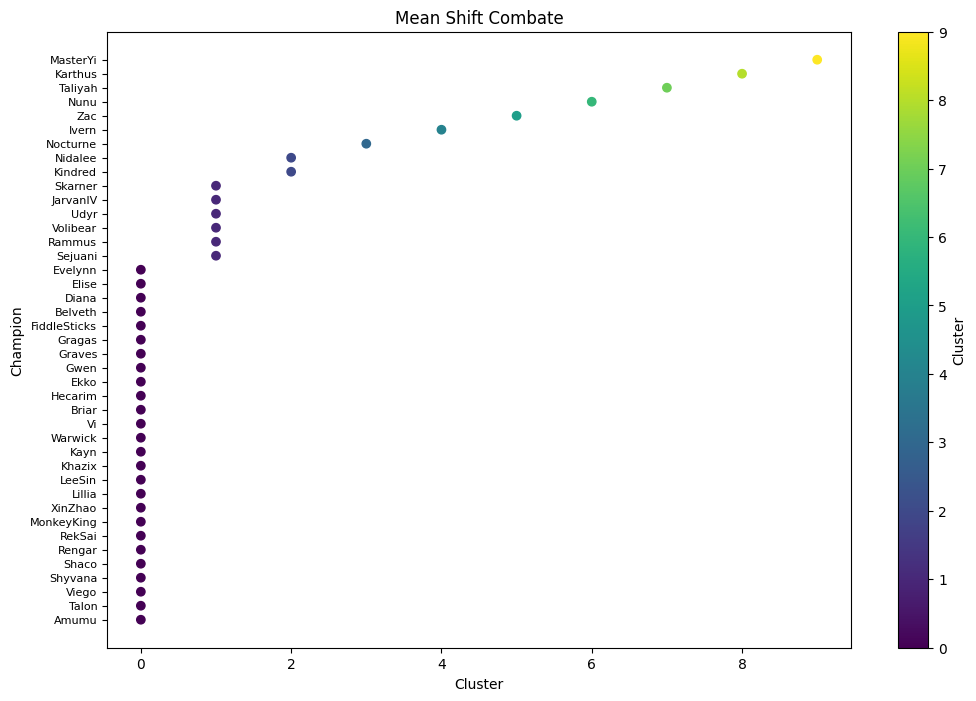

In [ ]:
# prompt: plote um grafico que mostre aonde cada campeão pertence (cluster em)  como nome dos campeões em ordem alfabetica no eixo y e os clusters no x scaled_data.to_csv('Combate_Kmeans.csv', index=False) e bote cores nos pontos baseados no eixo x
# scaled_data mostre o nome dos campeoes

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
#scaled_data = pd.read_csv('Combate_Kmeans.csv')

# Sort champions alphabetically
X = X.sort_values('Cluster')

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(X['Cluster'], X['champion'], c=X['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Mean Shift Combate')

# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


plt.show()

## Affinity Propagation


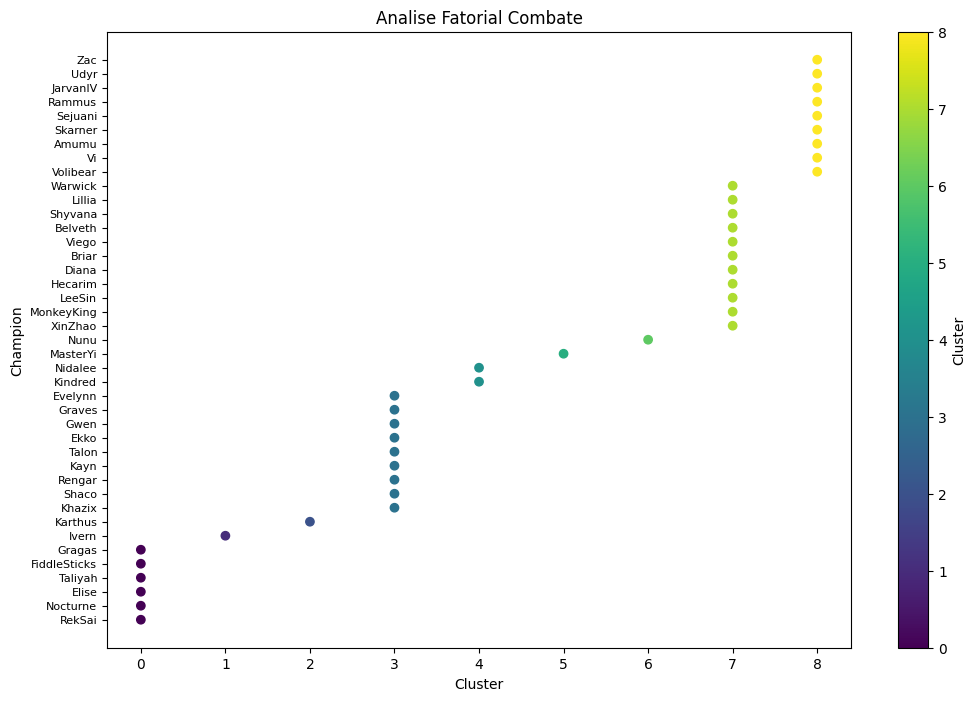

        highestCrowdControlScore       timeCCingOthers       totalTimeCCDealt  \
                            mean count            mean count             mean   
Cluster                                                                         
0                       0.392488     1        0.266573     1         0.075792   
1                       0.003372     1        0.079709     1         0.040579   
2                       0.006457     9        0.059048     9         0.126213   
3                       0.000000     1        0.007400     1         0.052732   
4                       0.000463     2        0.016579     2         0.027145   
5                       0.049551    16        0.113783    16         0.128759   
6                       0.202253    11        0.255321    11         0.264497   

                assists          deaths        ... teamBaronKills        \
        count      mean count      mean count  ...           mean count   
Cluster                                

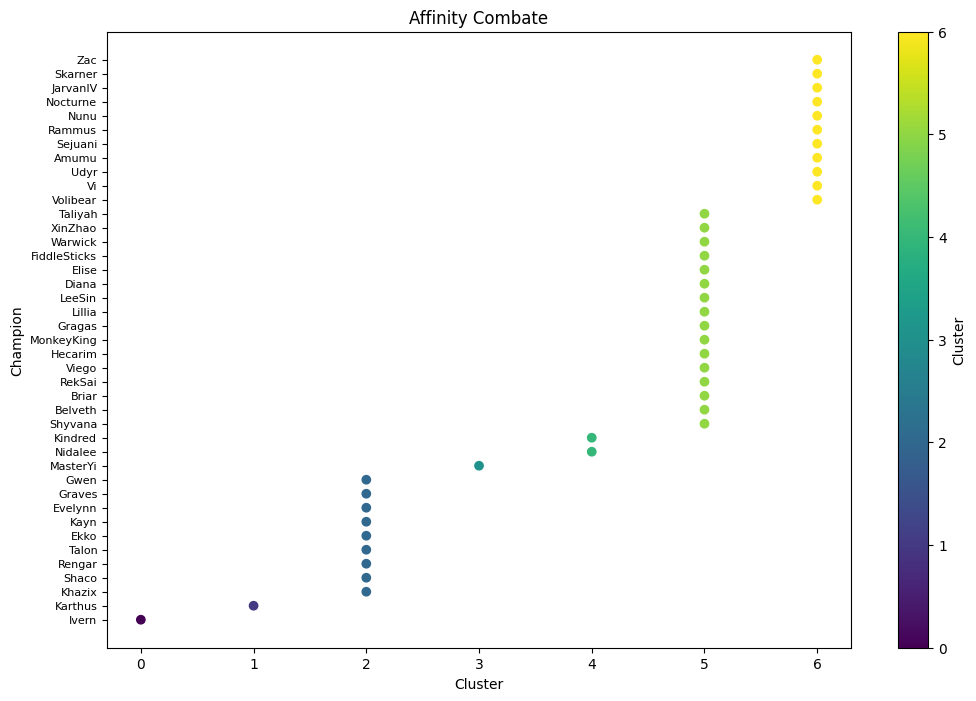

In [3]:
from sklearn.cluster import AffinityPropagation
from sklearn import datasets


X = pd.read_csv('/content/combate_df_scaled.csv')
X = X.select_dtypes(include=['number'])

# Ajustar o modelo de Affinity Propagation com parâmetros
af = AffinityPropagation(damping=0.89, max_iter=200, convergence_iter=20, copy=True, preference=None, affinity='euclidean', verbose=False)
af.fit(X)  # Usando a base de dados original

# Adicionar rótulos de cluster aos dados
labels = af.labels_
X['Cluster'] = labels
# Calcular estatísticas descritivas para cada cluster
cluster_stats = X.groupby('Cluster').agg(['mean', 'count'])

# Imprimir as estatísticas descritivas
print(cluster_stats)


X = pd.read_csv('/content/combate_df_scaled.csv')
X['Cluster'] = labels
X = X.sort_values('Cluster')
X.to_csv('descarte.csv', index=False)
# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(X['Cluster'], X['champion'], c=X['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Affinity Combate')

# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


# Clusterização Ritmo de Jogo


## mais uma mexida nas variaveis e normalização

In [23]:
pre_scaled = pd.read_csv('/content/df_ritmo.csv')

pre_scaled = pre_scaled[pre_scaled['alliedJungleMonsterKills'] != 0]
pre_scaled['enemy_ally_ratio'] = pre_scaled['enemyJungleMonsterKills'] / pre_scaled['alliedJungleMonsterKills']
pre_scaled['monster_minion_ratio'] = (pre_scaled['neutralMinionsKilled'])/(pre_scaled['alliedJungleMonsterKills'] + pre_scaled['enemyJungleMonsterKills'])
pre_scaled['gpm_per_Alliedjg'] = pre_scaled['goldPerMinute'] / pre_scaled['alliedJungleMonsterKills']

In [24]:
pre_scaled = pre_scaled.drop(columns=['alliedJungleMonsterKills', 'enemyJungleMonsterKills', 'neutralMinionsKilled'])

In [25]:

pre_scaled = pre_scaled.replace({True: 1, False: 0})

<ipython-input-25-dbe6df70f121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pre_scaled = pre_scaled.replace({True: 1, False: 0})


In [26]:
pre_scaled = pre_scaled.drop(columns=['Unnamed: 0'], errors='ignore')

In [27]:
pre_scaled

champion  takedownsBeforeJungleMinionSpawn  \
0       Graves                                 0   
1      Karthus                                 1   
2       LeeSin                                 0   
3         Gwen                                 0   
4       Lillia                                 0   
...        ...                               ...   
50883     Ekko                                 0   
50884   LeeSin                                 1   
50885   Khazix                                 0   
50886    Viego                                 0   
50887   LeeSin                                 0   

       maxCsAdvantageOnLaneOpponent  bountyLevel  champExperience  champLevel  \
0                              9.25            0             9271          12   
1                             41.00            4            15009          16   
2                             18.40            1            10727          13   
3                             70.60            1            15824          16   
4                             86.90            0            17122          17   
...                             ...          ...              ...         ...   
50883                         66.50            0            21694          18   
50884                          4.00            6            17575          17   
50885                         71.40            0            15905          16   
50886                         51.50            0            17725          17   
50887                          4.00            0            15717          16   

       firstBloodAssist  firstBloodKill  longestTimeSpentLiving  \
0                     0               0                     241   
1                     1               0                     328   
2                     0               0                     374   
3                     0               0                     254   
4                     1               0                     356   
...                 ...             ...                     ...   
50883                 1               0                     458   
50884                 1               0                     677   
50885                 0               0                     842   
50886                 0               0                     688   
50887                 1               0                     564   

       earliestBaron  ...  quickSoloKills  scuttleCrabKills  \
0                NaN  ...               0                 2   
1        1319.988825  ...               0                 3   
2                NaN  ...               0                 3   
3        1506.171745  ...               0                 6   
4        1437.366969  ...               0                 5   
...              ...  ...             ...               ...   
50883    1438.583015  ...               1                 4   
50884    1855.176510  ...               0                 2   
50885    1453.035891  ...               0                 7   
50886    2015.241078  ...               0                 2   
50887    1398.082256  ...               0                 2   

       teamElderDragonKills  teamRiftHeraldKills  visionScorePerMinute  \
0                         0                    0              0.854523   
1                         0                    1              1.193753   
2                         0                    1              1.246832   
3                         0                    0              1.122315   
4                         0                    1              1.015155   
...                     ...                  ...                   ...   
50883                     0                    1              0.536848   
50884                     0                    1              0.805576   
50885                     0                    0              0.947885   
50886                     0                    0              0.916088   
50887                     0     

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = pre_scaled.select_dtypes(include=['number']).columns
pre_scaled[numerical_cols] = scaler.fit_transform(pre_scaled[numerical_cols])

In [29]:
#Sim eu normalizei duas vezes, depois me pergunta pq q eu explico a logica por trás
pre_scaled = pre_scaled.fillna(1)
scaler = MinMaxScaler()
numerical_cols = pre_scaled.select_dtypes(include=['number']).columns
pre_scaled[numerical_cols] = scaler.fit_transform(pre_scaled[numerical_cols])

In [33]:
pre_scaled.to_csv('df_ritmo_scaled.csv', index=False)

##Normalize importante

In [34]:
scaled_data = pd.read_csv('/content/df_ritmo_scaled.csv')

In [35]:
scaled_data

champion  takedownsBeforeJungleMinionSpawn  \
0       Graves                          0.000000   
1      Karthus                          0.037037   
2       LeeSin                          0.000000   
3         Gwen                          0.000000   
4       Lillia                          0.000000   
...        ...                               ...   
50882     Ekko                          0.000000   
50883   LeeSin                          0.037037   
50884   Khazix                          0.000000   
50885    Viego                          0.000000   
50886   LeeSin                          0.000000   

       maxCsAdvantageOnLaneOpponent  bountyLevel  champExperience  champLevel  \
0                          0.037632     0.000000         0.244364    0.600000   
1                          0.166802     0.114286         0.407482    0.866667   
2                          0.074858     0.028571         0.285755    0.666667   
3                          0.287225     0.028571         0.430651    0.866667   
4                          0.353539     0.000000         0.467550    0.933333   
...                             ...          ...              ...         ...   
50882                      0.270545     0.000000         0.597521    1.000000   
50883                      0.016273     0.171429         0.480428    0.933333   
50884                      0.290480     0.000000         0.432953    0.866667   
50885                      0.209520     0.000000         0.484692    0.933333   
50886                      0.016273     0.000000         0.427609    0.866667   

       firstBloodAssist  firstBloodKill  longestTimeSpentLiving  \
0                   0.0             0.0                0.090432   
1                   1.0             0.0                0.123077   
2                   0.0             0.0                0.140338   
3                   0.0             0.0                0.095310   
4                   1.0             0.0                0.133583   
...                 ...             ...                     ...   
50882               1.0             0.0                0.171857   
50883               1.0             0.0                0.254034   
50884               0.0             0.0                0.315947   
50885               0.0             0.0                0.258161   
50886               1.0             0.0                0.211632   

       earliestBaron  ...  quickSoloKills  scuttleCrabKills  \
0           1.000000  ...           0.000          0.142857   
1           0.059330  ...           0.000          0.214286   
2           1.000000  ...           0.000          0.214286   
3           0.159745  ...           0.000          0.428571   
4           0.122636  ...           0.000          0.357143   
...              ...  ...             ...               ...   
50882       0.123292  ...           0.125          0.285714   
50883       0.347975  ...           0.000          0.142857   
50884       0.131087  ...           0.000          0.500000   
50885       0.434303  ...           0.000          0.142857   
50886       0.101449  ...           0.000          0.142857   

       teamElderDragonKills  teamRiftHeraldKills  visionScorePerMinute  \
0                       0.0                  0.0              0.182091   
1                       0.0                  0.5              0.254378   
2                       0.0                  0.5              0.265689   
3                       0.0                  0.0              0.239155   
4                       0.0                  0.5              0.216320   
...                     ...                  ...                   ...   
50882                   0.0                  0.5              0.114397   
50883                   0.0                  0.5              0.171661   
50884                   0.0                  0.0              0.201986   
50885                   0.0                  0.0              0.195210   
50886                   0.0     

In [36]:
scaled_data = scaled_data.groupby('champion').mean()

scaled_data

takedownsBeforeJungleMinionSpawn  maxCsAdvantageOnLaneOpponent  \
champion                                                                       
Amumu                                 0.003838                      0.075982   
Belveth                               0.003543                      0.152796   
Briar                                 0.003796                      0.090126   
Diana                                 0.002340                      0.192789   
Ekko                                  0.003682                      0.125023   
Elise                                 0.003994                      0.057109   
Evelynn                               0.003138                      0.086676   
FiddleSticks                          0.001361                      0.078418   
Gragas                                0.003576                      0.071853   
Graves                                0.005581                      0.171009   
Gwen                                  0.002192                      0.176857   
Hecarim                               0.002348                      0.191796   
Ivern                                 0.004813                      0.051396   
JarvanIV                              0.004118                      0.072536   
Karthus                               0.005719                      0.209582   
Kayn                                  0.004041                      0.118123   
Khazix                                0.003269                      0.115367   
Kindred                               0.003126                      0.120845   
LeeSin                                0.004664                      0.073813   
Lillia                                0.002704                      0.156691   
MasterYi                              0.005154                      0.137932   
MonkeyKing                            0.003671                      0.090848   
Nidalee                               0.007641                      0.108450   
Nocturne                              0.003916                      0.111808   
Nunu                                  0.002477                      0.078382   
Rammus                                0.002058                      0.066977   
RekSai                                0.001198                      0.080120   
Rengar                                0.004526                      0.154203   
Sejuani                               0.002707                      0.071929   
Shaco                                 0.001287                      0.104367   
Shyvana                               0.002379                      0.197737   
Skarner                               0.002762                      0.055641   
Taliyah                               0.004093                      0.150954   
Talon                                 0.002731                      0.206305   
Udyr                                  0.003484                      0.163192   
Vi                                    0.002467                      0.082417   
Viego                                 0.003615                      0.111452   
Volibear                              0.002504                      0.090109   
Warwick                               0.003331                      0.092165   
XinZhao                               0.003660                      0.077264   
Zac                                   0.002167                      0.075147   

              bountyLevel  champExperience  champLevel  firstBloodAssist  \
champion                                                                   
Amumu            0.075977         0.332452    0.724288          0.151709   
Belveth          0.150916         0.329588    0.717226          0.085799   
Briar            0.128705         0.341667    0.731159          0.105590   
Diana            0.147200         0.359944    0.757204          0.081502   
Ekko             0.145589         0.348809    0.740854          0.121415   
Elise            0.156997         0.30969

##Cluster Hierarquico

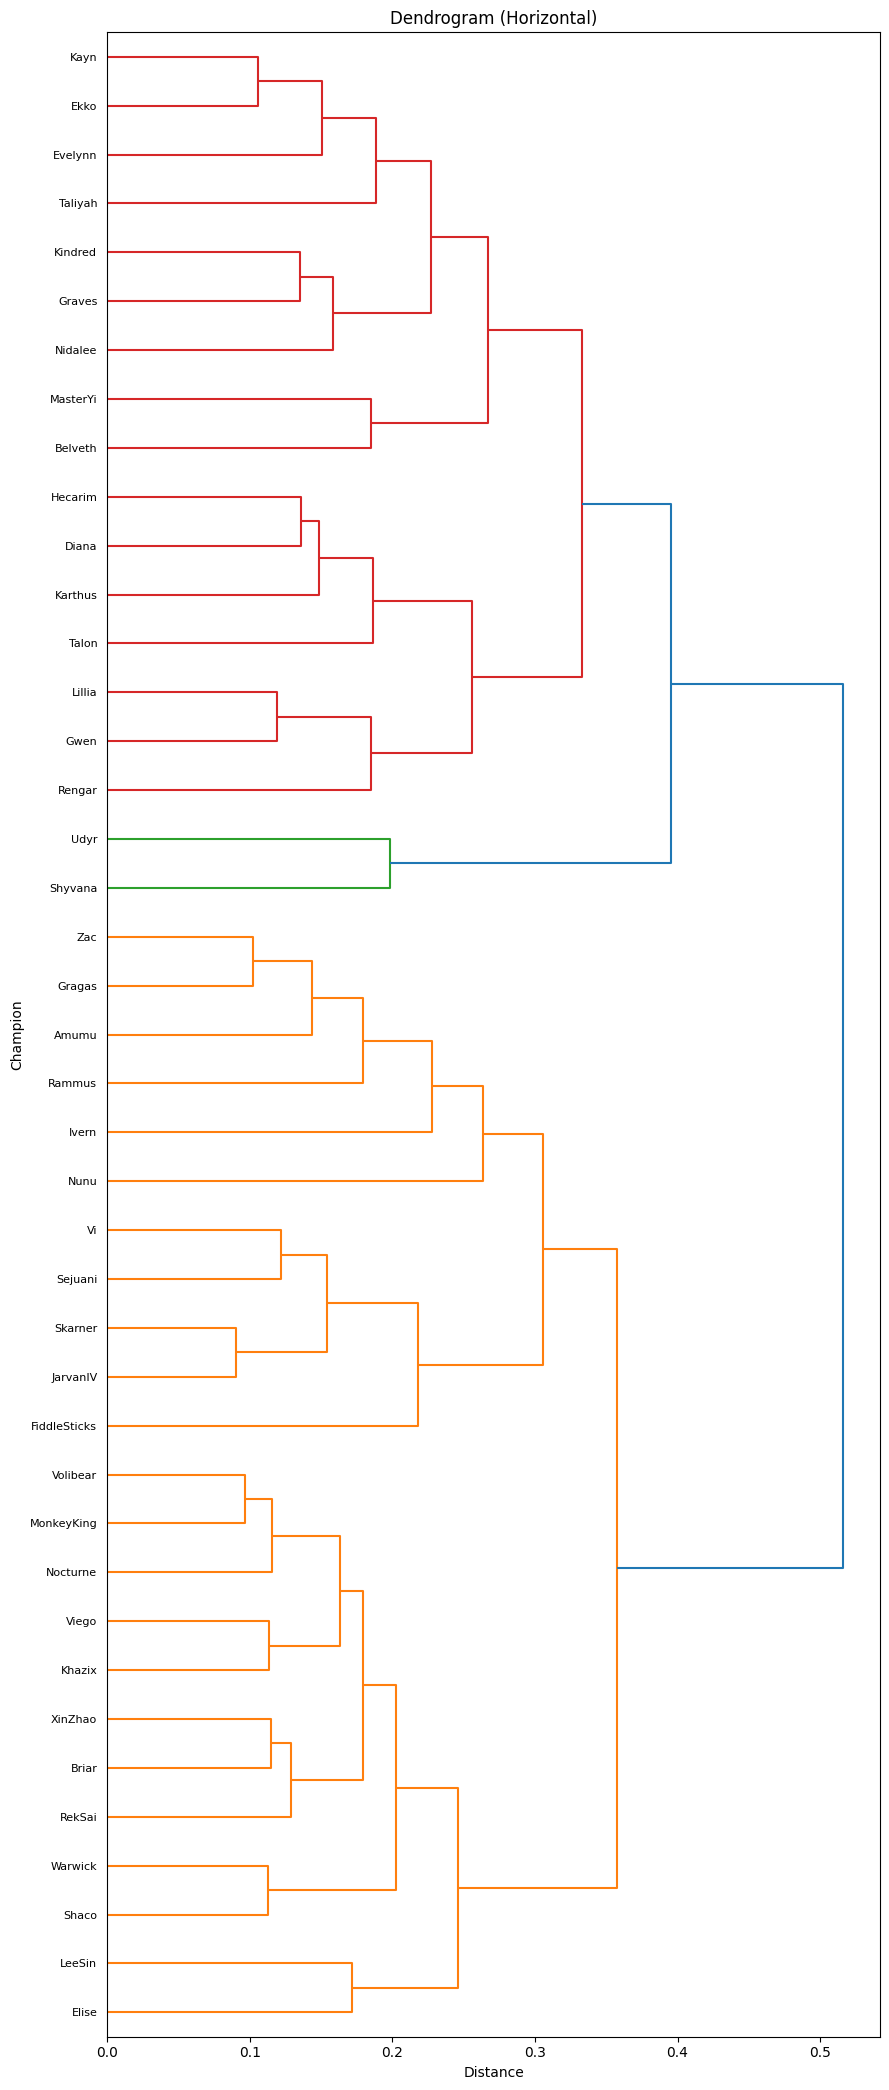

In [37]:
scaled_data['champion'] = scaled_data.index

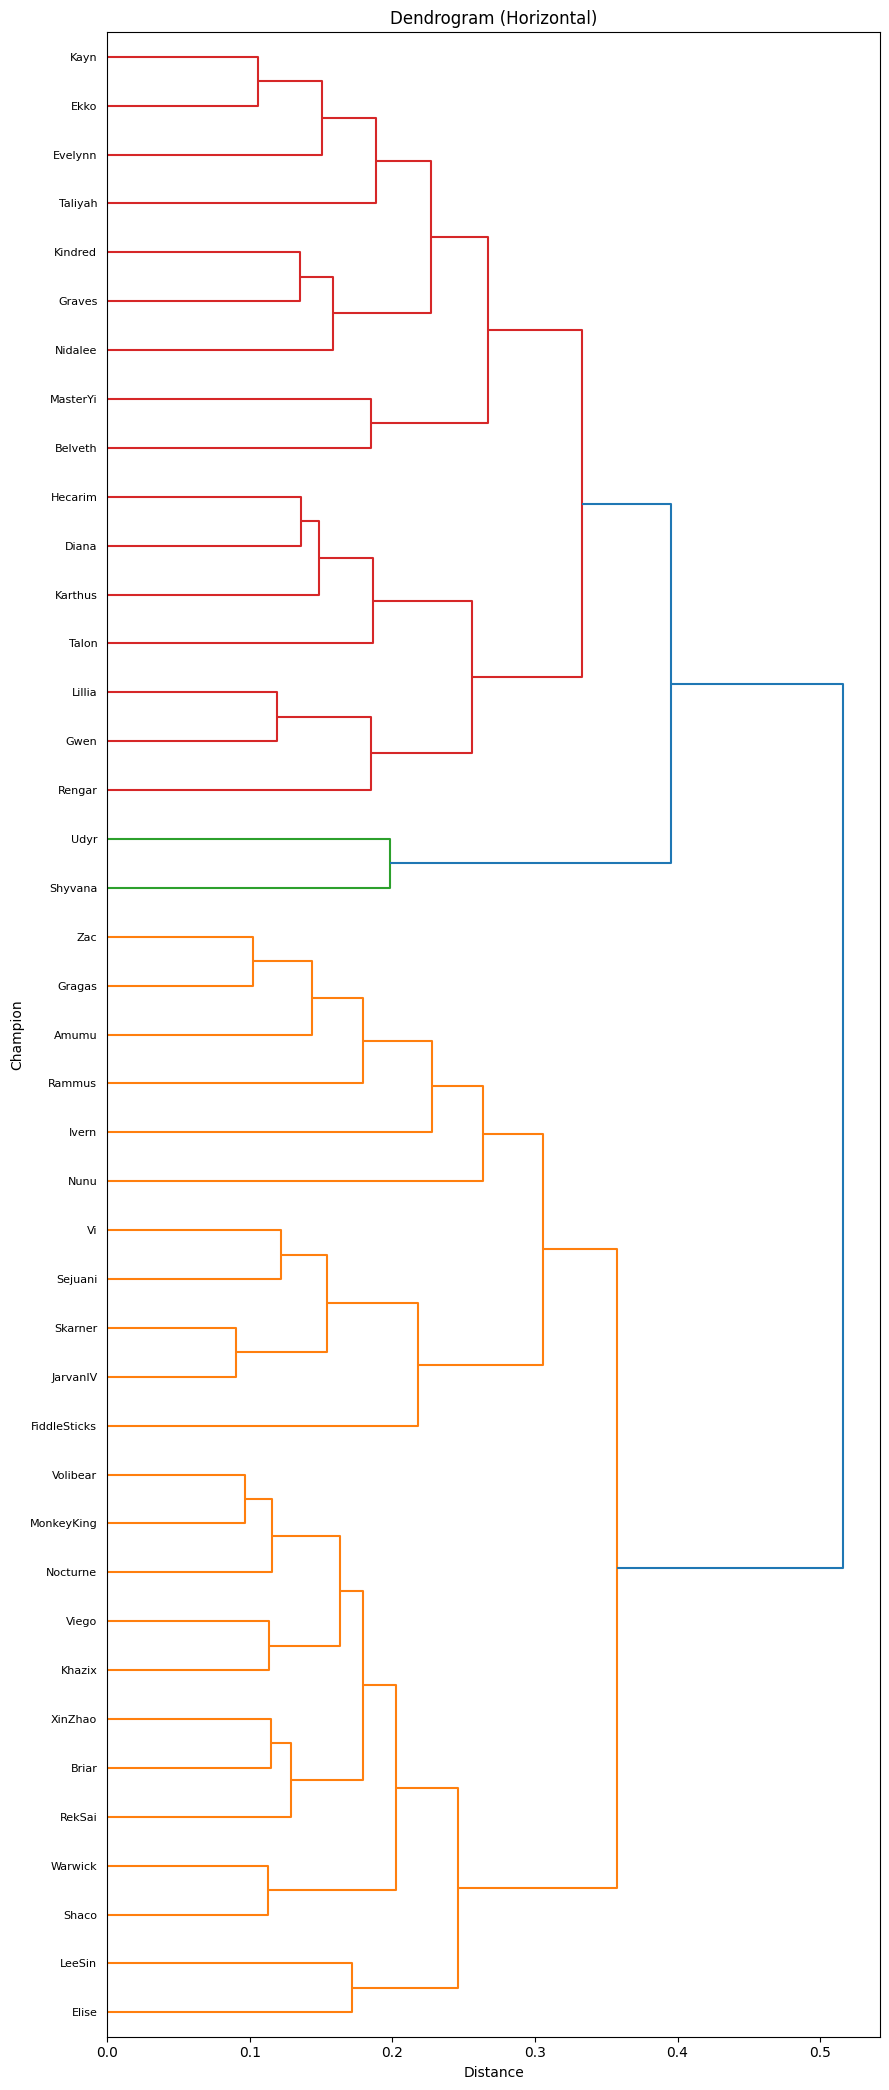

In [38]:
#codigo da aula do eric

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

scaled_data_numerical = scaled_data.select_dtypes(include=['number'])
# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data_numerical, method='complete', metric='euclidean')

# Plot the dendrogram horizontally
plt.figure(figsize=(9, 21))  # Adjust figure size as needed
dendrogram(linkage_matrix, orientation='right', labels=scaled_data['champion'].tolist())
plt.title('Dendrogram (Horizontal)')
plt.xlabel('Distance')
plt.ylabel('Champion')
plt.tight_layout()
plt.show()

In [39]:
# 7 se pá é melhor


chosen_num_clusters = 7

# Realizar o clustering hierárquico com o número escolhido de clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, chosen_num_clusters, criterion='maxclust')

In [40]:

# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

scaled_data_numerical = scaled_data.select_dtypes(include=['number'])
# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[scaled_data_numerical.columns].agg(['mean', 'count'])
print(grouped_summary)


        takedownsBeforeJungleMinionSpawn       maxCsAdvantageOnLaneOpponent  \
                                    mean count                         mean   
Cluster                                                                       
1                               0.003242    12                     0.091212   
2                               0.002683     5                     0.072188   
3                               0.003155     6                     0.069956   
4                               0.002931     2                     0.180464   
5                               0.003223     7                     0.184032   
6                               0.004348     2                     0.145364   
7                               0.004472     7                     0.125869   

              bountyLevel       champExperience       champLevel        ...  \
        count        mean count            mean count       mean count  ...   
Cluster                                            

In [41]:
scaled_data.to_csv('Ritmo_Hierarquico.csv', index=False)

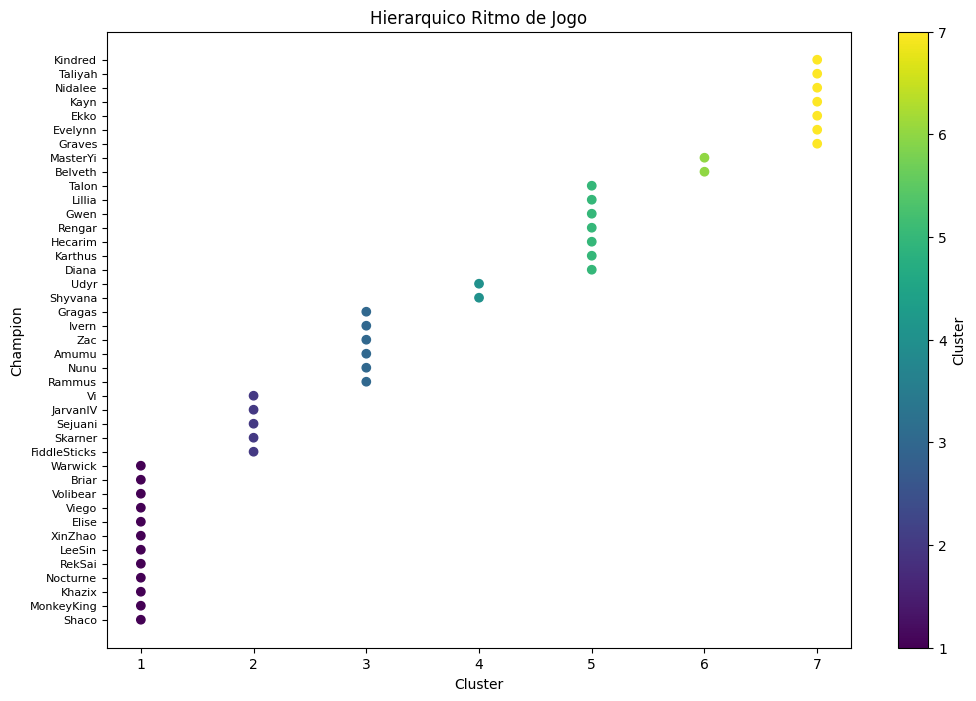

In [42]:
# prompt: plote um grafico que mostre aonde cada campeão pertence (cluster em)  como nome dos campeões em ordem alfabetica no eixo y e os clusters no x scaled_data.to_csv('Combate_Kmeans.csv', index=False) e bote cores nos pontos baseados no eixo x
# scaled_data mostre o nome dos campeoes

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
X = pd.read_csv('/content/Ritmo_Hierarquico.csv')

# Sort champions alphabetically
X = X.sort_values('Cluster')

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(X['Cluster'], X['champion'], c=X['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Hierarquico Ritmo de Jogo')

# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


plt.show()

## Kmeans

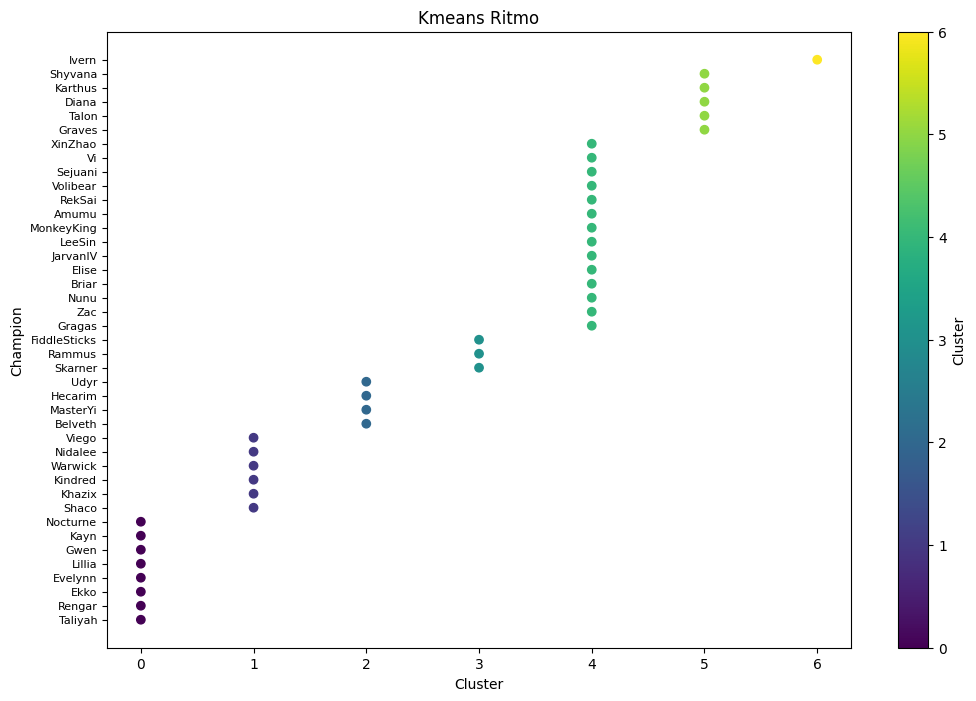

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

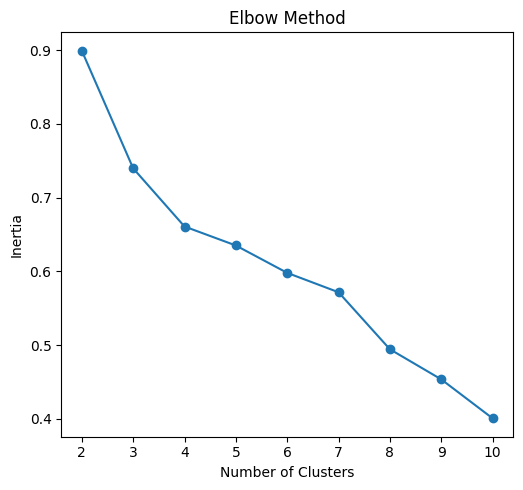

In [ ]:
# Plotar o gráfico Elbow para ajudar a escolher o número de clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()

In [ ]:
# Escolher o número de clusters com base na análise dos gráficos acima
chosen_num_clusters = 7

# Realizar a clusterização com o número escolhido de clusters
kmeans = KMeans(n_clusters=chosen_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
quantitative_data = scaled_data.select_dtypes(include=['number'])
quantitative_data

takedownsBeforeJungleMinionSpawn  maxCsAdvantageOnLaneOpponent  \
champion                                                                       
Amumu                                 0.003838                      0.075982   
Belveth                               0.003543                      0.152796   
Briar                                 0.003796                      0.090126   
Diana                                 0.002340                      0.192789   
Ekko                                  0.003682                      0.125023   
Elise                                 0.003994                      0.057109   
Evelynn                               0.003138                      0.086676   
FiddleSticks                          0.001361                      0.078418   
Gragas                                0.003576                      0.071853   
Graves                                0.005581                      0.171009   
Gwen                                  0.002192                      0.176857   
Hecarim                               0.002348                      0.191796   
Ivern                                 0.004813                      0.051396   
JarvanIV                              0.004118                      0.072536   
Karthus                               0.005719                      0.209582   
Kayn                                  0.004041                      0.118123   
Khazix                                0.003269                      0.115367   
Kindred                               0.003126                      0.120845   
LeeSin                                0.004664                      0.073813   
Lillia                                0.002704                      0.156691   
MasterYi                              0.005154                      0.137932   
MonkeyKing                            0.003671                      0.090848   
Nidalee                               0.007641                      0.108450   
Nocturne                              0.003916                      0.111808   
Nunu                                  0.002477                      0.078382   
Rammus                                0.002058                      0.066977   
RekSai                                0.001198                      0.080120   
Rengar                                0.004526                      0.154203   
Sejuani                               0.002707                      0.071929   
Shaco                                 0.001287                      0.104367   
Shyvana                               0.002379                      0.197737   
Skarner                               0.002762                      0.055641   
Taliyah                               0.004093                      0.150954   
Talon                                 0.002731                      0.206305   
Udyr                                  0.003484                      0.163192   
Vi                                    0.002467                      0.082417   
Viego                                 0.003615                      0.111452   
Volibear                              0.002504                      0.090109   
Warwick                               0.003331                      0.092165   
XinZhao                               0.003660                      0.077264   
Zac                                   0.002167                      0.075147   

              bountyLevel  champExperience  champLevel  firstBloodAssist  \
champion                                                                   
Amumu            0.075977         0.332452    0.724288          0.151709   
Belveth          0.150916         0.329588    0.717226          0.085799   
Briar            0.128705         0.341667    0.731159          0.105590   
Diana            0.147200         0.359944    0.757204          0.081502   
Ekko             0.145589         0.348809    0.740854          0.121415   
Elise            0.156997         0.30969

In [ ]:
# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data.to_excel('ritmo_kmeans.xlsx', index=False)


# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[quantitative_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        takedownsBeforeJungleMinionSpawn       maxCsAdvantageOnLaneOpponent  \
                                    mean count                         mean   
Cluster                                                                       
0                               0.003536     8                     0.135042   
1                               0.003712     6                     0.108774   
2                               0.003632     4                     0.161429   
3                               0.002060     3                     0.067012   
4                               0.003203    14                     0.077688   
5                               0.003750     5                     0.195484   
6                               0.004813     1                     0.051396   

              bountyLevel       champExperience       champLevel        ...  \
        count        mean count            mean count       mean count  ...   
Cluster                                            

In [ ]:
scaled_data = scaled_data.reset_index()

new_order = ['champion', 'Cluster'] + [col for col in scaled_data.columns if col not in ['champion', 'Cluster']]
scaled_data = scaled_data[new_order]

scaled_data.to_csv('Ritmo_Kmeans.csv', index=False)
scaled_data




champion  Cluster  takedownsBeforeJungleMinionSpawn  \
0          Amumu        4                          0.003838   
1        Belveth        2                          0.003543   
2          Briar        4                          0.003796   
3          Diana        5                          0.002340   
4           Ekko        0                          0.003682   
5          Elise        4                          0.003994   
6        Evelynn        0                          0.003138   
7   FiddleSticks        3                          0.001361   
8         Gragas        4                          0.003576   
9         Graves        5                          0.005581   
10          Gwen        0                          0.002192   
11       Hecarim        2                          0.002348   
12         Ivern        6                          0.004813   
13      JarvanIV        4                          0.004118   
14       Karthus        5                          0.005719   
15          Kayn        0                          0.004041   
16        Khazix        1                          0.003269   
17       Kindred        1                          0.003126   
18        LeeSin        4                          0.004664   
19        Lillia        0                          0.002704   
20      MasterYi        2                          0.005154   
21    MonkeyKing        4                          0.003671   
22       Nidalee        1                          0.007641   
23      Nocturne        0                          0.003916   
24          Nunu        4                          0.002477   
25        Rammus        3                          0.002058   
26        RekSai        4                          0.001198   
27        Rengar        0                          0.004526   
28       Sejuani        4                          0.002707   
29         Shaco        1                          0.001287   
30       Shyvana        5                          0.002379   
31       Skarner        3                          0.002762   
32       Taliyah        0                          0.004093   
33         Talon        5                          0.002731   
34          Udyr        2                          0.003484   
35            Vi        4                          0.002467   
36         Viego        1                          0.003615   
37      Volibear        4                          0.002504   
38       Warwick        1                          0.003331   
39       XinZhao        4                          0.003660   
40           Zac        4                          0.002167   

    maxCsAdvantageOnLaneOpponent  bountyLevel  champExperience  champLevel  \
0                       0.075982     0.075977         0.332452    0.724288   
1                       0.152796     0.150916         0.329588    0.717226   
2                       0.090126     0.128705         0.341667    0.731159   
3                       0.192789     0.147200         0.359944    0.757204   
4                       0.125023     0.145589         0.348809    0.740854   
5                       0.057109     0.156997         0.309691    0.688044   
6                       0.086676     0.141993         0.342948    0.735250   
7                       0.078418     0.089749         0.321856    0.709223   
8                       0.071853     0.125057         0.334895    0.723810   
9                       0.171009     0.176129         0.352596    0.741083   
10                      0.176857     0.109179         0.360361    0.755233   
11                      0.191796     0.142325         0.361061    0.758006   
12                      0.051396     0.053636         0.307032    0.685279   
13                      0.072536     0.101547         0.322466    0.706989   
14                      0.209582     0.158669         0.377533    0.779911   
15                      0.118123     0.142494         0.349898    0.742800   
16                      0.115367   

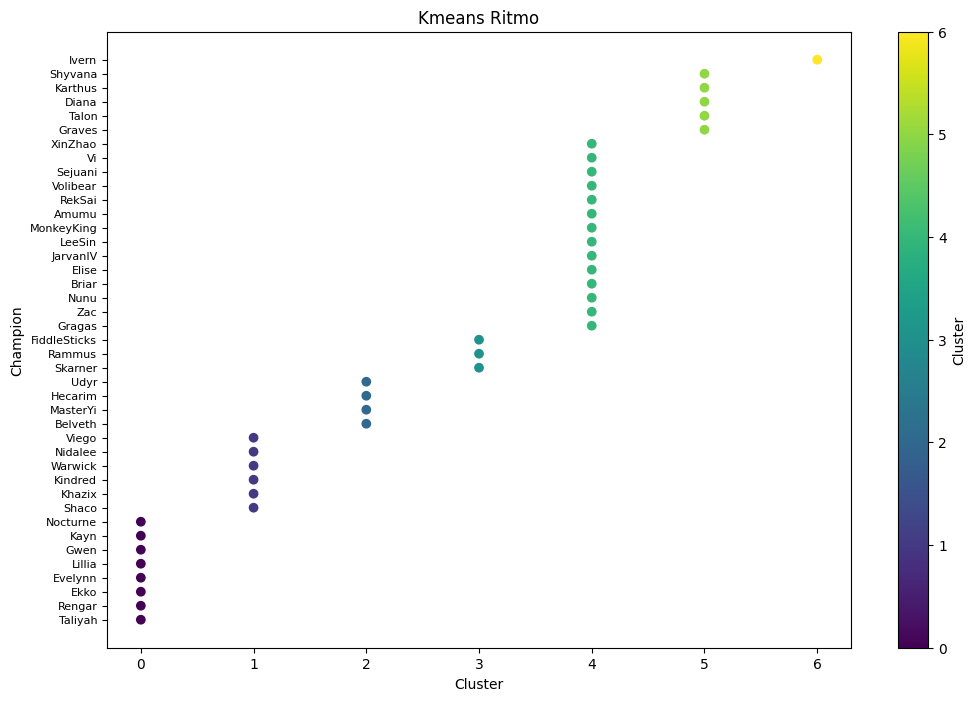

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort champions alphabetically
scaled_data = scaled_data.sort_values('Cluster')

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(scaled_data['Cluster'], scaled_data['champion'], c=scaled_data['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Kmeans Ritmo')



# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


plt.show()

In [ ]:
#comentario

## Affinity

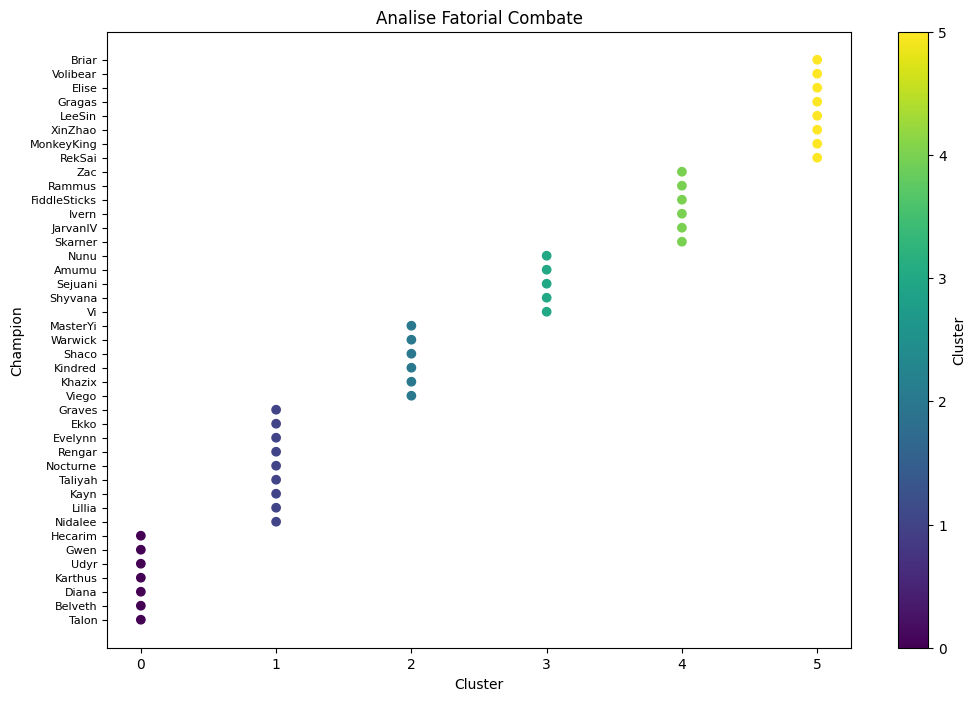

        takedownsBeforeJungleMinionSpawn       maxCsAdvantageOnLaneOpponent  \
                                    mean count                         mean   
Cluster                                                                       
0                               0.003194     7                     0.184760   
1                               0.004369     9                     0.131437   
2                               0.003297     6                     0.113688   
3                               0.002774     5                     0.101289   
4                               0.002880     6                     0.066686   
5                               0.003383     8                     0.078905   

              bountyLevel       champExperience       champLevel        ...  \
        count        mean count            mean count       mean count  ...   
Cluster                                                                 ...   
0           7    0.147596     7        0.362433    

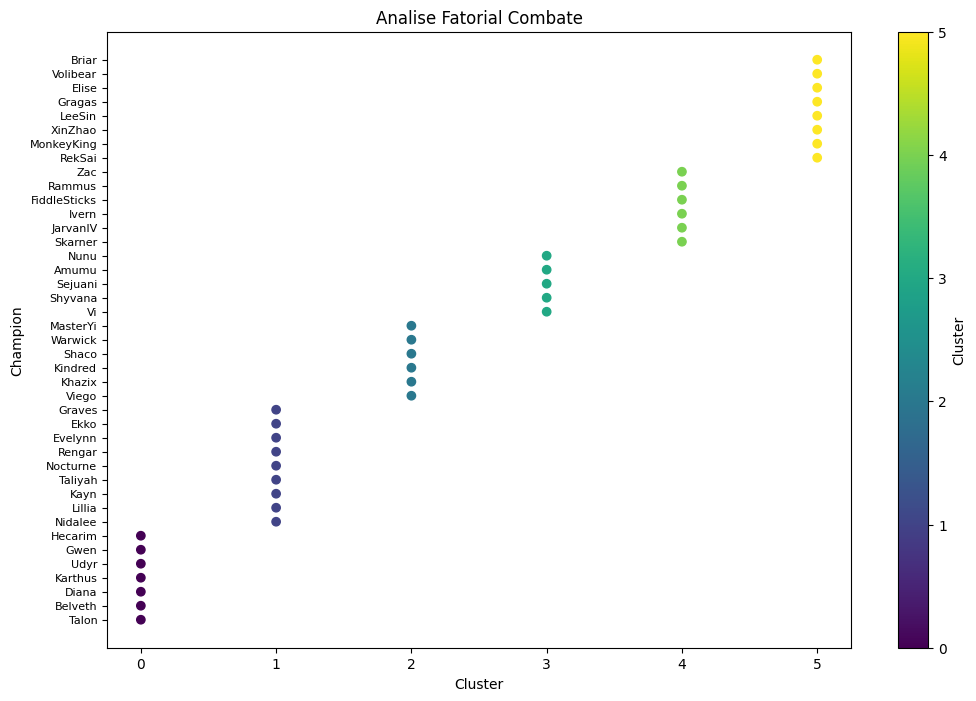

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import datasets


X = scaled_data
X = X.select_dtypes(include=['number'])

# Ajustar o modelo de Affinity Propagation com parâmetros
af = AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False)
af.fit(X)  # Usando a base de dados original

# Adicionar rótulos de cluster aos dados
labels = af.labels_
X['Cluster'] = labels
# Calcular estatísticas descritivas para cada cluster
cluster_stats = X.groupby('Cluster').agg(['mean', 'count'])

# Imprimir as estatísticas descritivas
print(cluster_stats)


X = scaled_data
X['Cluster'] = labels
X = X.sort_values('Cluster')
X = X.reset_index()
X.to_csv('descarte.csv', index=False)
# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(X['Cluster'], X['champion'], c=X['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Analise Fatorial Ritmo')

# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


# Clusterização Mapa (Ficou bem irrelevante, não salvei pq achei ruim)


## mais uma mexida nas variaveis e normalização

In [ ]:
pre_scaled = pd.read_csv('/content/df_mapa.csv')

<ipython-input-56-a557de58964e>:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  pre_scaled = pd.read_csv('/content/df_mapa.csv')


In [ ]:

pre_scaled = pre_scaled.replace({True: 1, False: 0})

<ipython-input-57-dbe6df70f121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pre_scaled = pre_scaled.replace({True: 1, False: 0})


In [ ]:
pre_scaled = pre_scaled.drop(columns=['Unnamed: 0'], errors='ignore')
pre_scaled = pre_scaled.drop(columns=['highestWardKills'], errors='ignore')

In [ ]:
pre_scaled = pre_scaled[:-1]

In [ ]:
pre_scaled

champion  visionScorePerMinute  wardsGuarded  wardTakedowns  \
0          Graves              0.854523           2.0            2.0   
1         Karthus              1.193753           1.0            7.0   
2          LeeSin              1.246832           0.0            4.0   
3            Gwen              1.122315           0.0            3.0   
4          Lillia              1.015155           0.0            1.0   
...           ...                   ...           ...            ...   
39651      Gragas              0.424487           0.0            4.0   
39652  MonkeyKing              0.580302           0.0            4.0   
39653     Warwick              0.542406           1.0            4.0   
39654  MonkeyKing              0.342214           1.0            1.0   
39655    JarvanIV              1.333272           0.0            4.0   

       detectorWardsPlaced  wardTakedownsBefore20M  baronKills  dragonKills  \
0                      2.0                     2.0         0.0          0.0   
1                      4.0                     4.0         0.0          3.0   
2                     11.0                     2.0         0.0          1.0   
3                      1.0                     1.0         1.0          2.0   
4                      2.0                     1.0         1.0          1.0   
...                    ...                     ...         ...          ...   
39651                  1.0                     2.0         0.0          2.0   
39652                  1.0                     3.0         1.0          3.0   
39653                  0.0                     3.0         0.0          2.0   
39654                  0.0                     0.0         0.0          3.0   
39655                  3.0                     4.0         1.0          1.0   

       consumablesPurchased  damageDealtToObjectives  ...  firstTowerKill  \
0                       4.0                  14503.0  ...             0.0   
1                       5.0                  35714.0  ...             0.0   
2                      16.0                  22805.0  ...             0.0   
3                       2.0                  36103.0  ...             0.0   
4                       4.0                  41140.0  ...             0.0   
...                     ...                      ...  ...             ...   
39651                   2.0                  28831.0  ...             0.0   
39652                   2.0                  35931.0  ...             0.0   
39653                   0.0                  40504.0  ...             0.0   
39654                   1.0                  38043.0  ...             0.0   
39655                   3.0                  11145.0  ...             0.0   

       inhibitorKills  inhibitorTakedowns  inhibitorsLost  \
0                 0.0                 0.0             1.0   
1                 0.0                 0.0             0.0   
2                 0.0                 0.0             1.0   
3                 0.0                 0.0             0.0   
4                 0.0                 0.0             0.0   
...               ...                 ...             ...   
39651             0.0                 0.0             1.0   
39652             0.0                 1.0             0.0   
39653             0.0                 0.0             1.0   
39654             0.0                 1.0             0.0   
39655             0.0                 0.0             1.0   

       kTurretsDestroyedBeforePlatesFall  turretPlatesTaken  \
0                                    0.0                0.0   
1                                    0.0                0.0   
2                                    0.0                0.0   
3                                    0.0                0.0   
4                                    0.0                0.0   
...                                  ...                ...   
39651                                0.0                0.0   
39652                            

In [ ]:

from sklearn.preprocessing import MinMaxScaler
pre_scaled = pre_scaled.fillna(0)
scaler = MinMaxScaler()
numerical_cols = pre_scaled.select_dtypes(include=['number']).columns
pre_scaled[numerical_cols] = scaler.fit_transform(pre_scaled[numerical_cols])

In [ ]:
pre_scaled.to_csv('df_mapa_scaled.csv', index=False)

##Normalize importante (Sempre rodar antes dos clusters)

In [ ]:
scaled_data = pd.read_csv('/content/df_mapa_scaled.csv')

In [ ]:
scaled_data

champion  visionScorePerMinute  wardsGuarded  wardTakedowns  \
0          Graves              0.182091         0.250       0.054054   
1         Karthus              0.254378         0.125       0.189189   
2          LeeSin              0.265689         0.000       0.108108   
3            Gwen              0.239155         0.000       0.081081   
4          Lillia              0.216320         0.000       0.027027   
...           ...                   ...           ...            ...   
39651      Gragas              0.090454         0.000       0.108108   
39652  MonkeyKing              0.123657         0.000       0.108108   
39653     Warwick              0.115582         0.125       0.108108   
39654  MonkeyKing              0.072923         0.125       0.027027   
39655    JarvanIV              0.284108         0.000       0.108108   

       detectorWardsPlaced  wardTakedownsBefore20M  baronKills  dragonKills  \
0                 0.068966                0.076923        0.00     0.000000   
1                 0.137931                0.153846        0.00     0.500000   
2                 0.379310                0.076923        0.00     0.166667   
3                 0.034483                0.038462        0.25     0.333333   
4                 0.068966                0.038462        0.25     0.166667   
...                    ...                     ...         ...          ...   
39651             0.034483                0.076923        0.00     0.333333   
39652             0.034483                0.115385        0.25     0.500000   
39653             0.000000                0.115385        0.00     0.333333   
39654             0.000000                0.000000        0.00     0.500000   
39655             0.103448                0.153846        0.25     0.166667   

       consumablesPurchased  damageDealtToObjectives  ...  firstTowerKill  \
0                  0.121212                 0.138180  ...             0.0   
1                  0.151515                 0.340273  ...             0.0   
2                  0.484848                 0.217279  ...             0.0   
3                  0.060606                 0.343979  ...             0.0   
4                  0.121212                 0.391970  ...             0.0   
...                     ...                      ...  ...             ...   
39651              0.060606                 0.274693  ...             0.0   
39652              0.060606                 0.342340  ...             0.0   
39653              0.000000                 0.385910  ...             0.0   
39654              0.030303                 0.362463  ...             0.0   
39655              0.090909                 0.106186  ...             0.0   

       inhibitorKills  inhibitorTakedowns  inhibitorsLost  \
0                 0.0            0.000000        0.111111   
1                 0.0            0.000000        0.000000   
2                 0.0            0.000000        0.111111   
3                 0.0            0.000000        0.000000   
4                 0.0            0.000000        0.000000   
...               ...                 ...             ...   
39651             0.0            0.000000        0.111111   
39652             0.0            0.166667        0.000000   
39653             0.0            0.000000        0.111111   
39654             0.0            0.166667        0.000000   
39655             0.0            0.000000        0.111111   

       kTurretsDestroyedBeforePlatesFall  turretPlatesTaken  \
0                                    0.0           0.000000   
1                                    0.0           0.000000   
2                                    0.0           0.000000   
3                                    0.0           0.000000   
4                                    0.0           0.000000   
...                                  ...                ...   
39651                                0.0           0.000000   
39652                            

In [ ]:
# prompt: scaled_data = média por champion dos status

# Group data by 'champion' and calculate the mean of other columns
scaled_data = scaled_data.groupby('champion').mean()

scaled_data

visionScorePerMinute  wardsGuarded  wardTakedowns  \
champion                                                          
Amumu                     0.176387      0.047440       0.091338   
Belveth                   0.171805      0.050448       0.112380   
Briar                     0.158020      0.049154       0.084108   
Diana                     0.178018      0.043649       0.094843   
Ekko                      0.181849      0.051236       0.120048   
Elise                     0.205114      0.040019       0.127653   
Evelynn                   0.156679      0.044041       0.044952   
FiddleSticks              0.349477      0.035691       0.103083   
Gragas                    0.176375      0.046675       0.094075   
Graves                    0.199612      0.044189       0.122653   
Gwen                      0.177509      0.050245       0.119161   
Hecarim                   0.144767      0.056437       0.061800   
Ivern                     0.210863      0.036129       0.126486   
JarvanIV                  0.183061      0.054280       0.108220   
Karthus                   0.161330      0.027549       0.072291   
Kayn                      0.160074      0.053027       0.081646   
Khazix                    0.187392      0.054472       0.101186   
Kindred                   0.217960      0.044760       0.164816   
LeeSin                    0.214609      0.082452       0.072388   
Lillia                    0.170760      0.050862       0.085648   
MasterYi                  0.159529      0.035404       0.098602   
MonkeyKing                0.186410      0.061350       0.117007   
Nidalee                   0.207785      0.053162       0.147341   
Nocturne                  0.176273      0.050899       0.095786   
Nunu                      0.156838      0.046371       0.070753   
Rammus                    0.156820      0.076823       0.069538   
RekSai                    0.189152      0.065308       0.106444   
Rengar                    0.177368      0.039887       0.119856   
Sejuani                   0.193536      0.068198       0.113820   
Shaco                     0.175465      0.060030       0.115319   
Shyvana                   0.198381      0.044898       0.149035   
Skarner                   0.176054      0.067221       0.094395   
Taliyah                   0.193866      0.032500       0.099033   
Talon                     0.171529      0.055042       0.087788   
Udyr                      0.163881      0.065734       0.094038   
Vi                        0.188540      0.057013       0.109744   
Viego                     0.195503      0.059790       0.121268   
Volibear                  0.164710      0.065686       0.099240   
Warwick                   0.183734      0.061361       0.097234   
XinZhao                   0.185652      0.049114       0.113722   
Zac                       0.163525      0.062642       0.093062   

              detectorWardsPlaced  wardTakedownsBefore20M  baronKills  \
champion                                                                
Amumu                    0.096843                0.073587    0.105120   
Belveth                  0.049521                0.096111    0.097814   
Briar                    0.043103                0.071114    0.097005   
Diana                    0.056850                0.079543    0.102162   
Ekko                     0.064191                0.098648    0.089286   
Elise                    0.088967                0.107888    0.090395   
Evelynn                  0.043535                0.042846    0.096287   
FiddleSticks             0.111004                0.084687    0.086653   
Gragas                   0.075818                0.075012    0.099359   
Graves                   0.079932                0.097889    0.096473   
Gwen                     0.042307                0.097339    0.092787   
Hecarim                  0.030530                0.048569    0.085758   
Ivern                    0.100957                0.116476    0.089032   
JarvanIV                 0.075725    

## Cluster Hierarquico


In [ ]:
scaled_data['champion'] = scaled_data.index

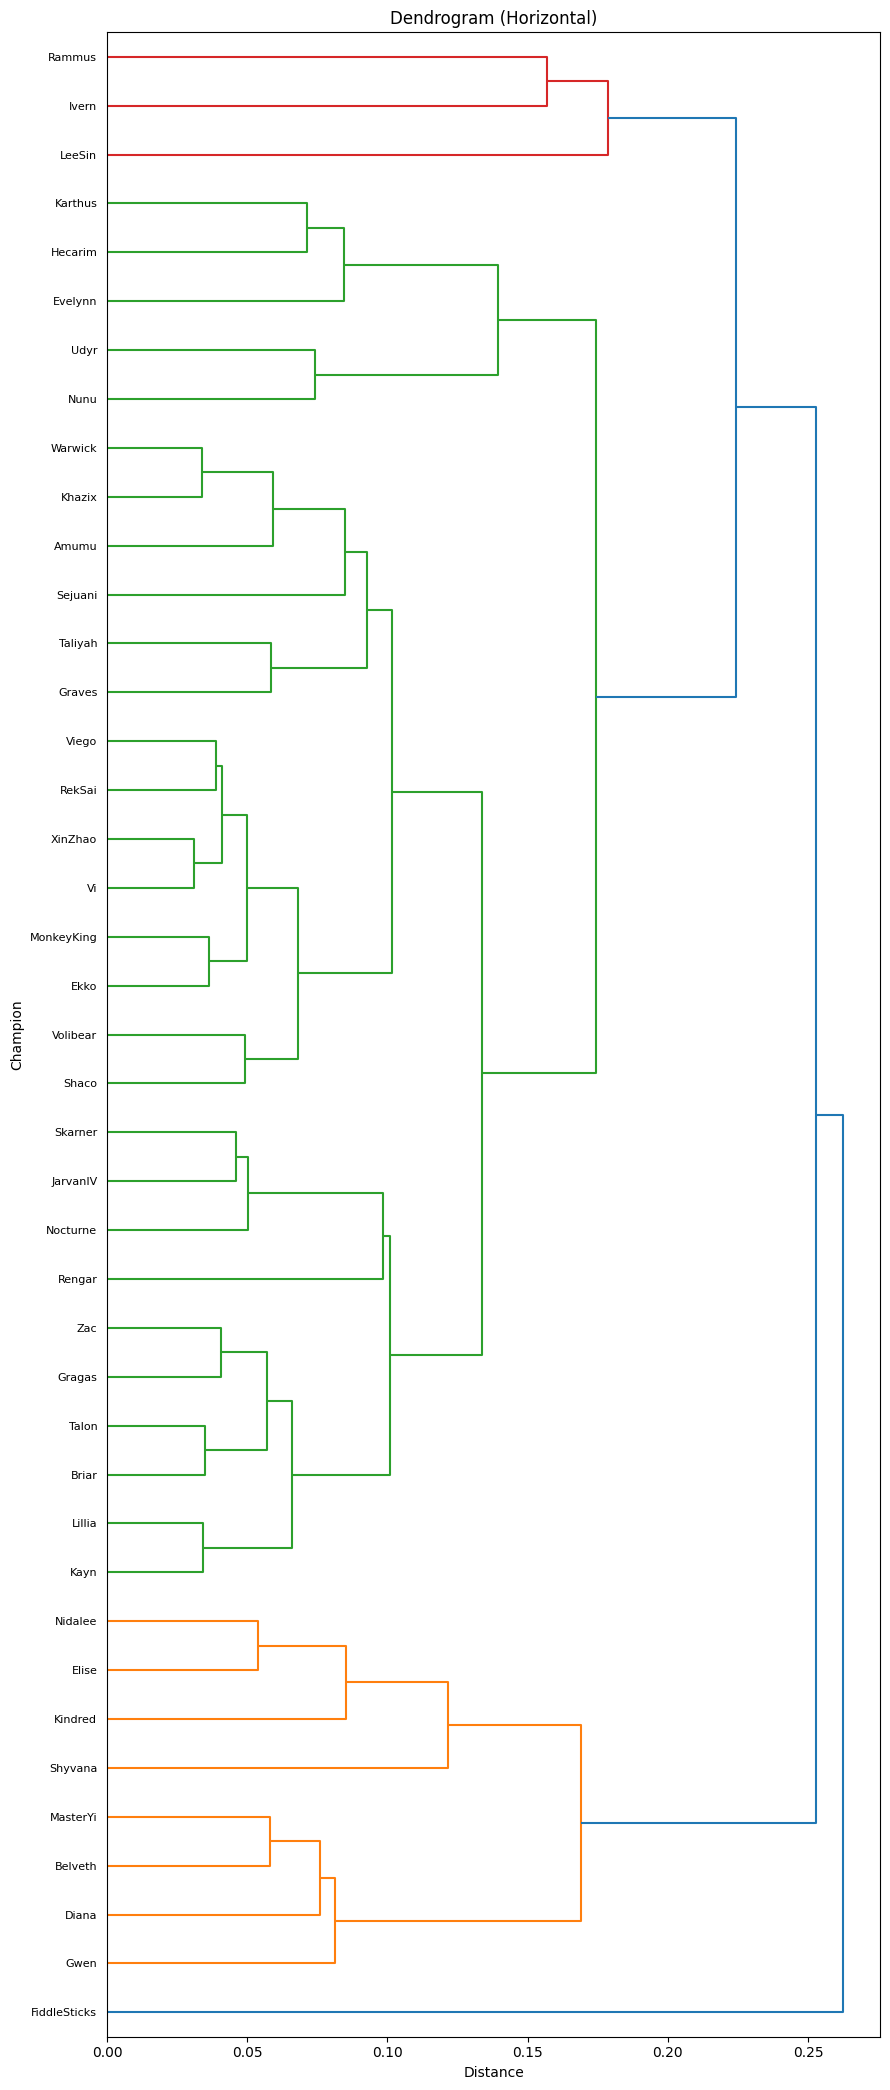

In [ ]:
#codigo da aula do eric

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

scaled_data_numerical = scaled_data.select_dtypes(include=['number'])
# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data_numerical, method='complete', metric='euclidean')

# Plot the dendrogram horizontally
plt.figure(figsize=(9, 21))  # Adjust figure size as needed
dendrogram(linkage_matrix, orientation='right', labels=scaled_data['champion'].tolist())
plt.title('Dendrogram (Horizontal)')
plt.xlabel('Distance')
plt.ylabel('Champion')
plt.tight_layout()
plt.show()

In [ ]:
# 6 cluster, sim estranho mas é oq tá tendo


chosen_num_clusters = 6

# Realizar o clustering hierárquico com o número escolhido de clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, chosen_num_clusters, criterion='maxclust')

In [ ]:
# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data.to_csv('scaled_data_atualizado.csv', index=False)

scaled_data_numerical = scaled_data.select_dtypes(include=['number'])

# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[scaled_data_numerical.columns].agg(['mean', 'count'])
print(grouped_summary)


        visionScorePerMinute       wardsGuarded       wardTakedowns        \
                        mean count         mean count          mean count   
Cluster                                                                     
1                   0.189513     8     0.045323     8      0.126729     8   
2                   0.179785    24     0.054474    24      0.103027    24   
3                   0.156699     5     0.048026     5      0.068767     5   
4                   0.183841     2     0.056476     2      0.098012     2   
5                   0.214609     1     0.082452     1      0.072388     1   
6                   0.349477     1     0.035691     1      0.103083     1   

        detectorWardsPlaced       wardTakedownsBefore20M        ...  \
                       mean count                   mean count  ...   
Cluster                                                         ...   
1                  0.059760     8               0.104916     8  ...   
2                  0.0

In [ ]:
scaled_data.to_csv('Ritmo_Hierarquico.csv', index=False)

## Kmeans


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

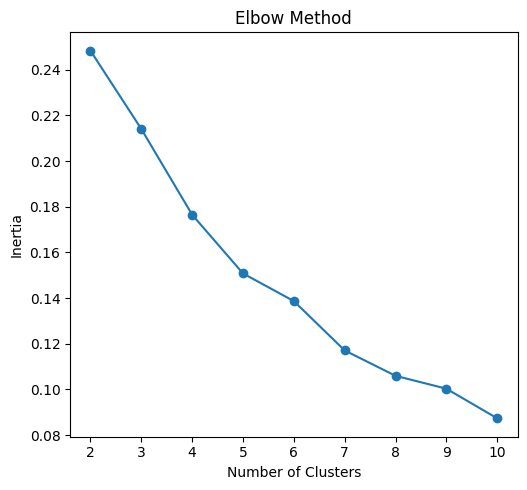

In [ ]:
# Plotar o gráfico Elbow para ajudar a escolher o número de clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()

In [ ]:
# Escolher o número de clusters com base na análise dos gráficos acima
chosen_num_clusters = 7

# Realizar a clusterização com o número escolhido de clusters
kmeans = KMeans(n_clusters=chosen_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
quantitative_data = scaled_data.select_dtypes(include=['number'])
quantitative_data

visionScorePerMinute  wardsGuarded  wardTakedowns  \
champion                                                          
Amumu                     0.176387      0.047440       0.091338   
Belveth                   0.171805      0.050448       0.112380   
Briar                     0.158020      0.049154       0.084108   
Diana                     0.178018      0.043649       0.094843   
Ekko                      0.181849      0.051236       0.120048   
Elise                     0.205114      0.040019       0.127653   
Evelynn                   0.156679      0.044041       0.044952   
FiddleSticks              0.349477      0.035691       0.103083   
Gragas                    0.176375      0.046675       0.094075   
Graves                    0.199612      0.044189       0.122653   
Gwen                      0.177509      0.050245       0.119161   
Hecarim                   0.144767      0.056437       0.061800   
Ivern                     0.210863      0.036129       0.126486   
JarvanIV                  0.183061      0.054280       0.108220   
Karthus                   0.161330      0.027549       0.072291   
Kayn                      0.160074      0.053027       0.081646   
Khazix                    0.187392      0.054472       0.101186   
Kindred                   0.217960      0.044760       0.164816   
LeeSin                    0.214609      0.082452       0.072388   
Lillia                    0.170760      0.050862       0.085648   
MasterYi                  0.159529      0.035404       0.098602   
MonkeyKing                0.186410      0.061350       0.117007   
Nidalee                   0.207785      0.053162       0.147341   
Nocturne                  0.176273      0.050899       0.095786   
Nunu                      0.156838      0.046371       0.070753   
Rammus                    0.156820      0.076823       0.069538   
RekSai                    0.189152      0.065308       0.106444   
Rengar                    0.177368      0.039887       0.119856   
Sejuani                   0.193536      0.068198       0.113820   
Shaco                     0.175465      0.060030       0.115319   
Shyvana                   0.198381      0.044898       0.149035   
Skarner                   0.176054      0.067221       0.094395   
Taliyah                   0.193866      0.032500       0.099033   
Talon                     0.171529      0.055042       0.087788   
Udyr                      0.163881      0.065734       0.094038   
Vi                        0.188540      0.057013       0.109744   
Viego                     0.195503      0.059790       0.121268   
Volibear                  0.164710      0.065686       0.099240   
Warwick                   0.183734      0.061361       0.097234   
XinZhao                   0.185652      0.049114       0.113722   
Zac                       0.163525      0.062642       0.093062   

              detectorWardsPlaced  wardTakedownsBefore20M  baronKills  \
champion                                                                
Amumu                    0.096843                0.073587    0.105120   
Belveth                  0.049521                0.096111    0.097814   
Briar                    0.043103                0.071114    0.097005   
Diana                    0.056850                0.079543    0.102162   
Ekko                     0.064191                0.098648    0.089286   
Elise                    0.088967                0.107888    0.090395   
Evelynn                  0.043535                0.042846    0.096287   
FiddleSticks             0.111004                0.084687    0.086653   
Gragas                   0.075818                0.075012    0.099359   
Graves                   0.079932                0.097889    0.096473   
Gwen                     0.042307                0.097339    0.092787   
Hecarim                  0.030530                0.048569    0.085758   
Ivern                    0.100957                0.116476    0.089032   
JarvanIV                 0.075725    

In [ ]:
# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data.to_excel('mapa_kmeans.xlsx', index=False)


# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[quantitative_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        visionScorePerMinute       wardsGuarded       wardTakedowns        \
                        mean count         mean count          mean count   
Cluster                                                                     
0                   0.172890     8     0.049290     8      0.096477     8   
1                   0.207770     8     0.051461     8      0.107253     8   
2                   0.156820     1     0.076823     1      0.069538     1   
3                   0.187740    11     0.050122    11      0.117088    11   
4                   0.172062     3     0.053660     3      0.093396     3   
5                   0.178303     7     0.054812     7      0.093801     7   
6                   0.171555     3     0.054117     3      0.092551     3   

        detectorWardsPlaced       wardTakedownsBefore20M        ...  \
                       mean count                   mean count  ...   
Cluster                                                         ...   
0               

In [ ]:
scaled_data = scaled_data.reset_index()

new_order = ['champion', 'Cluster'] + [col for col in scaled_data.columns if col not in ['champion', 'Cluster']]
scaled_data = scaled_data[new_order]

scaled_data.to_csv('Mapa_Kmeans.csv', index=False)
scaled_data




champion  Cluster  level_0  index  visionScorePerMinute  wardsGuarded  \
0            Zac        4        0     40              0.163525      0.062642   
1           Kayn        6        1     15              0.160074      0.053027   
2        Karthus        0        2     14              0.161330      0.027549   
3        Hecarim        1        3     11              0.144767      0.056437   
4        Evelynn        5        4      6              0.156679      0.044041   
5         Lillia        5        5     19              0.170760      0.050862   
6          Briar        0        6      2              0.158020      0.049154   
7         Rammus        2        7     25              0.156820      0.076823   
8       Volibear        3        8     37              0.164710      0.065686   
9           Nunu        5        9     24              0.156838      0.046371   
10         Talon        6       10     33              0.171529      0.055042   
11         Diana        0       11      3              0.178018      0.043649   
12         Shaco        3       12     29              0.175465      0.060030   
13       Warwick        3       13     38              0.183734      0.061361   
14        Khazix        0       14     16              0.187392      0.054472   
15          Udyr        0       15     34              0.163881      0.065734   
16  FiddleSticks        1       16      7              0.349477      0.035691   
17       XinZhao        5       17     39              0.185652      0.049114   
18      Nocturne        4       18     23              0.176273      0.050899   
19    MonkeyKing        0       19     21              0.186410      0.061350   
20      JarvanIV        6       20     13              0.183061      0.054280   
21       Taliyah        3       21     32              0.193866      0.032500   
22        RekSai        5       22     26              0.189152      0.065308   
23         Ivern        3       23     12              0.210863      0.036129   
24        Gragas        1       24      8              0.176375      0.046675   
25            Vi        0       25     35              0.188540      0.057013   
26       Skarner        3       26     31              0.176054      0.067221   
27        Rengar        3       27     27              0.177368      0.039887   
28         Amumu        4       28      0              0.176387      0.047440   
29        LeeSin        1       29     18              0.214609      0.082452   
30       Sejuani        5       30     28              0.193536      0.068198   
31       Nidalee        3       31     22              0.207785      0.053162   
32       Shyvana        3       32     30              0.198381      0.044898   
33       Kindred        1       33     17              0.217960      0.044760   
34        Graves        1       34      9              0.199612      0.044189   
35         Elise        3       35      5              0.205114      0.040019   
36         Viego        5       36     36              0.195503      0.059790   
37          Ekko        1       37      4              0.181849      0.051236   
38          Gwen        1       38     10              0.177509      0.050245   
39       Belveth        3       39      1              0.171805      0.050448   
40      MasterYi        0       40     20              0.159529      0.035404   

    wardTakedowns  detectorWardsPlaced  wardTakedownsBefore20M  baronKills  \
0        0.093062             0.062085                0.078624    0.098639   
1        0.081646             0.048780                0.063924    0.084495   
2        0.072291             0.053465                0.061987    0.096602   
3        0.061800             0.030530                0.048569    0.085758   
4        0.044952             0.043535                0.042846    0.096287   
5        0.085648             0.057372                0.069728    0.086422   
6        0.084108             0.043103                0.071

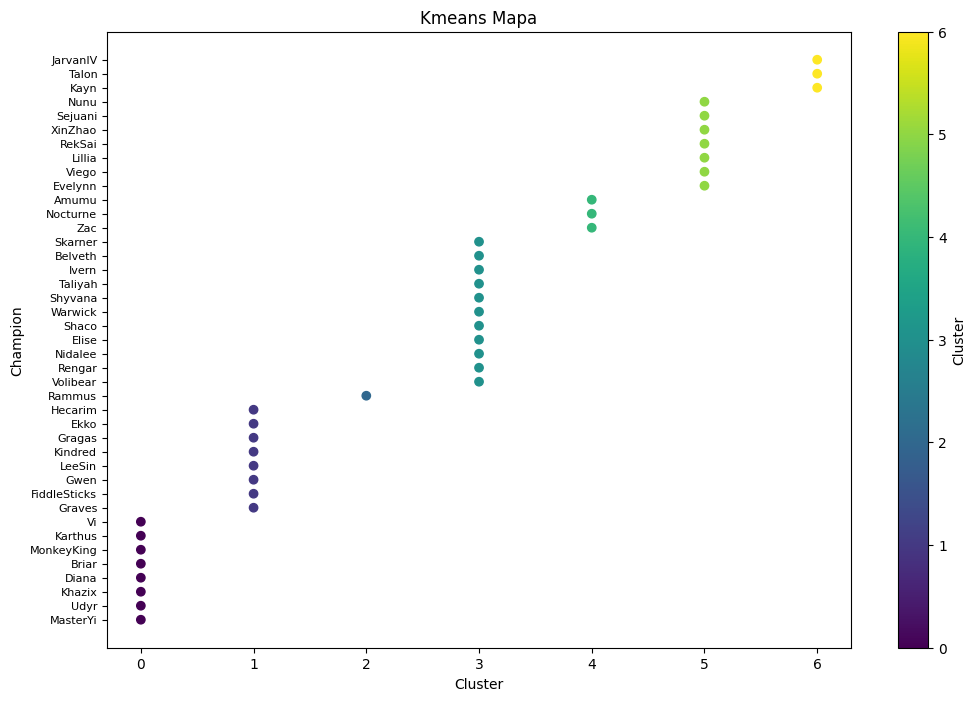

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort champions alphabetically
scaled_data = scaled_data.sort_values('Cluster')

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(scaled_data['Cluster'], scaled_data['champion'], c=scaled_data['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Kmeans Mapa')



# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


plt.show()

In [ ]:
#comentario

## Affinity


        visionScorePerMinute       wardsGuarded       wardTakedowns        \
                        mean count         mean count          mean count   
Cluster                                                                     
0                   0.171715     4     0.044937     4      0.106247     4   
1                   0.349477     1     0.035691     1      0.103083     1   
2                   0.208042     3     0.047607     3      0.153731     3   
3                   0.214609     1     0.082452     1      0.072388     1   
4                   0.173932     6     0.052696     6      0.097592     6   
5                   0.156820     1     0.076823     1      0.069538     1   
6                   0.162867    10     0.052713    10      0.080922    10   
7                   0.189470    15     0.052023    15      0.111723    15   

        detectorWardsPlaced       wardTakedownsBefore20M        ...  \
                       mean count                   mean count  ...   
Cluster   

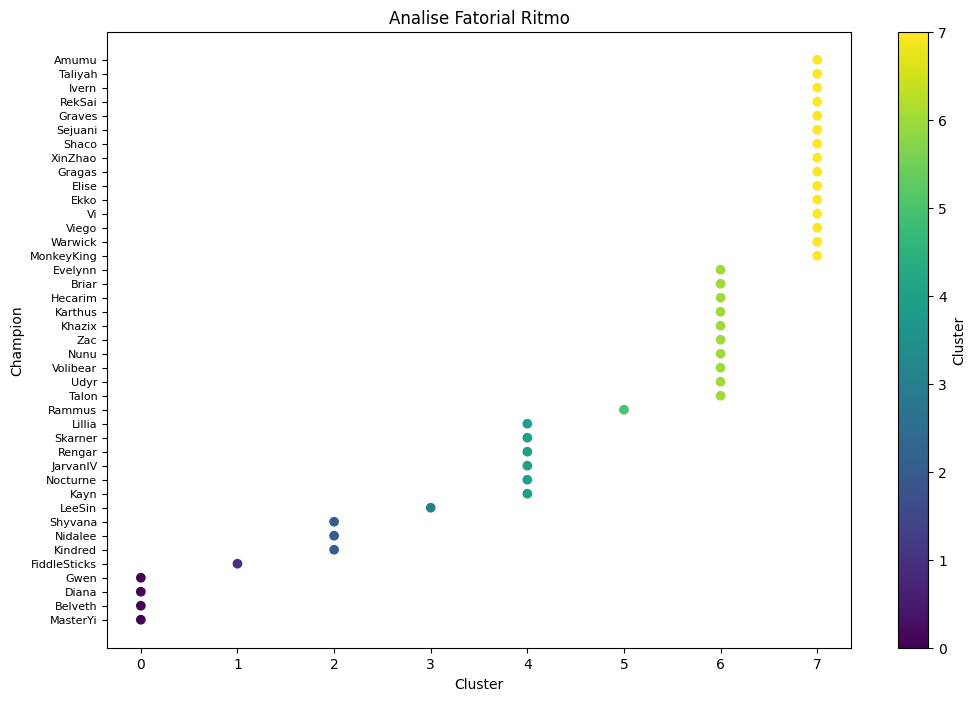

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import datasets


X = scaled_data
X = X.select_dtypes(include=['number'])

# Ajustar o modelo de Affinity Propagation com parâmetros
af = AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=15, copy=True, preference=None, affinity='euclidean', verbose=False)
af.fit(X)  # Usando a base de dados original

# Adicionar rótulos de cluster aos dados
labels = af.labels_
X['Cluster'] = labels
# Calcular estatísticas descritivas para cada cluster
cluster_stats = X.groupby('Cluster').agg(['mean', 'count'])

# Imprimir as estatísticas descritivas
print(cluster_stats)


X = scaled_data
X['Cluster'] = labels
X = X.sort_values('Cluster')
X = X.reset_index()
X.to_csv('descarte.csv', index=False)
# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(X['Cluster'], X['champion'], c=X['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Analise Fatorial Mapa')

# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


# Clusterização Comportamento



## mais uma mexida nas variaveis e normalização

In [ ]:
pre_scaled = pd.read_csv('/content/df_comportamento.csv')

In [ ]:
pre_scaled = pre_scaled.drop(columns=['Unnamed: 0'], errors='ignore')


In [ ]:
pre_scaled = pre_scaled[:-1]

In [ ]:
pre_scaled.to_csv('df_comportamento_scaled.csv', index=False)

##Normalize importante (Sempre rodar antes dos clusters)

In [ ]:
scaled_data = pd.read_csv('/content/df_comportamento_scaled.csv')

In [ ]:
scaled_data

champion  allInPings  assistMePings  commandPings  enemyMissingPings  \
0          Graves         0.0            4.0          21.0                5.0   
1         Karthus         0.0           36.0          22.0                1.0   
2          LeeSin         2.0            4.0           6.0                6.0   
3            Gwen         0.0           24.0          31.0                3.0   
4          Lillia         4.0           15.0          32.0                2.0   
...           ...         ...            ...           ...                ...   
39651      Gragas         1.0            2.0           5.0                0.0   
39652  MonkeyKing         0.0            0.0           2.0                0.0   
39653     Warwick         0.0            1.0           5.0                0.0   
39654  MonkeyKing         0.0            1.0           0.0                0.0   
39655    JarvanIV         1.0            5.0           7.0               19.0   

       enemyVisionPings  holdPings  getBackPings  fistBumpParticipation  \
0                   0.0        0.0           2.0                    0.0   
1                   2.0        0.0           0.0                    0.0   
2                   2.0        0.0           8.0                    0.0   
3                   0.0        0.0          10.0                    0.0   
4                   1.0        0.0           2.0                    0.0   
...                 ...        ...           ...                    ...   
39651               3.0        0.0           1.0                    0.0   
39652               3.0        0.0           6.0                    0.0   
39653               0.0        0.0           0.0                    0.0   
39654               4.0        0.0           0.0                    0.0   
39655              28.0        0.0           1.0                    0.0   

       pushPings  
0            0.0  
1            1.0  
2            0.0  
3            1.0  
4            0.0  
...          ...  
39651        0.0  
39652        0.0  
39653        0.0  
39654        0.0  
39655        2.0  

[39656 rows x 10 columns]

In [ ]:
scaled_data = scaled_data.groupby('champion').mean()

scaled_data

allInPings  assistMePings  commandPings  enemyMissingPings  \
champion                                                                   
Amumu           0.946988       9.255422      9.739759           6.121687   
Belveth         0.843049       4.770179      6.567265           6.445067   
Briar           1.187500       9.007812      7.315104           5.958333   
Diana           1.368649       7.630270      8.486486           7.838919   
Ekko            0.861538       6.458242      9.530769          10.097802   
Elise           1.589454       6.900188     10.123352           7.798493   
Evelynn         0.704663       7.411054      9.677029           6.243523   
FiddleSticks    1.313413       4.738380     10.221780           5.529880   
Gragas          1.493590       4.551282      8.208333           6.583333   
Graves          1.676561       6.443716     10.630301           8.074788   
Gwen            0.806723       6.245098      7.256303           5.936975   
Hecarim         1.634921       7.011464      7.499118           7.628748   
Ivern           1.095484       7.215484     10.009032           4.878710   
JarvanIV        1.343259       6.468983      9.607113           6.700579   
Karthus         1.295146       6.812621     10.670874           6.794175   
Kayn            1.899826       5.999129      8.732578           7.194251   
Khazix          0.910550       5.318043      8.669725           6.740826   
Kindred         0.762874       6.310180      7.455090           6.747305   
LeeSin          1.110096       5.933173      9.770192           7.383173   
Lillia          0.643103       5.962931      8.641379           6.041379   
MasterYi        1.513292       5.309816      9.165644           6.874233   
MonkeyKing      0.887526       5.652352      7.574642           7.024540   
Nidalee         1.498302       5.685908     10.084890           5.738540   
Nocturne        0.902552       6.245940      8.868910           7.062645   
Nunu            1.397022       6.107940      8.074442           5.982630   
Rammus          2.500000       5.557292     10.255208           6.604167   
RekSai          1.910150       5.690516      9.708819           7.653910   
Rengar          1.351759       6.748744      6.512563           7.233668   
Sejuani         2.103591       6.040055     11.722376           7.074586   
Shaco           0.629447       4.180830      7.370553           6.188735   
Shyvana         0.885714       5.420408      7.477551           6.155102   
Skarner         1.052545       4.807882      8.276683           6.591133   
Taliyah         1.638947       6.300000     12.011579          11.549474   
Talon           0.968321       4.598733      7.958817           6.582893   
Udyr            0.855333       4.982049      6.739176           6.639916   
Vi              1.167508       5.459132      9.261352           7.178607   
Viego           1.444515       5.777742      8.925702           7.383929   
Volibear        1.511111       5.962092      7.269281           6.763399   
Warwick         1.621094       5.657552      6.354167           5.860677   
XinZhao         1.431562       6.537842      8.784219           6.919485   
Zac             0.563492       5.248299      7.227891           6.167800   

              enemyVisionPings  holdPings  getBackPings  \
champion                                                  
Amumu                 7.175904   0.020482      4.703614   
Belveth               4.717489   0.001121      2.882287   
Briar                 1.924479   0.002604      2.976562   
Diana                 4.305946   0.001081      5.701622   
Ekko                  6.380220   0.000000      5.642857   
Elise                 4.310734   0.000000      4.828625   
Evelynn               4.763385   0.000000      5.017271   
FiddleSticks          3.543161   0.003984      4.559097   
Gragas                4.392628   0.000000      4.347756   
Graves                4.522359   0.000386      5.791827   
Gwen                  4.236695   0.00

In [ ]:
scaled_data.to_csv('Média_Comportamento.csv', index=False)

In [ ]:
# prompt: save scaled_data as excel

scaled_data.to_excel('Média_Comportamento.xlsx', index=True)

In [ ]:
scaled_data_sorted = scaled_data.sort_values('enemyMissingPings', ascending=False)

scaled_data_sorted

champion  Cluster  allInPings  assistMePings  commandPings  \
32       Taliyah        6    1.638947       6.300000     12.011579   
4           Ekko        6    0.861538       6.458242      9.530769   
9         Graves        6    1.676561       6.443716     10.630301   
3          Diana        3    1.368649       7.630270      8.486486   
5          Elise        6    1.589454       6.900188     10.123352   
26        RekSai        6    1.910150       5.690516      9.708819   
11       Hecarim        3    1.634921       7.011464      7.499118   
36         Viego        0    1.444515       5.777742      8.925702   
18        LeeSin        0    1.110096       5.933173      9.770192   
27        Rengar        3    1.351759       6.748744      6.512563   
15          Kayn        0    1.899826       5.999129      8.732578   
35            Vi        6    1.167508       5.459132      9.261352   
28       Sejuani        6    2.103591       6.040055     11.722376   
23      Nocturne        0    0.902552       6.245940      8.868910   
21    MonkeyKing        1    0.887526       5.652352      7.574642   
39       XinZhao        0    1.431562       6.537842      8.784219   
20      MasterYi        4    1.513292       5.309816      9.165644   
14       Karthus        6    1.295146       6.812621     10.670874   
37      Volibear        4    1.511111       5.962092      7.269281   
17       Kindred        1    0.762874       6.310180      7.455090   
16        Khazix        4    0.910550       5.318043      8.669725   
13      JarvanIV        0    1.343259       6.468983      9.607113   
34          Udyr        1    0.855333       4.982049      6.739176   
25        Rammus        6    2.500000       5.557292     10.255208   
31       Skarner        1    1.052545       4.807882      8.276683   
8         Gragas        4    1.493590       4.551282      8.208333   
33         Talon        4    0.968321       4.598733      7.958817   
1        Belveth        1    0.843049       4.770179      6.567265   
6        Evelynn        0    0.704663       7.411054      9.677029   
29         Shaco        4    0.629447       4.180830      7.370553   
40           Zac        1    0.563492       5.248299      7.227891   
30       Shyvana        1    0.885714       5.420408      7.477551   
0          Amumu        2    0.946988       9.255422      9.739759   
19        Lillia        1    0.643103       5.962931      8.641379   
24          Nunu        0    1.397022       6.107940      8.074442   
2          Briar        5    1.187500       9.007812      7.315104   
10          Gwen        1    0.806723       6.245098      7.256303   
38       Warwick        1    1.621094       5.657552      6.354167   
22       Nidalee        0    1.498302       5.685908     10.084890   
7   FiddleSticks        0    1.313413       4.738380     10.221780   
12         Ivern        0    1.095484       7.215484     10.009032   

    enemyMissingPings  enemyVisionPings  holdPings  getBackPings  \
32          11.549474          4.629474   0.000000      5.664211   
4           10.097802          6.380220   0.000000      5.642857   
9            8.074788          4.522359   0.000386      5.791827   
3            7.838919          4.305946   0.001081      5.701622   
5            7.798493          4.310734   0.000000      4.828625   
26           7.653910          6.449251   0.000000      7.582363   
11           7.628748          4.783069   0.000000      5.481481   
36           7.383929          4.880740   0.000000      4.619260   
18           7.383173          3.994231   0.001442      4.853365   
27           7.233668          5.286432   0.000000      4.874372   
15           7.194251          4.066202   0.000871      4.387631   
35           7.178607          3.955600   0.000000      6.136226   
28           7.074586          2.470994   0.000000      4.839779   
23           7.062645          3.450116   0.001160      4.916473   
21           7.024540          3.848671   0.000

## Cluster Hierarquico


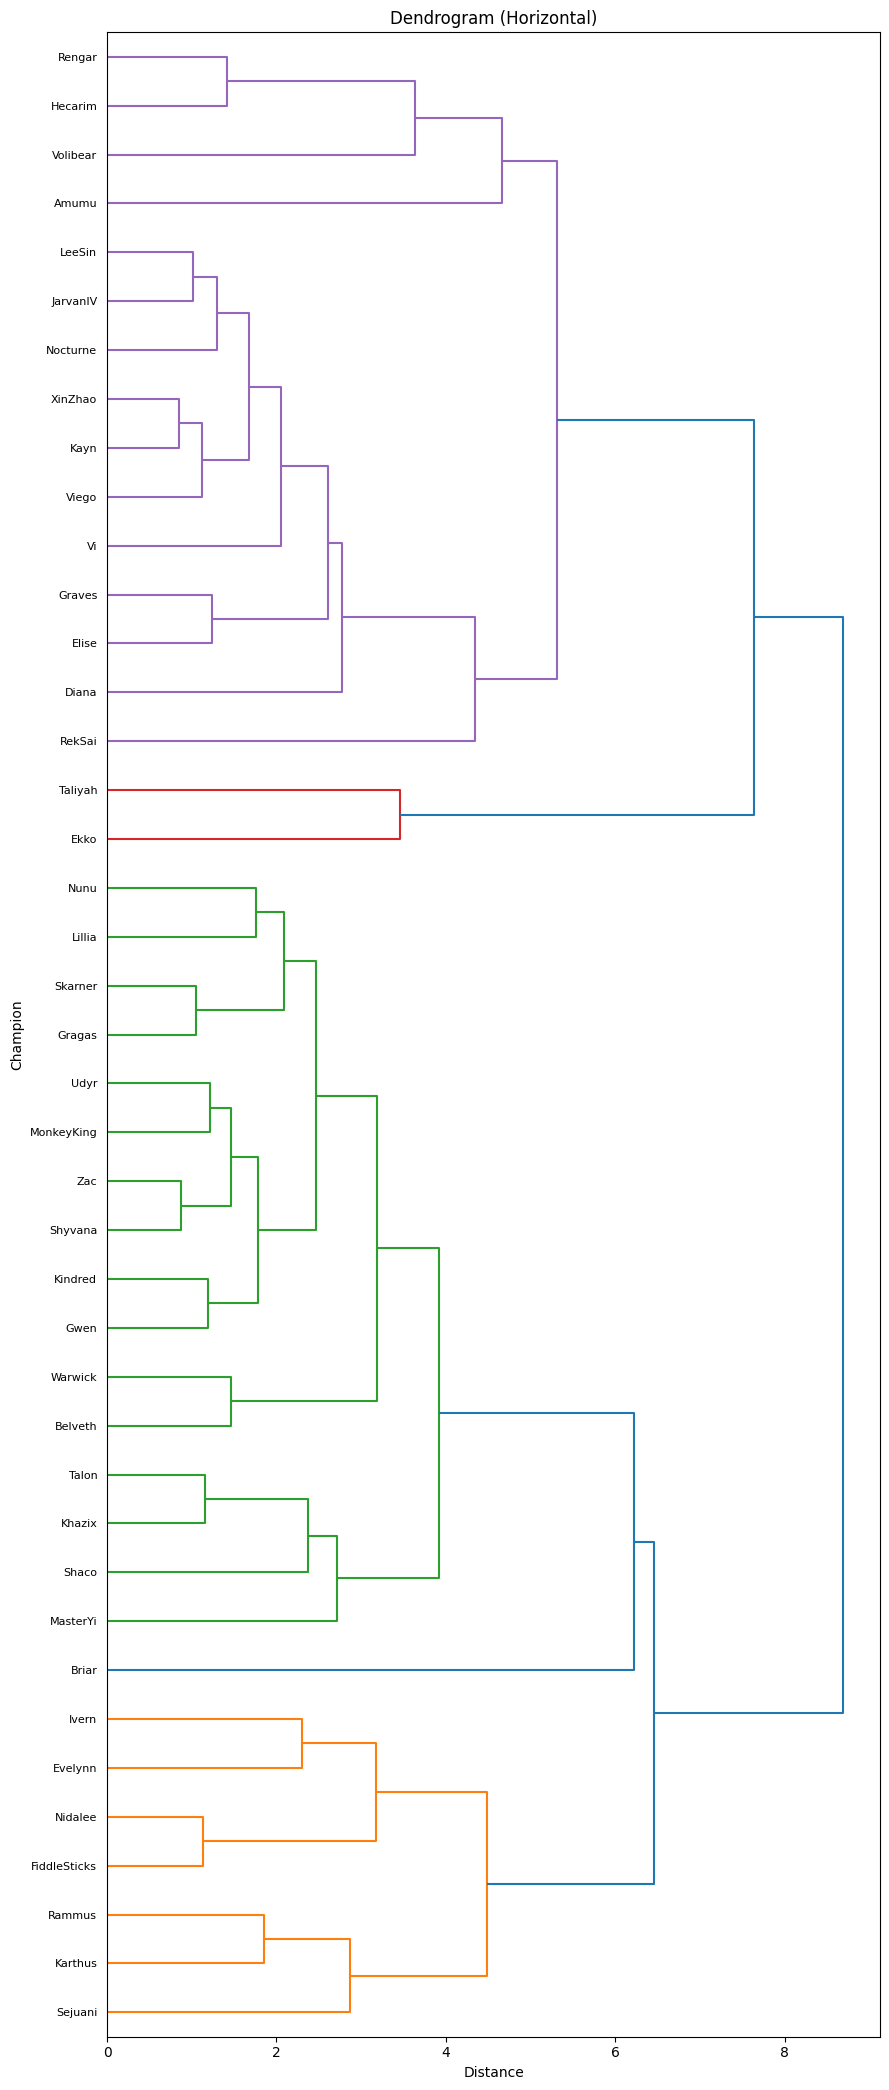

In [ ]:
scaled_data['champion'] = scaled_data.index

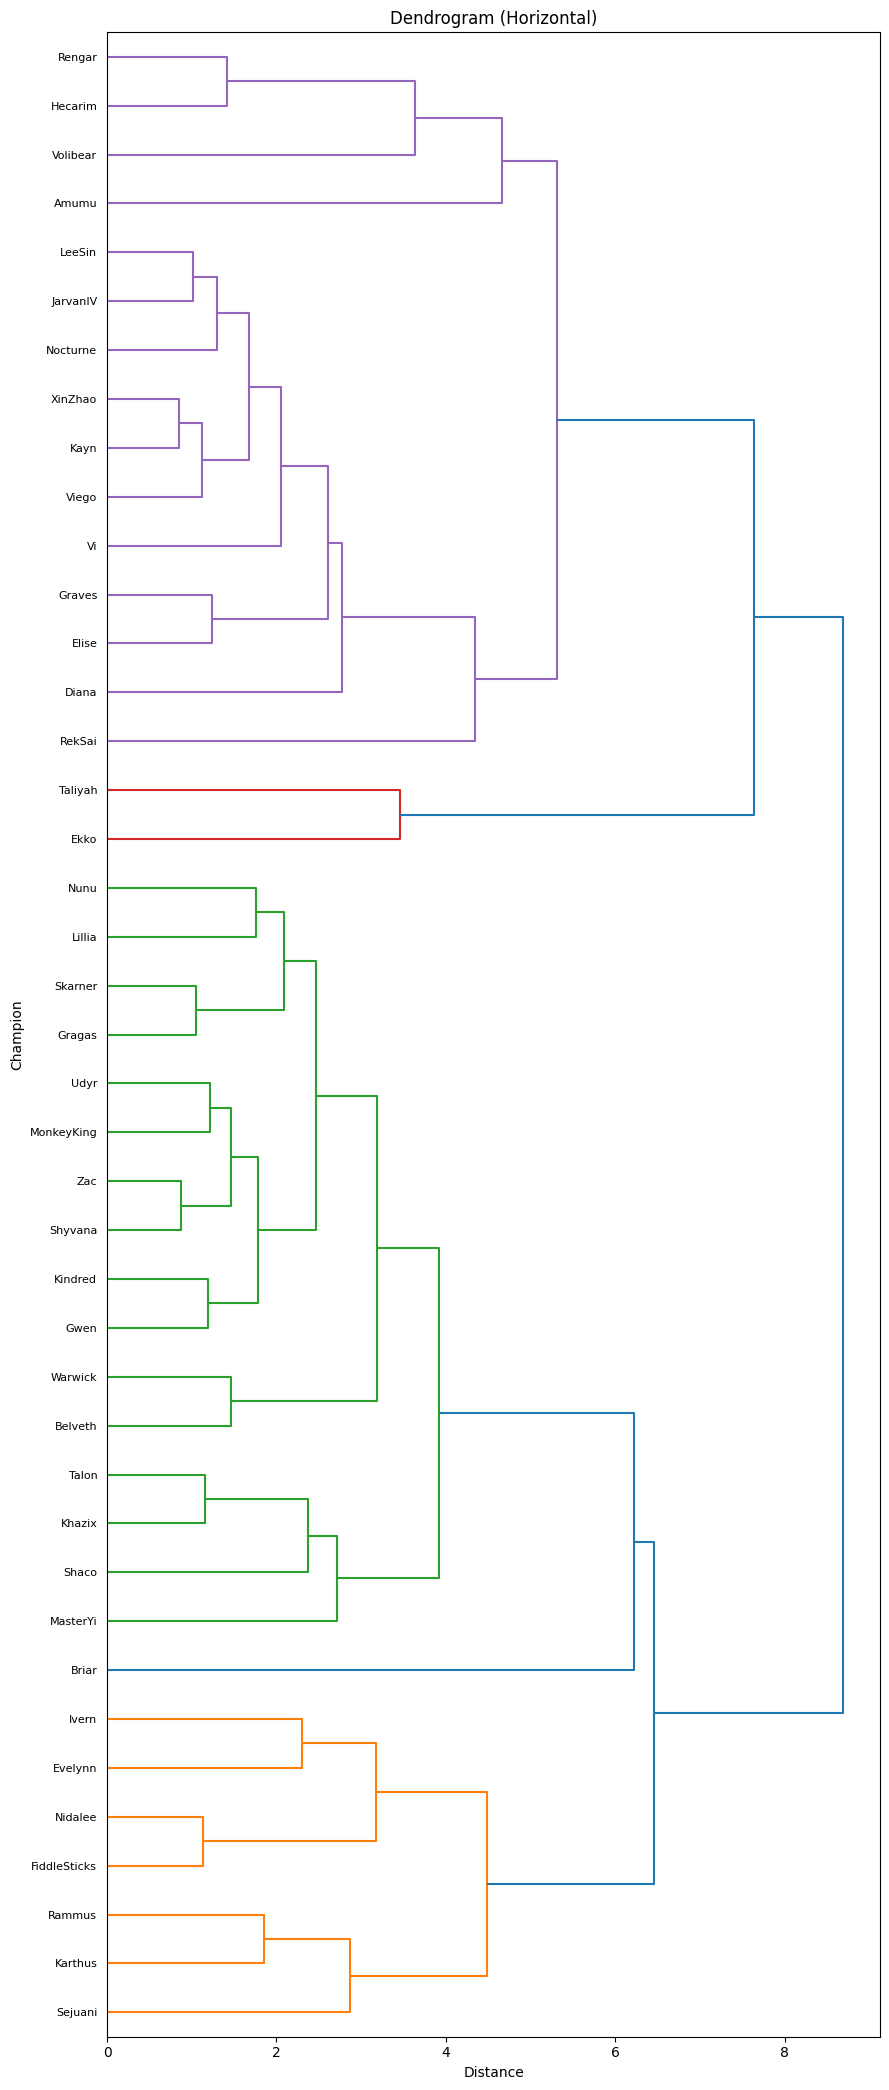

In [ ]:
#codigo da aula do eric

import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

scaled_data_numerical = scaled_data.select_dtypes(include=['number'])
# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data_numerical, method='complete', metric='euclidean')

# Plot the dendrogram horizontally
plt.figure(figsize=(9, 21))  # Adjust figure size as needed
dendrogram(linkage_matrix, orientation='right', labels=scaled_data['champion'].tolist())
plt.title('Dendrogram (Horizontal)')
plt.xlabel('Distance')
plt.ylabel('Champion')
plt.tight_layout()
plt.show()

In [ ]:
# 7 se pá é melhor


chosen_num_clusters = 7

# Realizar o clustering hierárquico com o número escolhido de clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, chosen_num_clusters, criterion='maxclust')

In [ ]:

# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data.to_csv('scaled_data_atualizado.csv', index=False)

scaled_data_numerical = scaled_data.select_dtypes(include=['number'])

# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[scaled_data_numerical.columns].agg(['mean', 'count'])
print(grouped_summary)


        allInPings       assistMePings       commandPings        \
              mean count          mean count         mean count   
Cluster                                                           
1         1.501514     7      6.208685     7    10.377313     7   
2         0.989605    16      5.320223    16     7.688604    16   
3         1.187500     1      9.007812     1     7.315104     1   
4         1.250243     2      6.379121     2    10.771174     2   
5         1.440376    11      6.280603    11     9.354457    11   
6         1.499264     3      6.574100     3     7.093654     3   
7         0.946988     1      9.255422     1     9.739759     1   

        enemyMissingPings       enemyVisionPings       holdPings        \
                     mean count             mean count      mean count   
Cluster                                                                  
1                6.123369     7         3.755225     7  0.000753     7   
2                6.410159    16  

In [ ]:
scaled_data.to_csv('Comportamento_Hierarquico.csv', index=False)

## Kmeans

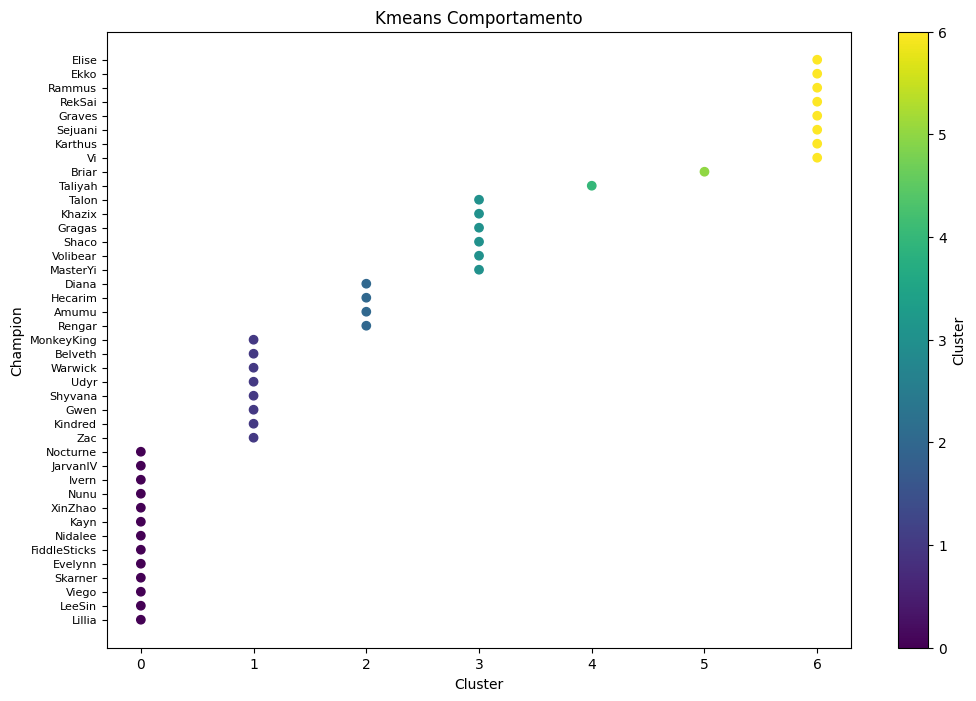

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

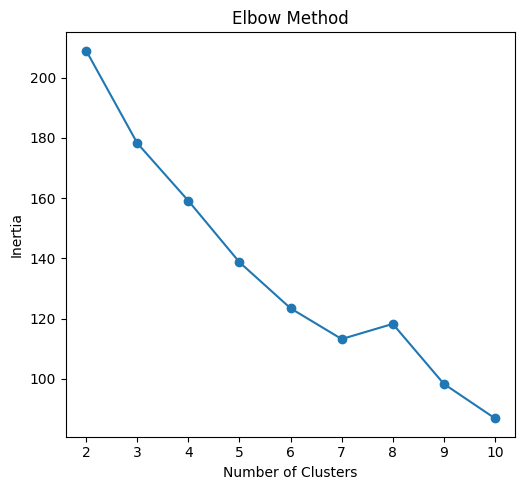

In [ ]:
# Plotar o gráfico Elbow para ajudar a escolher o número de clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()

In [ ]:
# Escolher o número de clusters com base na análise dos gráficos acima
chosen_num_clusters = 7

# Realizar a clusterização com o número escolhido de clusters
kmeans = KMeans(n_clusters=chosen_num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
quantitative_data = scaled_data.select_dtypes(include=['number'])
quantitative_data

allInPings  assistMePings  commandPings  enemyMissingPings  \
champion                                                                   
Amumu           0.946988       9.255422      9.739759           6.121687   
Belveth         0.843049       4.770179      6.567265           6.445067   
Briar           1.187500       9.007812      7.315104           5.958333   
Diana           1.368649       7.630270      8.486486           7.838919   
Ekko            0.861538       6.458242      9.530769          10.097802   
Elise           1.589454       6.900188     10.123352           7.798493   
Evelynn         0.704663       7.411054      9.677029           6.243523   
FiddleSticks    1.313413       4.738380     10.221780           5.529880   
Gragas          1.493590       4.551282      8.208333           6.583333   
Graves          1.676561       6.443716     10.630301           8.074788   
Gwen            0.806723       6.245098      7.256303           5.936975   
Hecarim         1.634921       7.011464      7.499118           7.628748   
Ivern           1.095484       7.215484     10.009032           4.878710   
JarvanIV        1.343259       6.468983      9.607113           6.700579   
Karthus         1.295146       6.812621     10.670874           6.794175   
Kayn            1.899826       5.999129      8.732578           7.194251   
Khazix          0.910550       5.318043      8.669725           6.740826   
Kindred         0.762874       6.310180      7.455090           6.747305   
LeeSin          1.110096       5.933173      9.770192           7.383173   
Lillia          0.643103       5.962931      8.641379           6.041379   
MasterYi        1.513292       5.309816      9.165644           6.874233   
MonkeyKing      0.887526       5.652352      7.574642           7.024540   
Nidalee         1.498302       5.685908     10.084890           5.738540   
Nocturne        0.902552       6.245940      8.868910           7.062645   
Nunu            1.397022       6.107940      8.074442           5.982630   
Rammus          2.500000       5.557292     10.255208           6.604167   
RekSai          1.910150       5.690516      9.708819           7.653910   
Rengar          1.351759       6.748744      6.512563           7.233668   
Sejuani         2.103591       6.040055     11.722376           7.074586   
Shaco           0.629447       4.180830      7.370553           6.188735   
Shyvana         0.885714       5.420408      7.477551           6.155102   
Skarner         1.052545       4.807882      8.276683           6.591133   
Taliyah         1.638947       6.300000     12.011579          11.549474   
Talon           0.968321       4.598733      7.958817           6.582893   
Udyr            0.855333       4.982049      6.739176           6.639916   
Vi              1.167508       5.459132      9.261352           7.178607   
Viego           1.444515       5.777742      8.925702           7.383929   
Volibear        1.511111       5.962092      7.269281           6.763399   
Warwick         1.621094       5.657552      6.354167           5.860677   
XinZhao         1.431562       6.537842      8.784219           6.919485   
Zac             0.563492       5.248299      7.227891           6.167800   

              enemyVisionPings  holdPings  getBackPings  \
champion                                                  
Amumu                 7.175904   0.020482      4.703614   
Belveth               4.717489   0.001121      2.882287   
Briar                 1.924479   0.002604      2.976562   
Diana                 4.305946   0.001081      5.701622   
Ekko                  6.380220   0.000000      5.642857   
Elise                 4.310734   0.000000      4.828625   
Evelynn               4.763385   0.000000      5.017271   
FiddleSticks          3.543161   0.003984      4.559097   
Gragas                4.392628   0.000000      4.347756   
Graves                4.522359   0.000386      5.791827   
Gwen                  4.236695   0.00

In [ ]:
# Adicionar a coluna de grupos ao DataFrame original
scaled_data['Cluster'] = clusters

# Salvar o DataFrame com a marcação dos grupos
scaled_data.to_excel('mapa_kmeans.xlsx', index=False)


# Análise descritiva: média e quantidade de registros por grupo
grouped_summary = scaled_data.groupby('Cluster')[quantitative_data.columns].agg(['mean', 'count'])
print(grouped_summary)


        allInPings       assistMePings       commandPings        \
              mean count          mean count         mean count   
Cluster                                                           
0         1.218180    13      6.068645    13     9.205688    13   
1         0.903226     8      5.535765     8     7.081511     8   
2         1.325579     4      7.661475     4     8.059482     4   
3         1.171052     6      4.986799     6     8.107059     6   
4         1.638947     1      6.300000     1    12.011579     1   
5         1.187500     1      9.007812     1     7.315104     1   
6         1.637993     8      6.170220     8    10.237881     8   

        enemyMissingPings       enemyVisionPings       holdPings        \
                     mean count             mean count      mean count   
Cluster                                                                  
0                6.434604    13         4.066943    13  0.000673    13   
1                6.372173     8  

In [ ]:
# Reset the index and make 'champion' a column
scaled_data = scaled_data.reset_index()


# Reorder columns
new_order = ['champion', 'Cluster'] + [col for col in scaled_data.columns if col not in ['champion', 'Cluster']]
scaled_data = scaled_data[new_order]

# Save the updated DataFrame
scaled_data.to_csv('Comportamento_Kmeans.csv', index=False)
scaled_data




champion  Cluster  allInPings  assistMePings  commandPings  \
0          Amumu        2    0.946988       9.255422      9.739759   
1        Belveth        1    0.843049       4.770179      6.567265   
2          Briar        5    1.187500       9.007812      7.315104   
3          Diana        2    1.368649       7.630270      8.486486   
4           Ekko        6    0.861538       6.458242      9.530769   
5          Elise        6    1.589454       6.900188     10.123352   
6        Evelynn        0    0.704663       7.411054      9.677029   
7   FiddleSticks        0    1.313413       4.738380     10.221780   
8         Gragas        3    1.493590       4.551282      8.208333   
9         Graves        6    1.676561       6.443716     10.630301   
10          Gwen        1    0.806723       6.245098      7.256303   
11       Hecarim        2    1.634921       7.011464      7.499118   
12         Ivern        0    1.095484       7.215484     10.009032   
13      JarvanIV        0    1.343259       6.468983      9.607113   
14       Karthus        6    1.295146       6.812621     10.670874   
15          Kayn        0    1.899826       5.999129      8.732578   
16        Khazix        3    0.910550       5.318043      8.669725   
17       Kindred        1    0.762874       6.310180      7.455090   
18        LeeSin        0    1.110096       5.933173      9.770192   
19        Lillia        0    0.643103       5.962931      8.641379   
20      MasterYi        3    1.513292       5.309816      9.165644   
21    MonkeyKing        1    0.887526       5.652352      7.574642   
22       Nidalee        0    1.498302       5.685908     10.084890   
23      Nocturne        0    0.902552       6.245940      8.868910   
24          Nunu        0    1.397022       6.107940      8.074442   
25        Rammus        6    2.500000       5.557292     10.255208   
26        RekSai        6    1.910150       5.690516      9.708819   
27        Rengar        2    1.351759       6.748744      6.512563   
28       Sejuani        6    2.103591       6.040055     11.722376   
29         Shaco        3    0.629447       4.180830      7.370553   
30       Shyvana        1    0.885714       5.420408      7.477551   
31       Skarner        0    1.052545       4.807882      8.276683   
32       Taliyah        4    1.638947       6.300000     12.011579   
33         Talon        3    0.968321       4.598733      7.958817   
34          Udyr        1    0.855333       4.982049      6.739176   
35            Vi        6    1.167508       5.459132      9.261352   
36         Viego        0    1.444515       5.777742      8.925702   
37      Volibear        3    1.511111       5.962092      7.269281   
38       Warwick        1    1.621094       5.657552      6.354167   
39       XinZhao        0    1.431562       6.537842      8.784219   
40           Zac        1    0.563492       5.248299      7.227891   

    enemyMissingPings  enemyVisionPings  holdPings  getBackPings  \
0            6.121687          7.175904   0.020482      4.703614   
1            6.445067          4.717489   0.001121      2.882287   
2            5.958333          1.924479   0.002604      2.976562   
3            7.838919          4.305946   0.001081      5.701622   
4           10.097802          6.380220   0.000000      5.642857   
5            7.798493          4.310734   0.000000      4.828625   
6            6.243523          4.763385   0.000000      5.017271   
7            5.529880          3.543161   0.003984      4.559097   
8            6.583333          4.392628   0.000000      4.347756   
9            8.074788          4.522359   0.000386      5.791827   
10           5.936975          4.236695   0.000000      3.708683   
11           7.628748          4.783069   0.000000      5.481481   
12           4.878710          4.430968   0.001290      3.574194   
13           6.700579          4.297767   0.000000      4.692308   
14           6.794175          3.906796   0.000

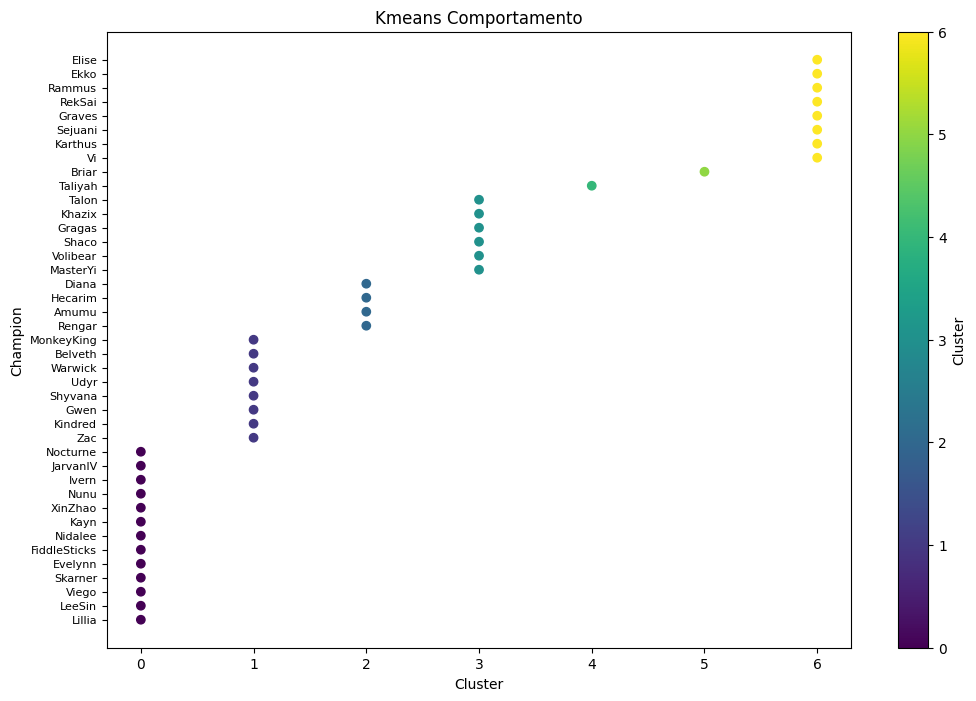

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

scaled_data = scaled_data.sort_values('Cluster')

# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(scaled_data['Cluster'], scaled_data['champion'], c=scaled_data['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Kmeans Comportamento')



# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


plt.show()

In [ ]:
#comentario

## Affinity

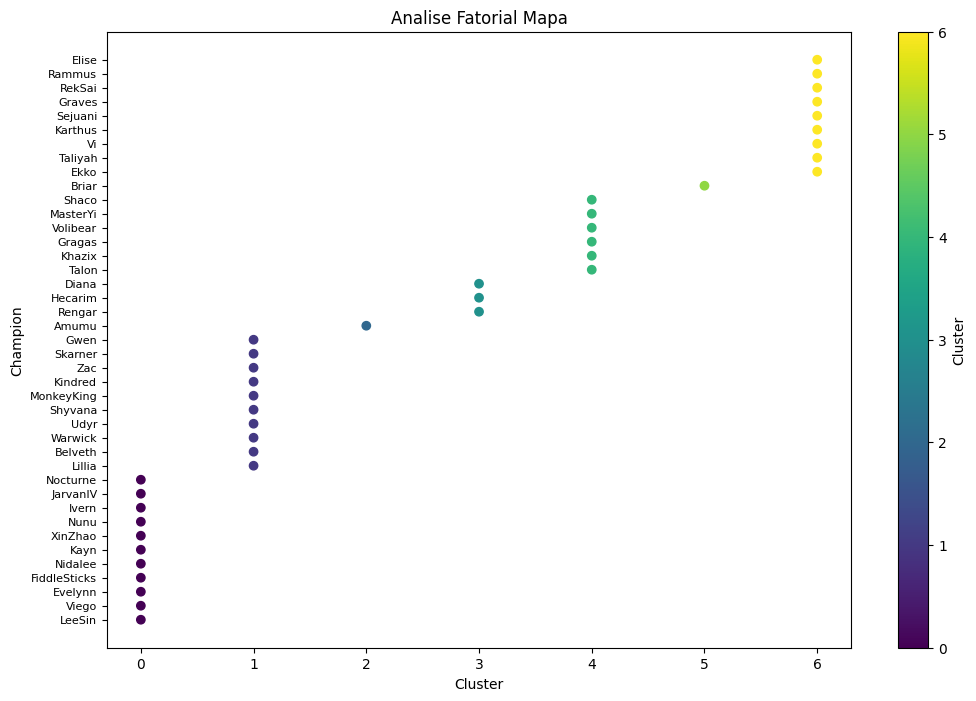

        allInPings       assistMePings       commandPings        \
              mean count          mean count         mean count   
Cluster                                                           
0         1.285518    11      6.192870    11     9.341444    11   
1         0.892145    10      5.505693    10     7.357015    10   
2         0.946988     1      9.255422     1     9.739759     1   
3         1.451776     3      7.130159     3     7.499389     3   
4         1.171052     6      4.986799     6     8.107059     6   
5         1.187500     1      9.007812     1     7.315104     1   
6         1.638099     9      6.184640     9    10.434959     9   

        enemyMissingPings       enemyVisionPings       holdPings        \
                     mean count             mean count      mean count   
Cluster                                                                  
0                6.456122    11         4.187186    11  0.000795    11   
1                6.360989    10  

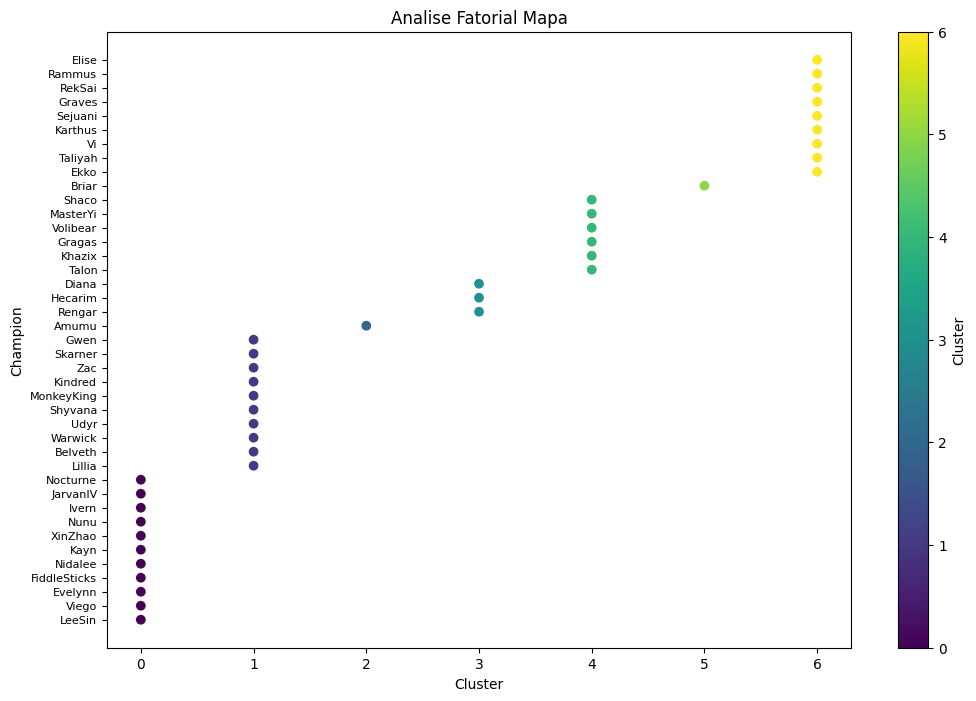

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import datasets


X = scaled_data
X = X.select_dtypes(include=['number'])

# Ajustar o modelo de Affinity Propagation com parâmetros
af = AffinityPropagation(damping=0.9, max_iter=200, convergence_iter=17, copy=True, preference=None, affinity='euclidean', verbose=False)
af.fit(X)  # Usando a base de dados original

# Adicionar rótulos de cluster aos dados
labels = af.labels_
X['Cluster'] = labels
# Calcular estatísticas descritivas para cada cluster
cluster_stats = X.groupby('Cluster').agg(['mean', 'count'])

# Imprimir as estatísticas descritivas
print(cluster_stats)


X = scaled_data
X['Cluster'] = labels
X = X.sort_values('Cluster')
X = X.reset_index()
X.to_csv('descarte.csv', index=False)
# Create the plot
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
plt.scatter(X['Cluster'], X['champion'], c=X['Cluster'], cmap='viridis')  # Use a colormap
plt.xlabel('Cluster')
plt.ylabel('Champion')
plt.title('Analise Fatorial Mapa')

# Improve label visibility
plt.yticks(fontsize=8)  # Adjust font size as needed


# Add a colorbar for better interpretation
plt.colorbar(label="Cluster")


#variancia

In [ ]:
#Dropa o Index e calcula variancia (precisa ser estudado se tem algum numero que funciona melhor com variancia doq com média)

df_combate = df_combate.drop(columns=['Unnamed: 0'], errors='ignore')

# Calculate variance for each champion
champion_variances = df_combate.groupby('champion').var()

champion_variances

highestCrowdControlScore  timeCCingOthers  totalTimeCCDealt  \
champion                                                                    
Amumu                         0.123450       175.180005       6565.143826   
Belveth                       0.010741        73.955907      16017.150048   
Briar                         0.048692       137.294736       7786.721685   
Diana                         0.000000        25.948799       6389.564667   
Ekko                          0.011352        88.276993      20753.408705   
Elise                         0.037648       109.808362       5290.250207   
Evelynn                       0.000000        38.605066       4096.382226   
FiddleSticks                  0.242361       298.780944      46374.066648   
Gragas                        0.075385       164.068137      14433.777909   
Graves                        0.002935        65.982194      17504.984980   
Gwen                          0.000000        21.271081       7665.077283   
Hecarim                       0.004121        75.267997       6790.059655   
Ivern                         0.237896       389.558517      13286.100918   
JarvanIV                      0.021973       127.526705      27820.272406   
Karthus                       0.003331        61.184012       7268.725269   
Kayn                          0.002239       133.808258       9973.518213   
Khazix                        0.000631        28.133840      17642.059254   
Kindred                       0.000917        29.368566       9694.487427   
LeeSin                        0.002938        76.748228      18299.641415   
Lillia                        0.013294       149.538806      41235.339586   
MasterYi                      0.000000        16.629175       8857.159894   
MonkeyKing                    0.003261        76.014033       5365.940653   
Nidalee                       0.000000        19.296710       3824.673325   
Nocturne                      0.009593      3890.308701      52226.397805   
Nunu                          0.083916       184.545859      16891.300672   
Rammus                        0.203574       311.218210      39584.588059   
RekSai                        0.051071       148.961942      19943.161287   
Rengar                        0.002037        54.115574       5734.535101   
Sejuani                       0.051870       164.539001      18337.936609   
Shaco                         0.036798       157.976477      36827.233856   
Shyvana                       0.000000        16.796087      12195.991292   
Skarner                       0.171300       276.617841      32951.455897   
Taliyah                       0.056260       128.814714      27688.351701   
Talon                         0.000000        12.383070       6691.894999   
Udyr                          0.078547       198.133196     212059.713022   
Vi                            0.019600       147.734520      10397.898114   
Viego                         0.001253        62.703332       6137.248532   
Volibear                      0.049755       157.921023     153282.005724   
Warwick                       0.040254       130.425016      18108.451864   
XinZhao                       0.010041        99.510381      19533.866430   
Zac                           0.181366       271.350428      25864.665735   

                assists     deaths      kills        kda  takedowns  \
champion                                                              
Amumu         29.345342   9.345041   8.342989  10.903585  47.061307   
Belveth       15.457662   8.961193  20.351541  24.430146  47.498026   
Briar         18.416475  11.488771  24.179931   9.617989  59.692539   
Diana         17.731720  11.506965  19.096756  17.051827  48.132905   
Ekko          16.728807   8.983534  22.773879  20.497801  54.635905   
Elise         17.142673   9.116472  20.039762  18.111742  50.834787   
Evelynn       15.471219   8.242245  21.790529  24.010839  52.768537   
FiddleSticks  26.324761   8.959508  10.824205  13.796284  48.71

# Conclusão

In [31]:


import pandas as pd

# Load the dataframe.
df = pd.read_csv('combate_hierarquico.csv')

# Group data by 'Cluster' and 'champion', then calculate the mean of other columns.

df2 = df.drop(columns=['champion'], errors='ignore')
cluster_champion_means = df2.groupby(['Cluster']).mean()

# Group data by 'Cluster' and 'champion', then calculate the mean of other columns.
#cluster_champion_means = df.groupby(['Cluster', 'champion']).mean()
#geral_means = df2.mean()


# Print the result.
cluster_champion_means

#cluster_champion_means.to_csv('cluster_champion_means_combate_hierarquico.csv', index=True)

highestCrowdControlScore  timeCCingOthers  totalTimeCCDealt  \
Cluster                                                                
1                        0.003950         0.068043          0.089737   
2                        0.170122         0.220604          0.138747   
3                        0.006840         0.052534          0.122799   
4                        0.031869         0.113064          0.191854   
5                        0.000000         0.007400          0.052732   
6                        0.122479         0.180853          0.263921   
7                        0.392488         0.266573          0.075792   

          assists    deaths     kills       kda  takedowns  doubleKills  \
Cluster                                                                   
1        0.241927  0.500471  0.579042  0.254198   0.341352     0.391554   
2        0.278475  0.585137  0.646878  0.251223   0.472247     0.301583   
3        0.201250  0.483094  0.790512  0.345914   0.533035     0.436672   
4        0.481096  0.734674  0.753253  0.261940   0.881973     0.480714   
5        0.000000  0.725427  1.000000  0.166275   0.497201     1.000000   
6        0.591420  0.435508  0.335126  0.383421   0.544649     0.152604   
7        1.000000  0.000000  0.000000  1.000000   0.721133     0.000000   

         damageSelfMitigated  ...  skillshotsDodged  skillshotsHit  soloKills  \
Cluster                       ...                                               
1                   0.380642  ...          0.384548       0.159308   0.413184   
2                   0.282246  ...          0.333247       0.068316   0.494849   
3                   0.168052  ...          0.217946       0.256611   0.600747   
4                   0.046558  ...          0.101817       0.462445   0.408163   
5                   0.276533  ...          0.425337       0.000000   0.931898   
6                   0.659743  ...          0.629141       0.139687   0.204378   
7                   0.024601  ...          0.000000       0.163975   0.000000   

         survivedSingleDigitHpCount  survivedThreeImmobilizesInFight  \
Cluster                                                                
1                          0.197068                         0.466755   
2                          0.440036                         0.334750   
3                          0.743006                         0.246623   
4                          0.117626                         0.008463   
5                          0.486997                         0.196110   
6                          0.340179                         0.765196   
7                          0.106288                         0.079168   

         teamBaronKills  teamElderDragonKills  teamRiftHeraldKills  \
Cluster                                                              
1              0.301385              0.349466             0.389220   
2              0.468174              0.271035             0.349320   
3              0.402852              0.276513             0.406102   
4              0.640624              0.157687             0.387005   
5              0.769091              0.192288             0.598660   
6              0.507651              0.323792             0.377860   
7              0.412162              0.227316             0.361898   

         teamDamagePercentage  tookLargeDamageSurvived  
Cluster                                                 
1                    0.488682                 0.107277  
2                    0.407717                 0.095540  
3                    0.536342                 0.012331  
4                    0.841543                 0.001562  
5                    0.665001                 0.067169  
6                    0.294541                 0.475121  
7                    0.000000                 0.000000  

[7 rows x 38 columns]

In [15]:
geral_means

Cluster                            3.243902
highestCrowdControlScore           0.084695
timeCCingOthers                    0.135301
totalTimeCCDealt                   0.154364
assists                            0.352402
deaths                             0.506591
kills                              0.582001
kda                                0.319309
takedowns                          0.499699
doubleKills                        0.329772
damageSelfMitigated                0.355715
killingSprees                      0.565771
largestKillingSpree                0.570421
largestMultiKill                   0.412727
damagePerMinute                    0.397522
totalDamageDealtToChampions        0.407952
totalDamageShieldedOnTeammates     0.026979
totalHeal                          0.232213
effectiveHealAndShielding          0.040387
totalHealsOnTeammates              0.068730
totalTimeSpentDead                 0.515741
damageTakenOnTeamPercentage        0.738735
totalDamageTaken                   0.709374
immobilizeAndKillWithAlly          0.489541
killAfterHiddenWithAlly            0.493260
killParticipation                  0.443059
multikills                         0.284677
multikillsAfterAggressiveFlash     0.274423
outnumberedKills                   0.406221
skillshotsDodged                   0.377008
skillshotsHit                      0.162330
soloKills                          0.421101
survivedSingleDigitHpCount         0.398740
survivedThreeImmobilizesInFight    0.425986
teamBaronKills                     0.442830
teamElderDragonKills               0.293672
teamRiftHeraldKills                0.384346
teamDamagePercentage               0.440477
tookLargeDamageSurvived            0.166855
dtype: float64

In [12]:


import pandas as pd

# Load the dataframe.
df = pd.read_csv('Combate_Afinity.csv')

df2 = df.drop(columns=['champion'], errors='ignore')
cluster_champion_means = df2.groupby(['Cluster']).mean()

# Print the result.
cluster_champion_means


cluster_champion_means.to_csv('cluster_champion_means_combate_affinity.csv', index=True)

In [32]:


import pandas as pd

# Load the dataframe.
df = pd.read_csv('Ritmo_Hierarquico certo.csv')


df2 = df.drop(columns=['champion'], errors='ignore')
cluster_champion_means = df2.groupby(['Cluster']).mean()
# Group data by 'Cluster' and 'champion', then calculate the mean of other columns.
#cluster_champion_means = df.groupby(['Cluster', 'champion']).mean()

# Print the result.
cluster_champion_means


#cluster_champion_means.to_csv('cluster_champion_means_ritmo_hierarquico.csv', index=True)

takedownsBeforeJungleMinionSpawn  maxCsAdvantageOnLaneOpponent  \
Cluster                                                                   
1                                0.003242                      0.091212   
2                                0.002683                      0.072188   
3                                0.003155                      0.069956   
4                                0.002931                      0.180464   
5                                0.003223                      0.184032   
6                                0.004348                      0.145364   
7                                0.004472                      0.125869   

         bountyLevel  champExperience  champLevel  firstBloodAssist  \
Cluster                                                               
1           0.126857         0.335404    0.725242          0.110233   
2           0.094964         0.320058    0.704503          0.109365   
3           0.085614         0.325877    0.713129          0.150752   
4           0.100955         0.365792    0.764538          0.071889   
5           0.147698         0.365741    0.762389          0.089364   
6           0.153751         0.336681    0.726485          0.083716   
7           0.149508         0.343290    0.733072          0.117549   

         firstBloodKill  longestTimeSpentLiving  earliestBaron  \
Cluster                                                          
1              0.145345                0.209819       0.653116   
2              0.079177                0.215051       0.674640   
3              0.079498                0.215791       0.626514   
4              0.066315                0.224309       0.656759   
5              0.103959                0.201279       0.659766   
6              0.188308                0.198734       0.630073   
7              0.126900                0.206233       0.665508   

         controlWardTimeCoverageInRiverOrEnemyHalf  ...  quickSoloKills  \
Cluster                                             ...                   
1                                         0.728405  ...        0.003801   
2                                         0.691522  ...        0.000244   
3                                         0.729866  ...        0.002532   
4                                         0.799584  ...        0.000502   
5                                         0.778426  ...        0.015635   
6                                         0.793516  ...        0.010798   
7                                         0.745475  ...        0.009412   

         scuttleCrabKills  teamElderDragonKills  teamRiftHeraldKills  \
Cluster                                                                
1                0.230440              0.005838             0.215389   
2                0.210378              0.006135             0.204939   
3                0.216243              0.004628             0.219087   
4                0.251255              0.005740             0.221864   
5                0.249458              0.004876             0.212798   
6                0.240632              0.003160             0.278629   
7                0.233299              0.004424             0.214793   

         visionScorePerMinute  voidMonsterKill  goldPerMinute  \
Cluster                                                         
1                    0.186704         0.347507       0.352094   
2                    0.219681         0.328697       0.309238   
3                    0.176150         0.346091       0.308079   
4                    0.183440         0.355922       0.365618   
5                    0.169662         0.359360       0.398454   
6                    0.166641         0.377180       0.421940   
7                    0.188050         0.341906       0.382382   

         enemy_ally_ratio  monster_minion_ratio  gpm_per_Alliedjg  
Cluster                                                            
1                0.044199              0.218993    

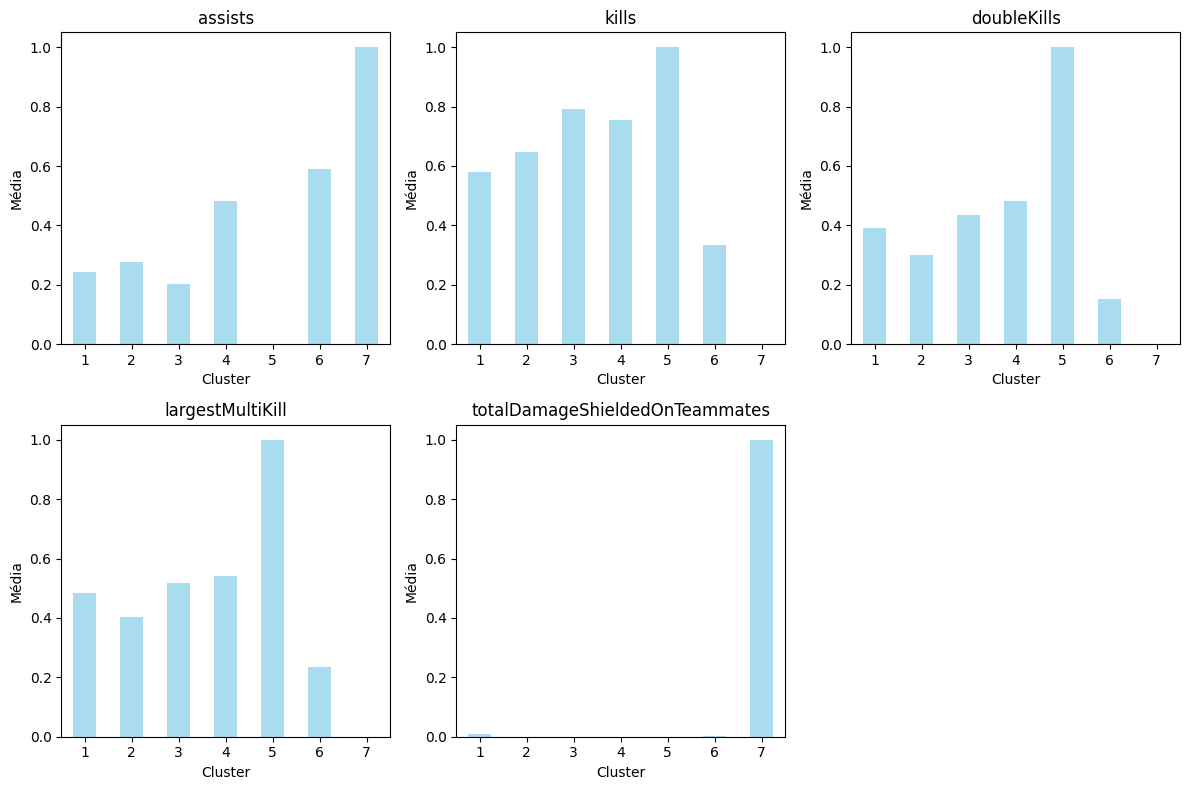

In [19]:
data = pd.read_csv('cluster_champion_means_combate_hierarquico.csv')

import numpy as np
import matplotlib.pyplot as plt

# Excluindo a coluna 'Cluster' para análise de variáveis
data_numerical = data.drop(columns=['Cluster'])

# Calculando as médias de cada variável por cluster
cluster_means = data.groupby('Cluster').mean()

# Calculando a variação máxima entre clusters para cada variável
variations = cluster_means.max() - cluster_means.min()

# Selecionando as 5 variáveis com maior discrepância entre clusters
top_variables = variations.nlargest(5).index

# Plotando gráficos das variáveis com maior discrepância
plt.figure(figsize=(12, 8))
for i, var in enumerate(top_variables, 1):
    plt.subplot(2, 3, i)
    cluster_means[var].plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(var)
    plt.xlabel('Cluster')
    plt.ylabel('Média')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



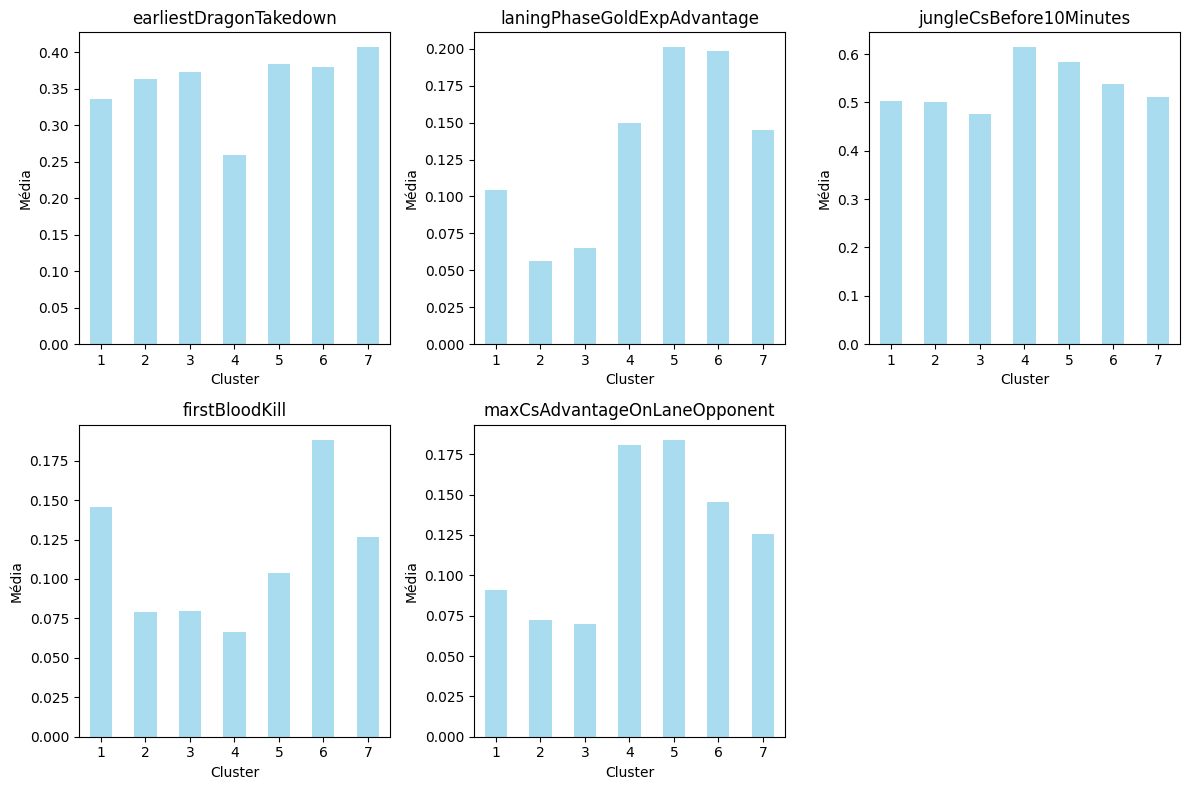

In [21]:
data = pd.read_csv('cluster_champion_means_ritmo_hierarquico.csv')

import numpy as np
import matplotlib.pyplot as plt

# Excluindo a coluna 'Cluster' para análise de variáveis
data_numerical = data.drop(columns=['Cluster'])

# Calculando as médias de cada variável por cluster
cluster_means = data.groupby('Cluster').mean()

# Calculando a variação máxima entre clusters para cada variável
variations = cluster_means.max() - cluster_means.min()

# Selecionando as 5 variáveis com maior discrepância entre clusters
top_variables = variations.nlargest(5).index

# Plotando gráficos das variáveis com maior discrepância
plt.figure(figsize=(12, 8))
for i, var in enumerate(top_variables, 1):
    plt.subplot(2, 3, i)
    cluster_means[var].plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(var)
    plt.xlabel('Cluster')
    plt.ylabel('Média')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [47]:
Cluster_combate = pd.read_csv('combate_hierarquico.csv')
Cluster_ritmo = pd.read_csv('/content/Ritmo_Hierarquico certo.csv')

In [49]:
import pandas as pd

ritmo_df = pd.read_csv('Ritmo_Hierarquico certo.csv')
combate_df = pd.read_csv('combate_hierarquico.csv')

merged_df = pd.merge(
    ritmo_df[['champion', 'Cluster']],
    combate_df[['champion', 'Cluster']],
    on='champion',
    suffixes=('_Ritmo', '_Combate')
)

print(merged_df)


        champion  Cluster_Ritmo  Cluster_Combate
0          Amumu              3                6
1        Belveth              6                2
2          Briar              1                2
3          Diana              5                1
4           Ekko              7                3
5          Elise              1                2
6        Evelynn              7                3
7   FiddleSticks              2                2
8         Gragas              3                2
9         Graves              7                3
10          Gwen              5                1
11       Hecarim              5                1
12         Ivern              3                7
13      JarvanIV              2                6
14       Karthus              5                4
15          Kayn              7                2
16        Khazix              1                3
17       Kindred              7                3
18        LeeSin              1                1
19        Lillia    

In [50]:
cluster_ritmo_map = {
    1: "first clear crucial",
    2: "Morrem em gank early",
    3: "Gank muito forte",
    4: "First Gank Ruim",
    5: "Power Farmers",
    6: "Kill=ff15",
    7: "Sua Jg é minha"
}

cluster_combate_map = {
    1: "Lutadores de TF",
    2: "Escaramuçadores",
    3: "Assassinos",
    4: "Magos",
    5: "Master Yi",
    6: "CC Multitarget",
    7: "Ivern"
}

merged_df['Cluster_Ritmo'] = merged_df['Cluster_Ritmo'].map(cluster_ritmo_map)
merged_df['Cluster_Combate'] = merged_df['Cluster_Combate'].map(cluster_combate_map)

print(merged_df)


        champion         Cluster_Ritmo  Cluster_Combate
0          Amumu      Gank muito forte   CC Multitarget
1        Belveth             Kill=ff15  Escaramuçadores
2          Briar   first clear crucial  Escaramuçadores
3          Diana         Power Farmers  Lutadores de TF
4           Ekko        Sua Jg é minha       Assassinos
5          Elise   first clear crucial  Escaramuçadores
6        Evelynn        Sua Jg é minha       Assassinos
7   FiddleSticks  Morrem em gank early  Escaramuçadores
8         Gragas      Gank muito forte  Escaramuçadores
9         Graves        Sua Jg é minha       Assassinos
10          Gwen         Power Farmers  Lutadores de TF
11       Hecarim         Power Farmers  Lutadores de TF
12         Ivern      Gank muito forte            Ivern
13      JarvanIV  Morrem em gank early   CC Multitarget
14       Karthus         Power Farmers            Magos
15          Kayn        Sua Jg é minha  Escaramuçadores
16        Khazix   first clear crucial       Ass